# Matteo Fanfarillo - Matricola: 0316179
## Progetto Texas Hold 'em Poker
#### Librerie utilizzate per il progetto
<ul>
    <li>Random</li>
    <li>Matplotlib</li>
    <li>Numpy</li>
</ul>

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

#### Informazioni preliminari su Texas Hold 'em Poker
Affinché il lettore possa comprendere appieno ciò che andremo a fare, è opportuno fornire alcune informazioni utili riguardo il regolamento del gioco. <br>
In ciascuna mano si hanno 5 carte sul tavolo (che sono comuni a tutti) e ogni partecipante possiede 2 carte in mano. Lo scopo del gioco è ottenere una combinazione di 5 carte (tra le 7 totali che si hanno a disposizione) che sia la migliore di tutte le combinazioni degli avversari. <br>
Di seguito viene riportato un elenco di tutte le combinazioni possibili ordinate da quella di valore maggiore a quella che vale meno:
<ul>
    <li><b>Scala Reale:</b> è costituita da 5 carte dello stesso seme in sequenza dall'asso al dieci.</li>
    <li><b>Scala di Colore:</b> è costituita da 5 carte dello stesso seme in squenza (eccetto la sequenza dall'asso al dieci). Nel caso si realizzino due o più Scale di Colore nella stessa mano, la vincente sarà quella con la carta di valore maggiore.</li>
    <li><b>Poker:</b> è costituito da 4 carte dello stesso valore. Nel caso si realizzino due o più Poker nella stessa mano, il vincente, nell'ordine, sarà decretato da:
        <ol>
            <li>Il valore del Poker</li>
            <li>Il valore della quinta carta</li>
        </ol>
    <li><b>Full:</b> è costituito da un Tris (3 carte dello stesso valore) e una Coppia (2 carte dello stesso valore). Nel caso si realizzino due o più Full nella stessa mano, il vincente, nell'ordine, sarà decretato da:
        <ol>
            <li>Il valore del Tris</li>
            <li>Il valore della Coppia</li>
        </ol>
    <li><b>Colore:</b> è costituito da 5 carte dello stesso seme ma non in sequenza. Nel caso si realizzino due o più Colori nella stessa mano, il vincente sarà quello con la carta che ha il valore maggiore. Se le carte più alte di due Colori sono uguali, vince il Colore che ha la seconda carta di valore maggiore e così via.</li>
    <li><b>Scala:</b> è costituita da 5 carte in sequenza ma non tutte dello stesso seme. Nel caso si realizzino due o più Scale nella stessa mano, la vincente sarà quella con la carta di valore maggiore.</li>
    <li><b>Tris:</b> è costituita da 3 carte dello stesso valore. Nel caso si realizzino due o più Tris nella stessa mano, il vincente, nell'ordine, sarà decretato da:
        <ol>
            <li>Il valore del Tris</li>
            <li>La carta "dispari" di valore più alto</li>
            <li>La carta "dispari" di valore più basso</li>
        </ol>
    <li><b>Doppia Coppia:</b> è costituita da due coppie di carte uguali. Nel caso si realizzino due o più Doppie Coppie nella stessa mano, la vincente, nell'ordine, sarà decretata da:
        <ol>
            <li>La coppia di valore più alto</li>
            <li>La coppia di valore più basso</li>
            <li>Il valore della quinta carta</li>
        </ol>
    <li><b>Coppia:</b> è costituita da 2 carte dello stesso valore. Nel caso si realizzino due o più Coppie nella stessa mano, la vincente, nell'ordine, sarà decretata da:
        <ol>
            <li>Il valore della Coppia</li>
            <li>La carta "dispari" di valore più alto</li>
            <li>La seconda carta "dispari" di valore più alto</li>
            <li>La carta "dispari" di valore più basso</li>
        </ol>
</ul>
<br>        
Ciascuna mano si svolge in più fasi (che ho riportato in maniera leggermente semplificata):
<ul>
    <li><b>Pre-flop:</b> le 5 carte sul tavolo sono tutte coperte, e il mazziere distribuisce 2 carte a ciascun giocatore; dopodiché si effettua un primo giro di puntate.</li>
    <li><b>Flop:</b> vengono scoperte 3 carte sul tavolo e si effettua un secondo giro di puntate.</li>
    <li><b>Turn:</b> viene scoperta la quarta carta sul tavolo e si effettua un terzo giro di puntate.</li>
    <li><b>River:</b> viene scoperta la quinta carta sul tavolo e si effettua l'ultimo giro di puntate.</li>
    <li><b>Showdown:</b> i giocatori scoprono le loro carte in modo da stabilire chi ha ottenuto la combinazione migliore; in particolare, il vincitore si aggiudica tutti i soldi (o le fiches) che sono stati puntati nel corso dell'intera mano. Nel caso ci siano due o più giocatori che abbiano combinazioni del tutto equivalenti, questi si divideranno la posta in gioco in parti uguali.</li>
</ul>
<br>

#### Esperimenti effettuati
Negli esperimenti che andremo a fare, supponiamo di disporre di un mazzo da 52 carte e assumiamo di avere sempre 4 giocatori che partecipano alla partita di Texas Hold 'em Poker: Luca, Elisa, Sara e Andrea. Noi ci metteremo nei panni di Luca, che sarà dunque il nostro protagonista delle simulazioni. <br>
Gli esperimenti riguarderanno la fase di Flop di ciascuna mano, con lo scopo di avere un'idea su quanto convenga a Luca puntare tanti soldi (ovvero su quanto valga la probabilità che Luca ottenga una certa combinazione o comunque vinca la mano) in base a quali sono le carte che lui ha in mano e quali sono le carte scoperte sul tavolo. <br>
Alla fine di tutti gli esperimenti proposti, sarà data la possibilità al lettore di selezionare le tre carte scoperte sul tavolo e le due carte che Luca ha in mano, con lo scopo di stimare la probabilità che Luca vinca la mano partendo da una situazione iniziale arbitraria. <br>
Chiaramente la probabilità la si può stimare col rapporto tra il numero di successi e il numero di simulazioni totali effettuate. Per ciascuna probabilità che andremo a stimare, noi andremo a fare 10.000 simulazioni, il che corrisponde a far giocare 10.000 manche di gioco ai quattro partecipanti. <br>

#### Dati utilizzati per la risoluzione del progetto
Definiamo il nostro mazzo di carte:

In [2]:
VALUES = ['A', 'K', 'Q', 'J', 'T', '9', '8', '7', '6', '5', '4', '3', '2']
SEEDS = ['C', 'Q', 'F', 'P']
pack = [v+s for v in VALUES for s in SEEDS]

Definiamo il numero di simulazioni che verranno effettuate per ogni caso che andremo ad analizzare:

In [3]:
SIMUL = 10000
SIMULS = [i for i in range(0, SIMUL)]

#### Funzioni utilizzate per la risoluzione del progetto
Definiamo la funzione calculate_score che accetta in input una lista di carte e restituisce una lista indicante quante carte dello stesso seme ci sono e una lista indicante quante carte dello stesso valore ci sono:

In [4]:
def calculate_score(hand):
    values = [x[0] for x in hand]
    values.sort()
    seeds = [x[1] for x in hand]
    seeds.sort()
    
    retv = [1]
    rets = [1]
    for i in range(len(values)-1):
        if values[i] == values[i+1]:
            retv[-1] += 1
        else:
            retv.append(1)
        if seeds[i] == seeds[i+1]:
            rets[-1] += 1
        else:
            rets.append(1)
        
    retv.sort(reverse=True)
    rets.sort(reverse=True)
    return retv, rets

Definiamo la funzione list_values che accetta in input una lista di carte e restituisce la lista dei loro valori espressi in numeri interi:

In [5]:
def list_values(hand):
    values = [x[0] for x in hand]
    values_int = []
    for x in values:
        if x=='2' or x=='3' or x=='4' or x=='5' or x=='6' or x=='7' or x=='8' or x=='9':
            values_int.append(int(x))
        elif x=='T':
            values_int.append(10)
        elif x=='J':
            values_int.append(11)
        elif x=='Q':
            values_int.append(12)
        elif x=='K':
            values_int.append(13)
        else:
            values_int.append(14)
            
    return values_int

Definiamo la funzione same_seed che accetta in input una lista di carte e restituisce una lista dei valori delle carte dello stesso seme se queste ultime sono almeno 5, una lista vuota altrimenti. Si tratta di una funzione ausiliaria che può essere sfruttata per verificare l'esistenza di una Scala Reale o una Scala di Colore all'interno della lista di carte:

In [6]:
def same_seed(hand):
    seeds = [x[1] for x in hand]
    seeds.sort()
    valid_values = []
    
    for i in range(len(seeds)-4):
        if seeds[i] == seeds[i+1] and seeds[i] == seeds[i+2] and seeds[i] == seeds[i+3] and seeds[i] == seeds[i+4]:
            for x in hand:
                if x[1] == seeds[i]:
                    valid_values.append(x[0])
                    
    return valid_values

Definiamo la funzione check_straight che accetta in input una lista di carte e restituisce True se almeno 5 di loro compongono una Scala, False altrimenti:

In [7]:
def check_straight(hand):
    values_int = list_values(hand)
    values_int.sort()
    
    for i in range(len(values_int)-4):
        if values_int[i]+1 in values_int and values_int[i]+2 in values_int and values_int[i]+3 in values_int and values_int[i]+4 in values_int:
            return True
        
    return False

Definiamo la funzione check_royal_flush che accetta in input una lista di carte e restituisce True se 5 di loro compongono una Scala Reale, False altrimenti:

In [8]:
def check_royal_flush(hand):
    valid_values = same_seed(hand)
    if 'A' in valid_values and 'K' in valid_values and 'Q' in valid_values and 'J' in valid_values and 'T' in valid_values:
        return True
    return False

Definiamo la funzione check_straight_flush che accetta in input una lista di carte e restituisce True se 5 di loro compongono una Scala di Colore, False altrimenti:

In [9]:
def check_straight_flush(hand):
    #Per prima cosa mi assicuro che le carte NON compongano una Scala Reale (che ha valore maggiore di una Scala di Colore).
    if check_royal_flush(hand) == True:
        return False
    
    #Dopodiche' controllo se ci sono almeno 5 carte dello stesso seme in hand.
    valid_values = same_seed(hand)
    
    #Se quest'ultimo check va a buon fine, controllo se le carte dello stesso seme compongono una Scala.
    return check_straight(valid_values)

Definiamo la funzione check_score che accetta in input una lista di carte e restituisce un intero che indica quale combinazione è presente nella lista di carte. In particolare:
<ul>
    <li>0 = Nessuna combinazione</li>
    <li>1 = Coppia</li>
    <li>2 = Doppia Coppia</li>
    <li>3 = Tris</li>
    <li>4 = Scala</li>
    <li>5 = Colore</li>
    <li>6 = Full</li>
    <li>7 = Poker</li>
    <li>8 = Scala di Colore</li>
    <li>9 = Scala Reale</li>
</ul>

In [10]:
def check_score(hand):
    if check_royal_flush(hand) == True:
        return 9
    elif check_straight_flush(hand) == True:
        return 8
    
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        return 7
    elif retv[0] == 3 and retv[1] >= 2:
        return 6
    elif rets[0] >= 5:
        return 5
    elif check_straight(hand) == True:
        return 4
    elif retv[0] == 3 and retv[1] == 1:
        return 3
    elif retv[0] == 2 and retv[1] == 2:
        return 2
    elif retv[0] == 2 and retv[1] == 1:
        return 1
    else:
        return 0

Definiamo la funzione ausiliaria is_first_higher che accetta in input una lista di interi e restituisce 1 se il primo intero è strettamente maggiore di tutti gli altri, -1 se il primo intero è strettamente minore di almeno un altro intero, 0 altrimenti.

In [11]:
def is_first_higher(list_int):
    for i in range(1, len(list_int)):
        if list_int[0] < list_int[i]:
            return -1
    
    for i in range(1, len(list_int)):
        if list_int[0] <= list_int[i]:
            break
        elif i == len(list_int)-1:
            return 1
        
    return 0

Definiamo la funzione ausiliaria less_than_first che accetta in input una lista di interi e restituisce una lista di indici relativi alle posizioni dei numeri interi che hanno un valore strettamente minore del primo intero.

In [12]:
def less_than_first(list_int):
    indexes = []
    for i in range(1, len(list_int)):
        if list_int[0] > list_int[i]:
            indexes.append(i)
    
    indexes.sort(reverse=True)
    return indexes

Definiamo la funzione better_straight che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde alla scala di valore più alto, False altrimenti:

In [13]:
def better_straight(lValues_int):
    best_values = []
    
    #In questo doppio ciclo for ho inserito nella lista best_values il valore della carta più alta della Scala di ciascun giocatore coinvolto nel confronto tra Scale (il primo giocatore e' sempre Luca).
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-4):
            if lValues_int[i][j]-1 in lValues_int[i] and lValues_int[i][j]-2 in lValues_int[i] and lValues_int[i][j]-3 in lValues_int[i] and lValues_int[i][j]-4 in lValues_int[i]:
                best_values.append(lValues_int[i][j])
                break
    
    #Se il valore della carta più alta della Scala di Luca e' strettamente minore del valore della carta più alta della Scala di un avversario, allora viene restituito False.
    #Questo vuol dire che, anche in caso di parimerito, viene restituito True.
    for i in range(1, len(best_values)):
        if best_values[0] < best_values[i]:
            return False
        
    return True

Definiamo la funzione better_poker che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde al Poker di valore più alto, False altrimenti:

In [14]:
def better_poker(lValues_int):
    best_values_poker = []
    
    #In questo doppio ciclo for ho inserito nella lista best_values_poker il valore delle carte che compongono il Poker per ciascun giocatore coinvolto nel confronto tra Poker (il primo giocatore e' sempre Luca).
    #Inoltre, ho eliminato tutti i valori delle carte che compongono i Poker da ciascuna mano lValues_int[i] in modo da poter poi effettuare agevolmente un confronto tra le carte rimanenti nel caso ci siano più Poker con lo stesso valore.
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-3):
            if lValues_int[i][j] == lValues_int[i][j+1] and lValues_int[i][j] == lValues_int[i][j+2] and lValues_int[i][j] == lValues_int[i][j+3]:
                value_poker = lValues_int[i][j]
                best_values_poker.append(value_poker)
                for k in range(4):
                    lValues_int[i].remove(value_poker)
                break
    
    #Se il valore delle carte che compongono il Poker di Luca e' strettamente minore del valore delle carte che compongono il Poker di un avversario, allora viene restituito False.
    #Se il valore delle carte che compongono il Poker di Luca e' strettamente maggiore del valore delle carte che compongono i Poker di tutti gli avversari, allora viene restituito True.
    #Altrimenti, si procede a confrontare la quinta carta di Luca con la quinta carta degli avversari coinvolti nel parimerito.
    result = is_first_higher(best_values_poker)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #Nel caso in cui il Poker di Luca abbia il valore più alto a parimerito col Poker di qualche avversario, e' necessario eliminare dal confronto le eventuali liste di interi relative agli altri giocatori (che hanno il Poker di valore più basso).
    indexes_to_delete = less_than_first(best_values_poker)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Dopodiché si passa a confrontare la quinta carta.
    best_values_kicker = []
    for i in range(len(lValues_int)):
        best_values_kicker.append(lValues_int[i][0])
        
    for i in range(1, len(best_values_kicker)):
        if best_values_kicker[0] < best_values_kicker[i]:
            return False
        
    return True

Definiamo la funzione better_full che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde al Full di valore più alto, False altrimenti:

In [15]:
def better_full(lValues_int):
    #Viene dapprima effettuato un confronto tra i Tris di ciascun giocatore.
    best_values_tris = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-1):
            if lValues_int[i][j] == lValues_int[i][j+1] and lValues_int[i][j] == lValues_int[i][j+2]:
                value_tris = lValues_int[i][j]
                best_values_tris.append(value_tris)
                for k in range(2):
                    lValues_int[i].remove(value_tris)
                break
                
    result = is_first_higher(best_values_tris)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #Nel caso in cui il Tris di Luca abbia il valore più alto a parimerito col Tris di qualche avversario, e' necessario eliminare dal confronto le eventuali liste di interi relative agli altri giocatori (che hanno il Tris di valore più basso).
    indexes_to_delete = less_than_first(best_values_tris)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Dopodiche' si passa a confrontare le Coppie.
    best_values_pair = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-1):
            if lValues_int[i][j] == lValues_int[i][j+1]:
                best_values_pair.append(lValues_int[i][j])
                break
        
    result = is_first_higher(best_values_pair)
    if result == -1:
        return False
    return True

Definiamo la funzione better_tris che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde al Tris di valore più alto, False altrimenti:

In [16]:
def better_tris(lValues_int):
    #Viene dapprima effettuato un confronto tra i Tris di ciascun giocatore.
    best_values_tris = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-2):
            if lValues_int[i][j] == lValues_int[i][j+1] and lValues_int[i][j] == lValues_int[i][j+2]:
                value_tris = lValues_int[i][j]
                best_values_tris.append(value_tris)
                for k in range(3):
                    lValues_int[i].remove(value_tris)
                break
        
    result = is_first_higher(best_values_tris)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #Nel caso in cui il Tris di Luca abbia il valore più alto a parimerito col Tris di qualche avversario, e' necessario eliminare dal confronto le eventuali liste di interi relative agli altri giocatori (che hanno il Tris di valore più basso).
    indexes_to_delete = less_than_first(best_values_tris)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Dopodiche' si passa a confrontare le restanti carte.
    best_values_kicker = []
    for k in range(2):
        best_values_kicker.clear()
        
        for i in range(len(lValues_int)):
            best_values_kicker.append(lValues_int[i][k])
        
        result = is_first_higher(best_values_kicker)
        if result == -1:
            return False
        elif result == 1:
            return True
        
        indexes_to_delete = less_than_first(best_values_kicker)
        for i in range(len(indexes_to_delete)):
            index = indexes_to_delete[i]
            lValues_int.remove(lValues_int[index])
        
    return True

Definiamo la funzione better_double_pair che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde alla Doppia Coppia di valore più alto, False altrimenti:

In [17]:
def better_double_pair(lValues_int):
    #Viene dapprima effettuato un confronto tra le migliori Coppie di ciascun giocatore.
    best_values_pair = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-1):
            if lValues_int[i][j] == lValues_int[i][j+1]:
                value_pair = lValues_int[i][j]
                best_values_pair.append(value_pair)
                for k in range(2):
                    lValues_int[i].remove(value_pair)
                break
                
    result = is_first_higher(best_values_pair)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #Nel caso in cui la migliore Coppia di Luca abbia il valore più alto a parimerito con la migliore Coppia di qualche avversario, e' necessario eliminare dal confronto le eventuali liste di interi relative agli altri giocatori (che hanno la migliore Coppia di valore più basso).
    indexes_to_delete = less_than_first(best_values_pair)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Dopodiche' si passa a confrontare le peggiori Coppie.
    best_values_pair2 = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-1):
            if lValues_int[i][j] == lValues_int[i][j+1]:
                value_pair = lValues_int[i][j]
                best_values_pair2.append(value_pair)
                for k in range(2):
                    lValues_int[i].remove(value_pair)
                break
        
    result = is_first_higher(best_values_pair2)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    indexes_to_delete = less_than_first(best_values_pair2)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Se anche le peggiori Coppie sono soggette a un parimerito, si passa a controllare la quinta carta.
    best_values_kicker = []
    for i in range(len(lValues_int)):
        best_values_kicker.append(lValues_int[i][0])
        
    for i in range(1, len(best_values_kicker)):
        if best_values_kicker[0] < best_values_kicker[i]:
            return False
        
    return True    

Definiamo la funzione better_pair che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde alla Coppia di valore più alto, False altrimenti:

In [18]:
def better_pair(lValues_int):
    #Viene dapprima effettuato un confronto tra le Coppie di ciascun giocatore.
    best_values_pair = []
    for i in range(len(lValues_int)):
        for j in range(len(lValues_int[i])-1):
            if lValues_int[i][j] == lValues_int[i][j+1]:
                value_pair = lValues_int[i][j]
                best_values_pair.append(value_pair)
                for k in range(2):
                    lValues_int[i].remove(value_pair)
                break
                
    result = is_first_higher(best_values_pair)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #Nel caso in cui la Coppia di Luca abbia il valore più alto a parimerito con la Coppia di qualche avversario, e' necessario eliminare dal confronto le eventuali liste di interi relative agli altri giocatori (che hanno la Coppia di valore più basso).
    indexes_to_delete = less_than_first(best_values_pair)
    for i in range(len(indexes_to_delete)):
        index = indexes_to_delete[i]
        lValues_int.remove(lValues_int[index])
    
    #Dopodiche' si passa a confrontare le restanti carte.
    best_values_kicker = []
    for k in range(3):
        best_values_kicker.clear()
        
        for i in range(len(lValues_int)):
            best_values_kicker.append(lValues_int[i][k])
        
        result = is_first_higher(best_values_kicker)
        if result == -1:
            return False
        elif result == 1:
            return True
        
        indexes_to_delete = less_than_first(best_values_kicker)
        for i in range(len(indexes_to_delete)):
            index = indexes_to_delete[i]
            lValues_int.remove(lValues_int[index])
        
    return True

Definiamo la funzione better_combo che accetta in input un insieme di liste di valori e restituisce True se la prima lista (quella relativa a Luca) corrisponde al Colore di valore più alto, False altrimenti:

In [19]:
def better_combo(lValues_int):
    best_values = []
    for k in range(5):
        best_values.clear()
        
        for i in range(len(lValues_int)):
            best_values.append(lValues_int[i][k])
        
        result = is_first_higher(best_values)
        if result == -1:
            return False
        elif result == 1:
            return True
        
        indexes_to_delete = less_than_first(best_values)
        for i in range(len(indexes_to_delete)):
            index = indexes_to_delete[i]
            lValues_int.remove(lValues_int[index])
        
    return True

Definiamo la funzione victory che accetta in input un insieme di liste di carte (che nel nostro caso corrispondono rispettivamente alla mano di Luca, alla mano di Elisa, alla mano di Sara e alla mano di Andrea) e restituisce True se la prima di queste liste (ovvero la mano di Luca) corrisponde alla combinazione di carte migliore, False altrimenti:

In [20]:
def victory(h):
    #scores = lista indicante quale combinazione ha ottenuto ciascun giocatore.
    scores = []
    for x in h:
        scores.append(check_score(x))
    
    #Se la combinazione di Luca e' la migliore di tutte, viene restituito True.
    #Se esiste qualche combinazione migliore di quella di Luca, viene restituito False.
    #In caso di parimerito, si andra' a vedere i valori delle carte dei giocatori.
    result = is_first_higher(scores)
    if result == -1:
        return False
    elif result == 1:
        return True
    
    #max_score = lista contenente le mani che, a parimerito, hanno ottenuto la combinazione migliore.
    max_score = [h[0]]   #Chiaramente, se siamo arrivati qui, la mano di Luca deve appartenere alla lista.
    for i in range(1, len(scores)):
        if scores[0] == scores[i]:
            max_score.append(h[i])
    
    #lValues_int = lista contenente delle liste di interi.
    #Ciascuna di queste liste di interi contiene i valori (in ordine decrescente) delle carte che compone una specifica mano in max_score.
    lValues_int = []
    for i in range(len(max_score)):
        values_int = list_values(max_score[i])
        values_int.sort(reverse=True)
        lValues_int.append(values_int)
        
    if scores[0] == 9:
        return True
    elif scores[0] == 8 or scores[0] == 4:
        return better_straight(lValues_int)
    elif scores[0] == 7:
        return better_poker(lValues_int)
    elif scores[0] == 6:
        return better_full(lValues_int)
    elif scores[0] == 5 or scores[0] == 0:
        return better_combo(lValues_int)
    elif scores[0] == 3:
        return better_tris(lValues_int)
    elif scores[0] == 2:
        return better_double_pair(lValues_int)
    else:
        return better_pair(lValues_int)

Definiamo la funzione verify_input che verifica se le carte inserite dall'utente sono valide:

In [21]:
def verify_input(cards):
    #L'input dell'utente non e' valido quando sono presenti delle stringhe che non si riconducono alle carte del mazzo.
    for x in cards:
        if x not in pack:
            return False
    
    #L'input dell'utente non e' valido anche quando delle carte si ripetono.
    for i in range(len(cards)):
        for j in range(i+1, len(cards)):
            if cards[i] == cards[j]:
                return False
            
    return True

Le ultime due funzioni che andremo a definire non sono convenzionali: consistono semplicemente nello stampare a schermo un grafico, e hanno come unico vantaggio quello di evitare un'eccessiva ridondanza del codice.

Definiamo la funzione fun_graph che mostra l'andamento del rapporto tra il numero di successi e il numero di simulazioni di ciascun esperimento:

In [22]:
def fun_graph(results, title):
    dfig = plt.figure(figsize=(16,9))
    plt.plot(SIMULS, results)
    plt.title(title)

    plt.xlabel("Numero di simulazioni")
    ticks_position = [SIMULS[k] for k in range(0, len(SIMULS), 500)]
    ticks_label = [t for t in ticks_position]
    plt.xticks(ticks_position, ticks_label, rotation = 45)

    plt.ylabel("Percentuale successi")
    plt.show()

Definiamo la funzione bars_graph che mostra la probabilità di ottenere una particolare combinazione di carte in alcuni casi differenti:

In [23]:
def bars_graph(cases, prob, title):
    dfig = plt.figure(figsize=(16,9))
    x_pos = np.arange(len(cases))
    plt.title(title)

    plt.bar(x_pos, prob, align='center')
    plt.xticks(x_pos, cases)
    plt.ylabel("Percentuale successi")
    plt.show()

#### Esperimento 1
Concentriamoci sulla fase di Flop (in cui conosciamo 3 carte sul tavolo e le 2 carte che Luca ha in mano) e, tramite delle simulazioni, stimiamo la probabilità che Luca ottenga una Coppia al variare della situazione iniziale (ovvero al variare delle carte note).

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori differenti tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca (ai fini dell'esperimento non è necessario distinguere le carte che Luca ha in mano dalle carte scoperte sul tavolo):

In [24]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

Per ogni simulazione, estraiamo 2 carte a caso dalle 47 rimanenti nel mazzo (che giocheranno il ruolo delle 2 carte coperte sul tavolo): se con le sue 7 carte Luca ottiene <b>esattamente</b> una Coppia, allora incrementiamo di 1 il contatore dei successi (stiamo dunque escludendo i casi in cui Luca ottiene una combinazione migliore della Coppia). <br>
Alla fine di tutto, reinseriamo nel mazzo le 5 carte che abbiamo rimosso, in modo tale che il mazzo sarà pronto per le simulazioni successive.

In [25]:
succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 48.88 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

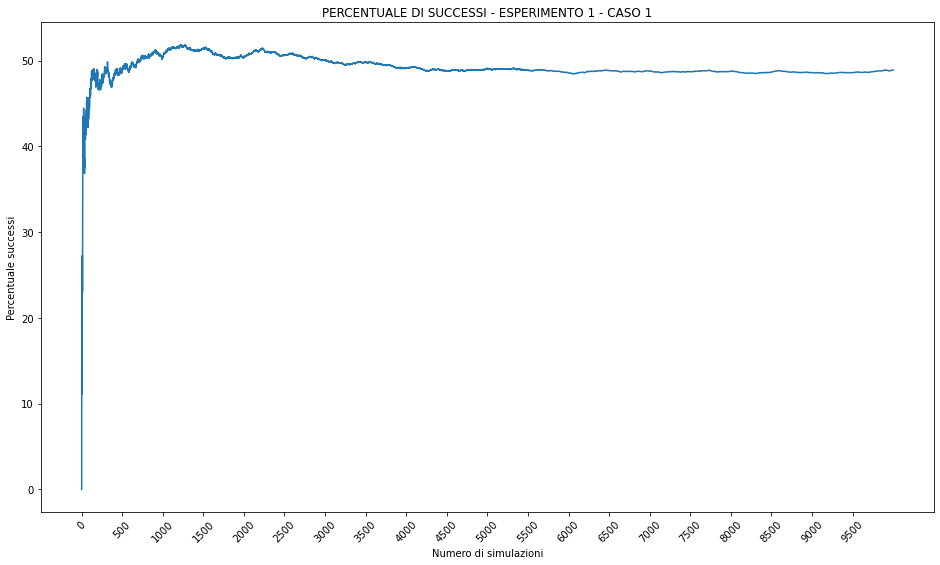

In [26]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 1 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente una Coppia, Luca deve solo evitare le combinazioni di carte migliori (come la Doppia Coppia, il Tris, il Full e il Poker). <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [27]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 52.11 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

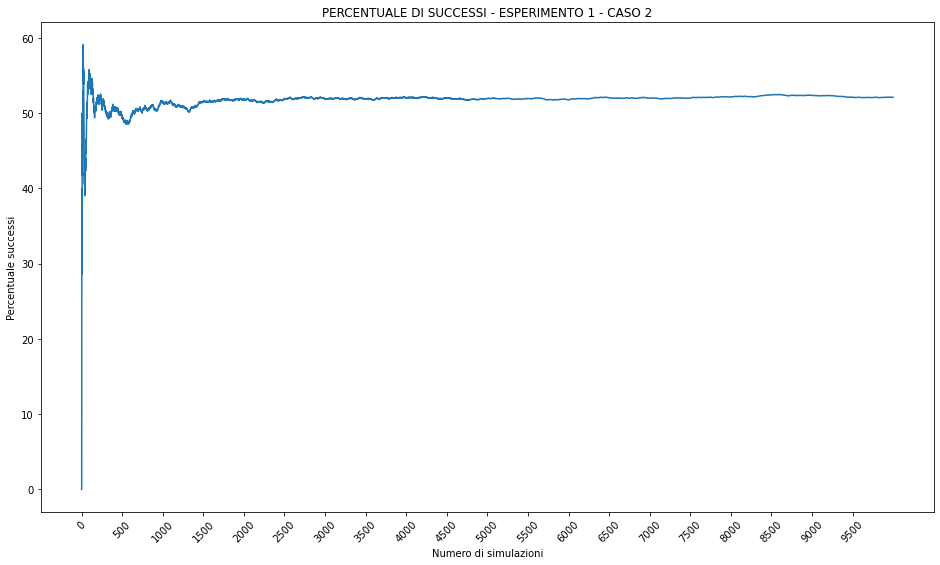

In [28]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 1 - CASO 2")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Coppia. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Coppia nei casi che abbiamo analizzato:

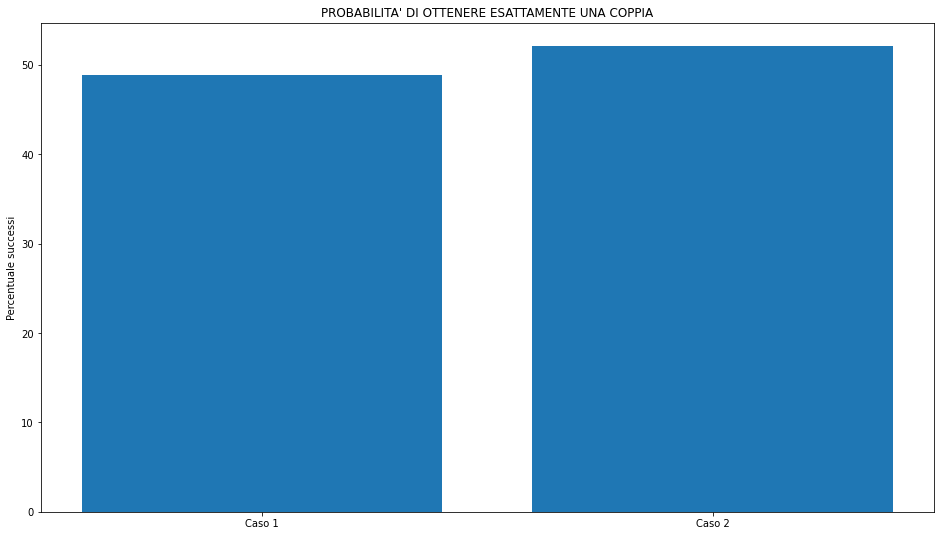

In [29]:
cases = ["Caso 1", "Caso 2"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA COPPIA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note hanno tutte valori differenti tra loro.</li>
    <li><b>Caso 2</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro.</li>
</ul>

#### Esperimento 2
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Doppia Coppia al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori differenti tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [30]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 8.37 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

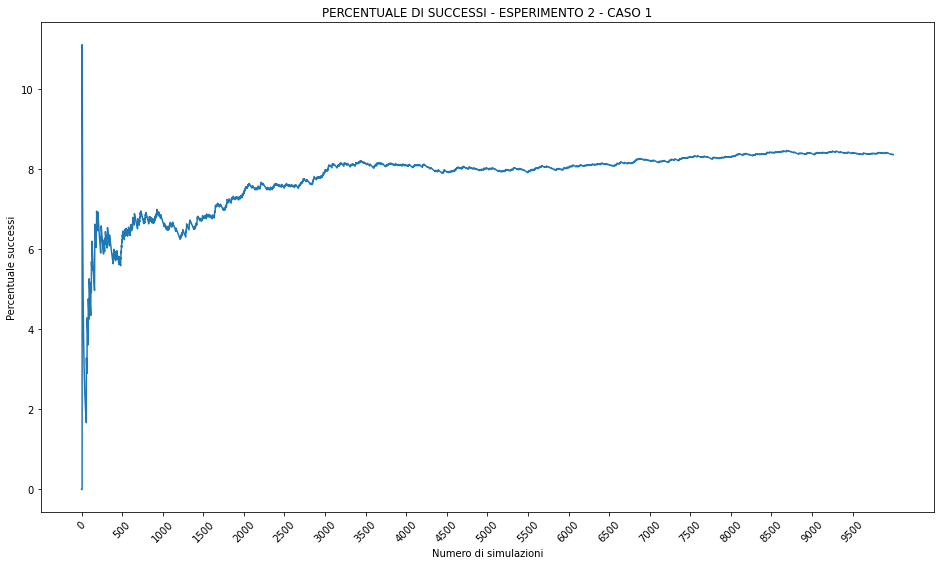

In [31]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 2 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [32]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 37.54 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

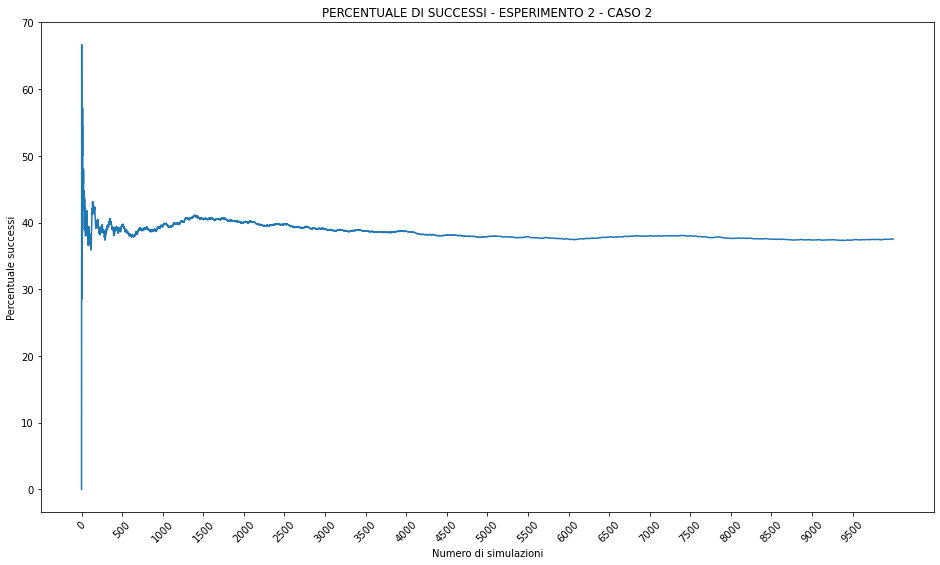

In [33]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 2 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente una Doppia Coppia, Luca deve solo evitare le combinazioni di carte migliori (come il Full). <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [34]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 83.63 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

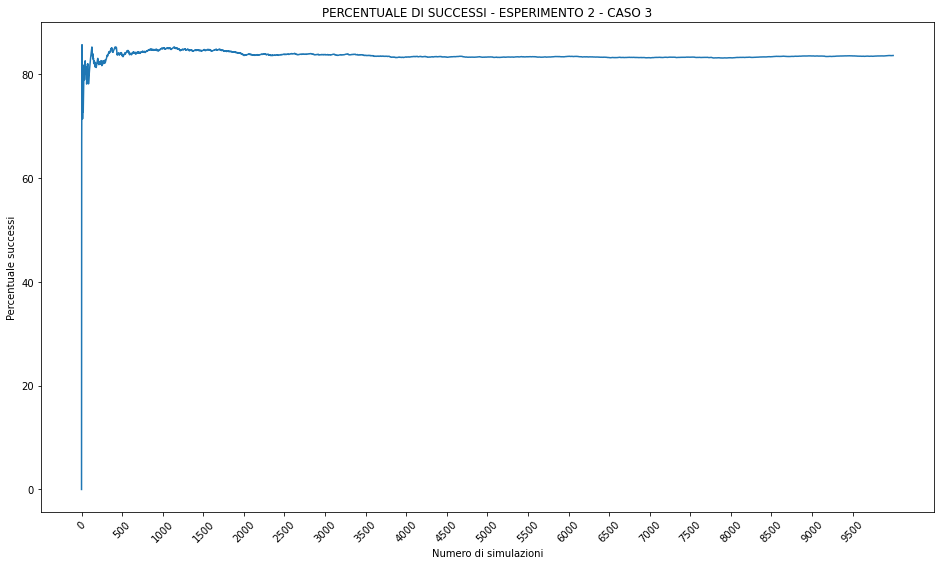

In [35]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 2 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Doppia Coppia. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Doppia Coppia nei casi che abbiamo analizzato:

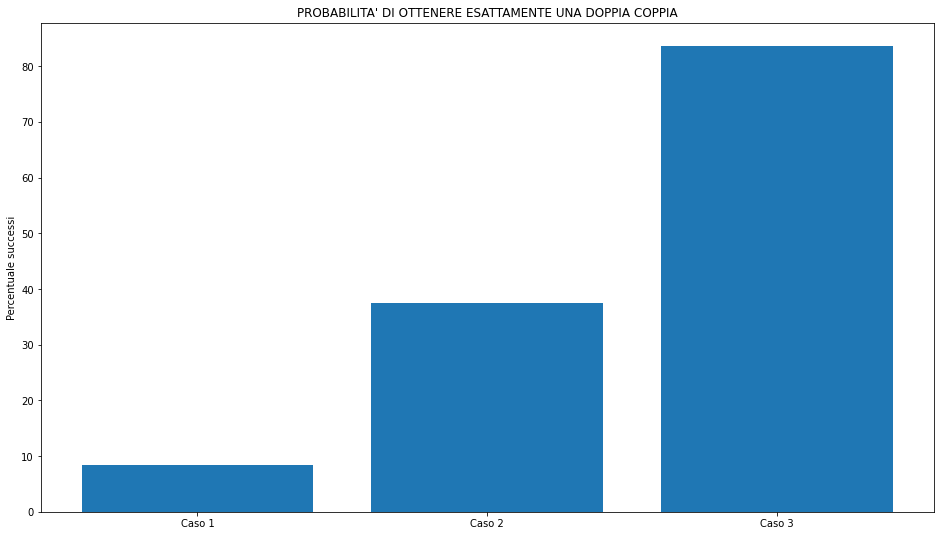

In [36]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA DOPPIA COPPIA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note hanno tutte valori differenti tra loro.</li>
    <li><b>Caso 2</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro.</li>
    <li><b>Caso 3</b> = le 5 carte note contengono due coppie di valori uguali tra loro.</li>
</ul>

#### Esperimento 3
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Tris al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori differenti tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [37]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 1.38 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

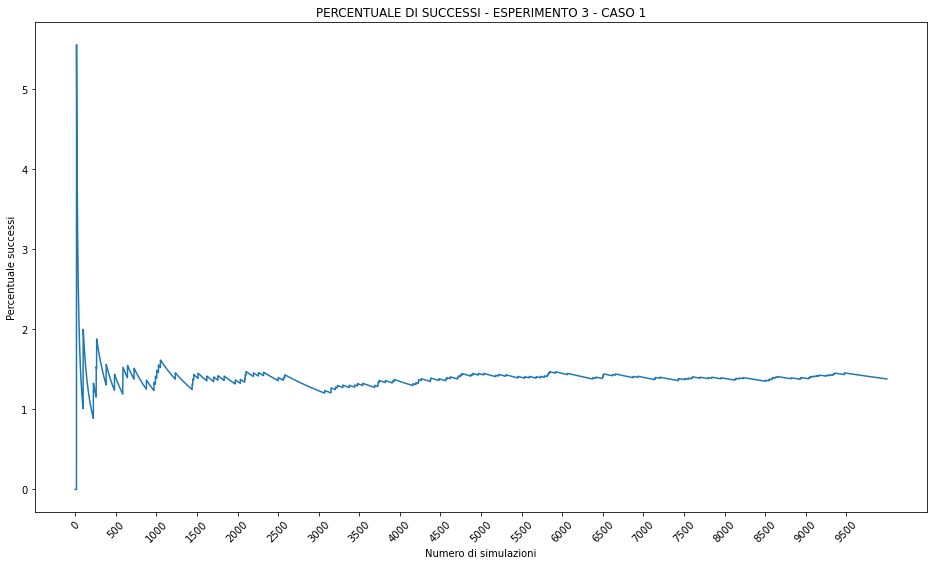

In [38]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 3 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [39]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 6.53 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

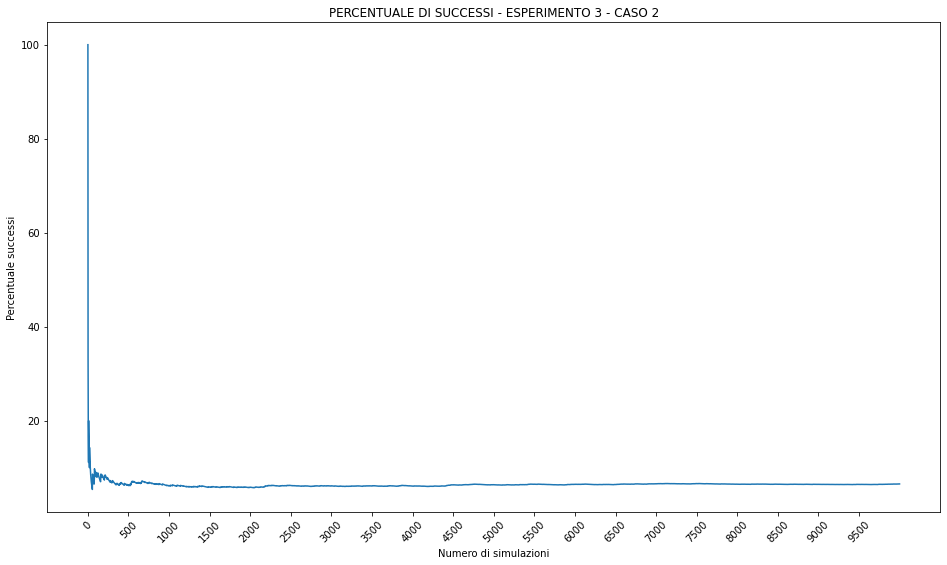

In [40]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 3 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note contengano un tris di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente un Tris, Luca deve solo evitare le combinazioni di carte migliori (come il Poker). <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [41]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 67.02 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

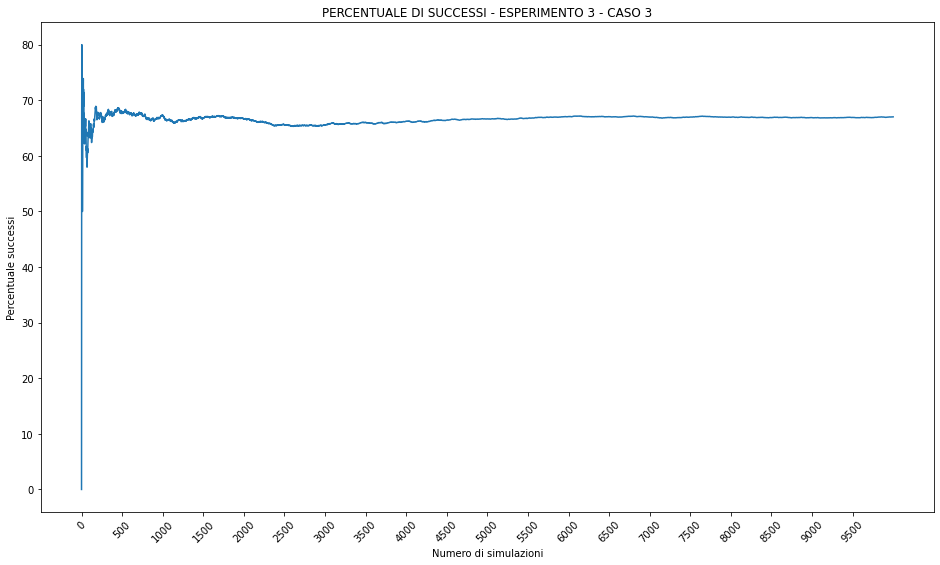

In [42]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 3 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Tris. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Tris nei casi che abbiamo analizzato:

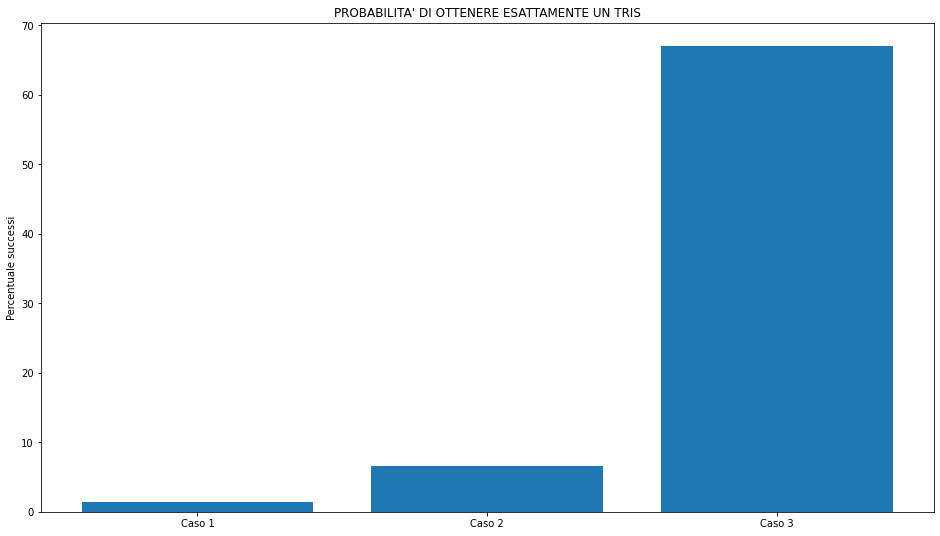

In [43]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN TRIS")

<ul>
    <li><b>Caso 1</b> = le 5 carte note hanno tutte valori differenti tra loro.</li>
    <li><b>Caso 2</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro.</li>
    <li><b>Caso 3</b> = le 5 carte note contengono un tris di valori uguali tra loro.</li>
</ul>

#### Esperimento 4
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Scala al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori distanti tra loro, in modo tale che non sarà possibile che più di 2 carte tra queste appartengano all'eventuale Scala. Poiché le carte coperte sul tavolo sono solo 2, possiamo intuire già da ora che Luca, in questa situazione, non potrà mai ottenere una Scala. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [44]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ1 +=1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

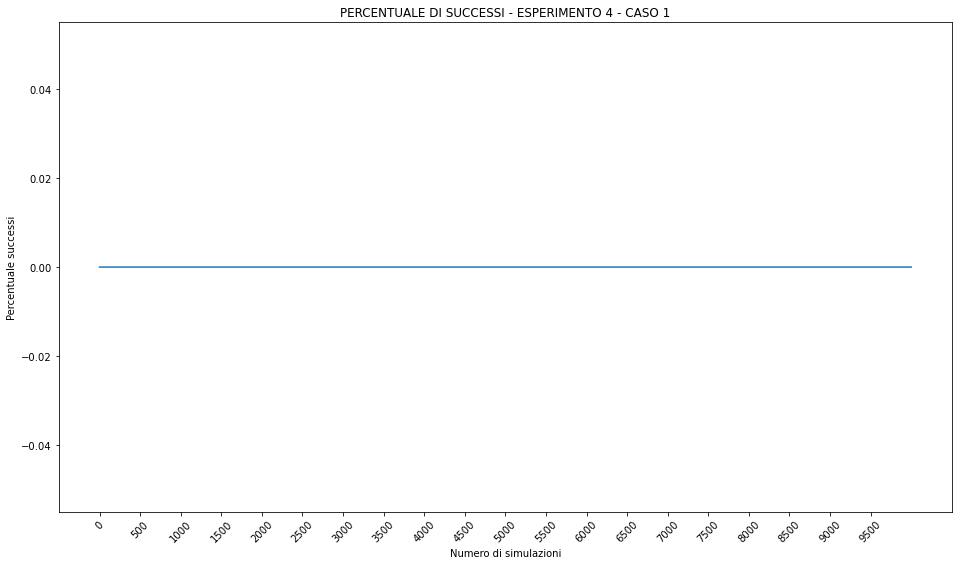

In [45]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 4 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note siano tali che non sarà possibile che più di 3 carte tra queste appartengano all'eventuale Scala. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [46]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', '8P', '7F', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ2 +=1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 2.92 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

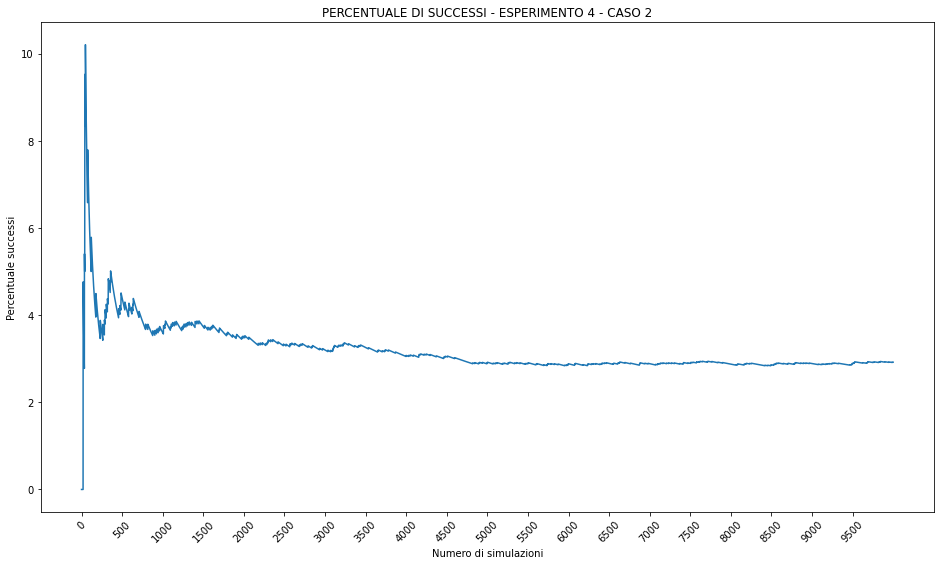

In [47]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 4 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note siano tali che 4 di esse potranno potenzialmente appartenere alla Scala. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il sei di picche e il cinque di quadri, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [48]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('6P')
pack.remove('5Q')

init = ['AC', '8P', '7F', '6P', '5Q']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ3 +=1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('6P')
pack.append('5Q')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 31.19 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

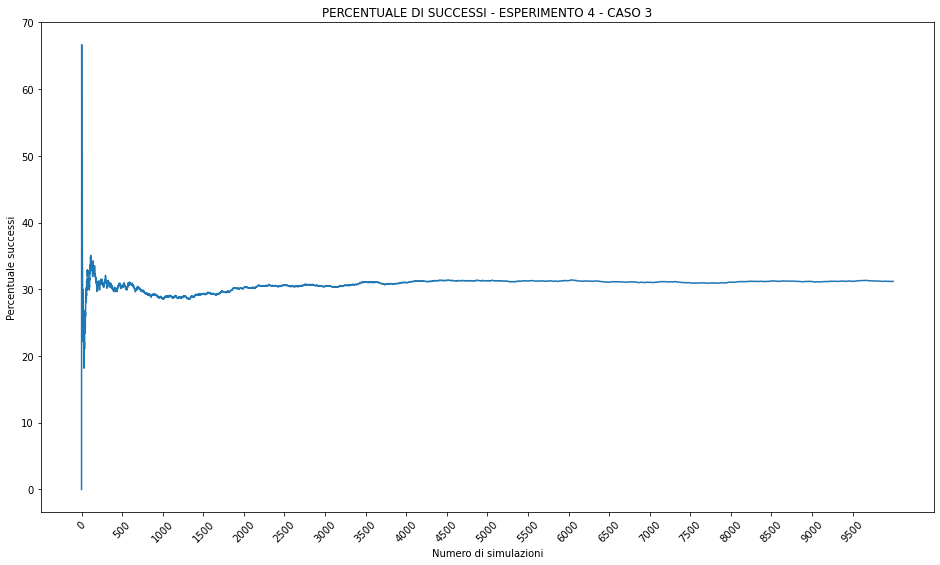

In [49]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 4 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Scala. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Scala nei casi che abbiamo analizzato:

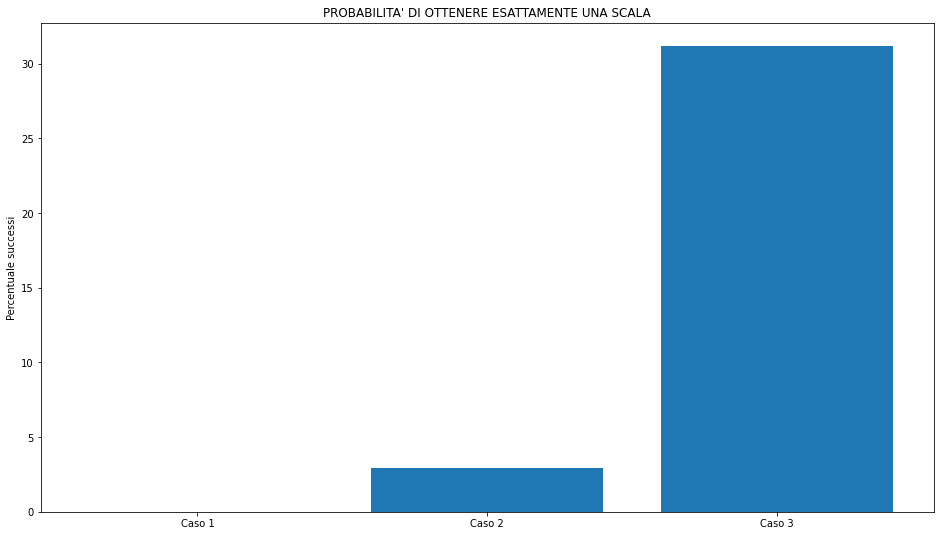

In [50]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA SCALA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note sono tali che non è possibile che più di 2 carte tra queste appartengano all'eventuale Scala.</li>
    <li><b>Caso 2</b> = le 5 carte note sono tali che non è possibile che più di 3 carte tra queste appartengano all'eventuale Scala.</li>
    <li><b>Caso 3</b> = le 5 carte note sono tali che 4 di loro possono appartenere all'eventuale Scala.</li>
</ul>

#### Esperimento 5
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Colore al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note siano di 4 semi differenti, in modo tale che solo 2 di queste carte abbiano lo stesso seme. Poiché le carte coperte sul tavolo sono solo 2, possiamo intuire già da ora che Luca, in questa situazione, non potrà mai ottenere un Colore. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [51]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

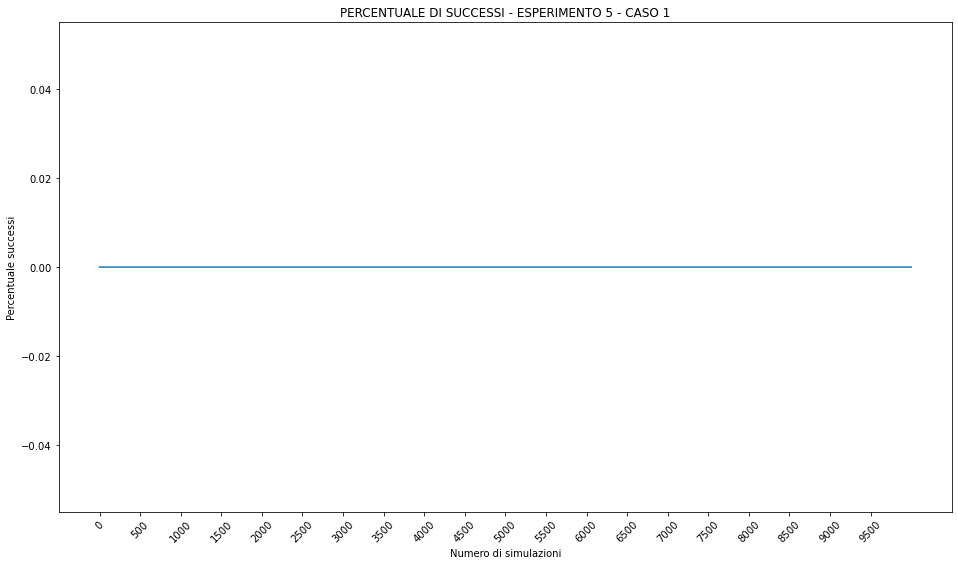

In [52]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 5 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note siano di 3 semi differenti, in modo tale che 3 di queste carte abbiano lo stesso seme. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [53]:
pack.remove('AC')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JP', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 4.25 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

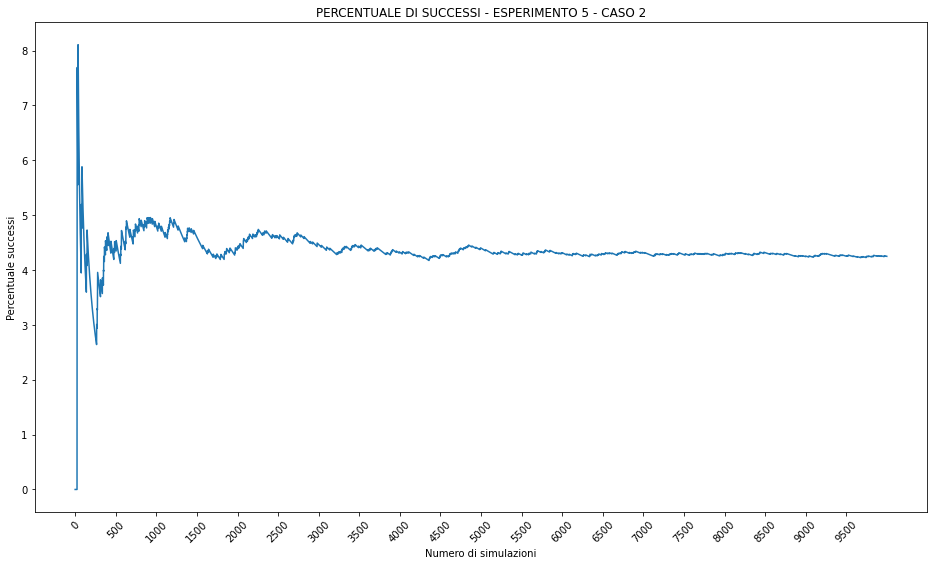

In [54]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 5 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note siano di 2 semi differenti, in modo tale che 4 di queste carte abbiano lo stesso seme. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di picche, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [55]:
pack.remove('AP')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AP', 'JP', '8P', '5Q', '2P']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AP')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 34.81 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

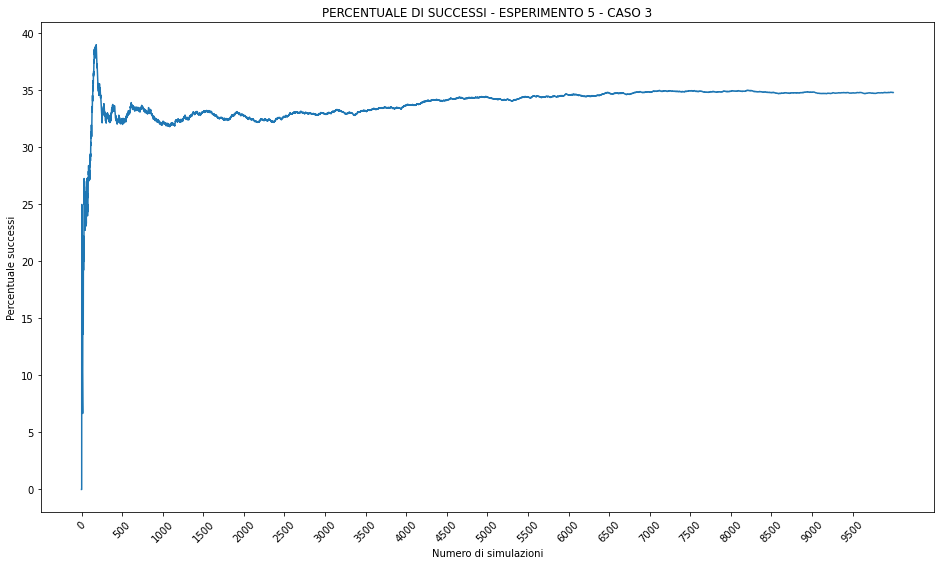

In [56]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 5 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Colore. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Colore nei casi che abbiamo analizzato:

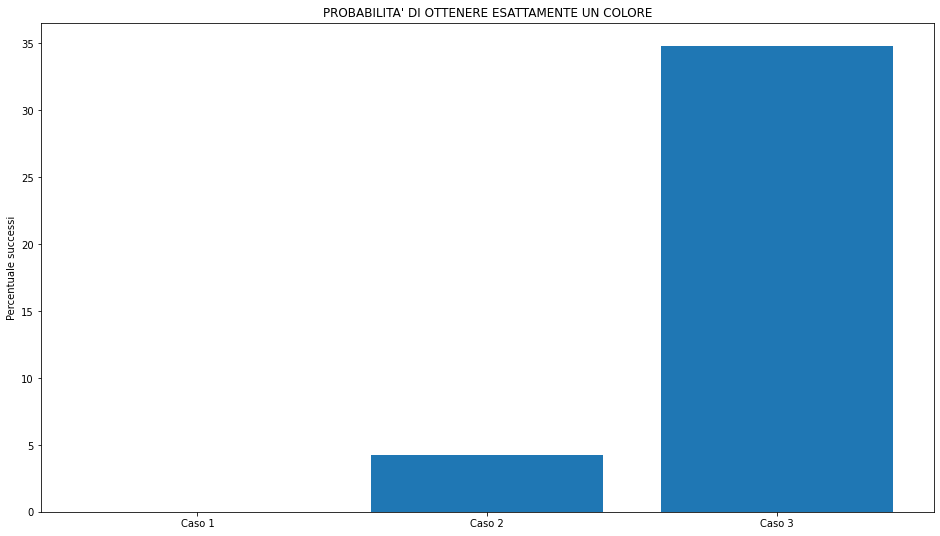

In [57]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN COLORE")

<ul>
    <li><b>Caso 1</b> = le 5 carte note sono tali che solo 2 di loro hanno lo stesso seme.</li>
    <li><b>Caso 2</b> = le 5 carte note sono tali che 3 di loro hanno lo stesso seme.</li>
    <li><b>Caso 3</b> = le 5 carte note sono tali che 4 di loro hanno lo stesso seme.</li>
</ul>

#### Esperimento 6
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Full al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori differenti tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [58]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

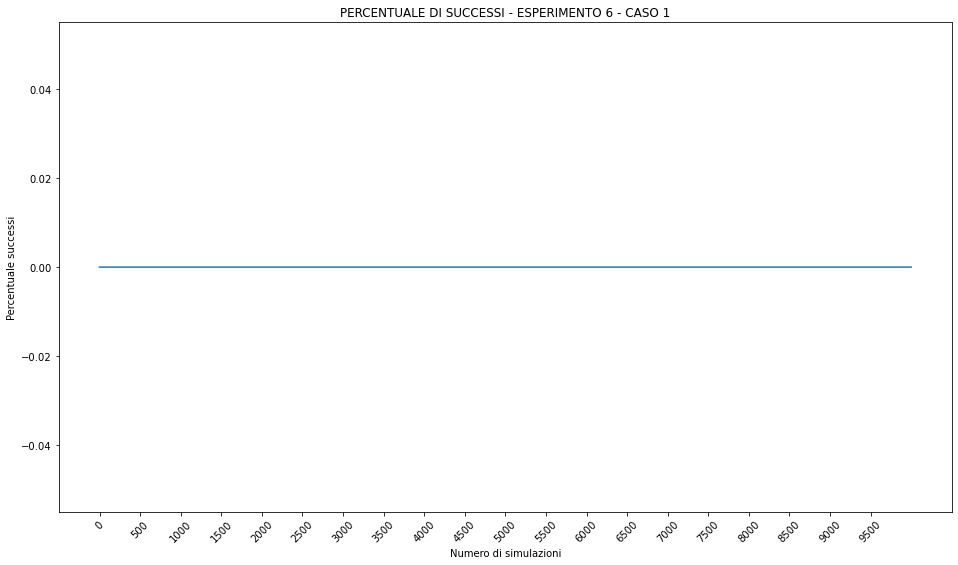

In [59]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 6 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [60]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 2.41 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

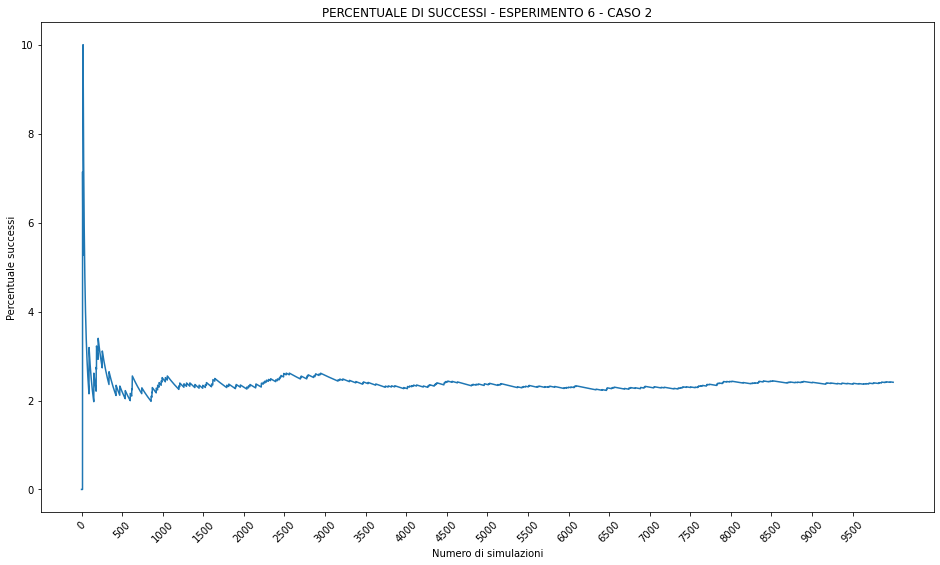

In [61]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 6 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [62]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 16.51 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

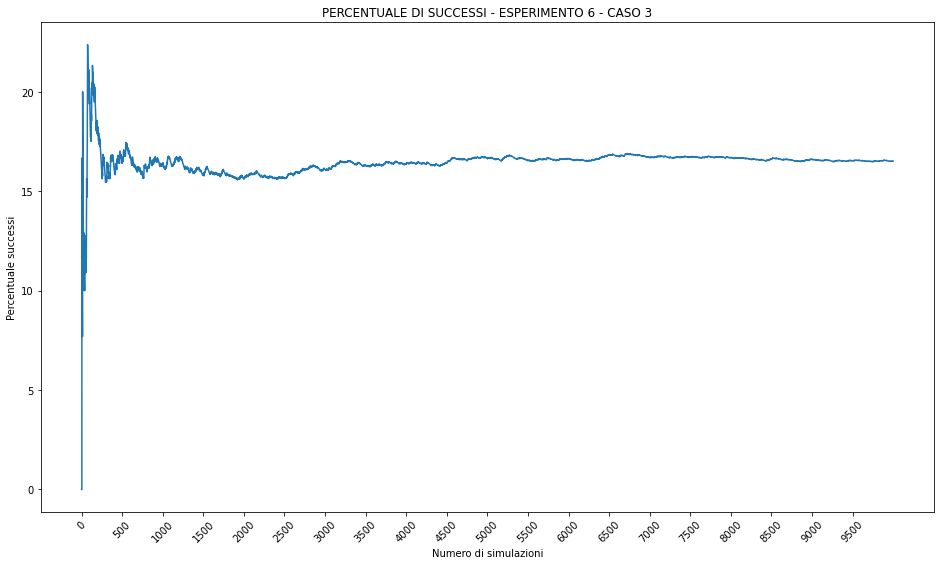

In [63]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 6 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note contengano un tris di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [64]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 29.35 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

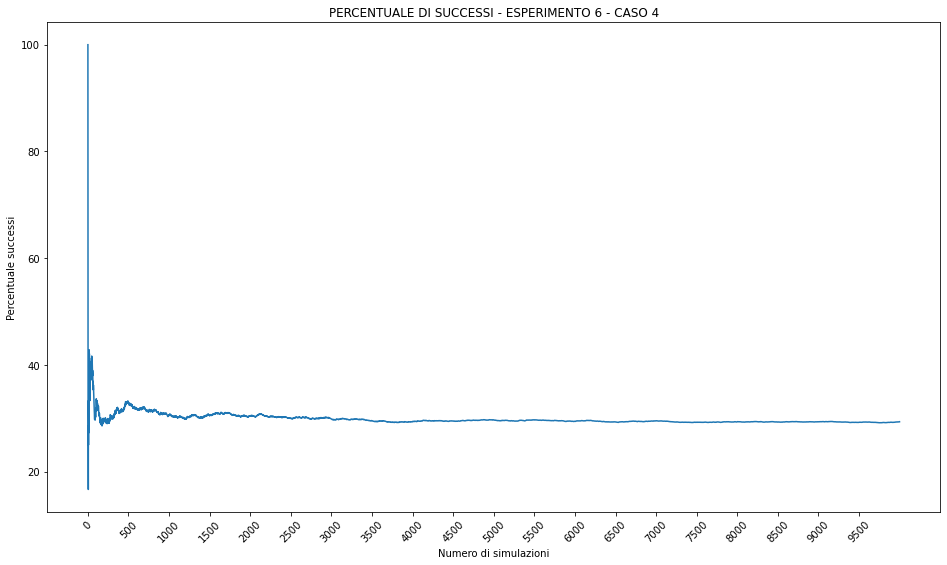

In [65]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 6 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note contengano un tris e una coppia di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente un Full, Luca deve solo evitare le combinazioni di carte migliori (come il Poker). <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [66]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 95.3 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

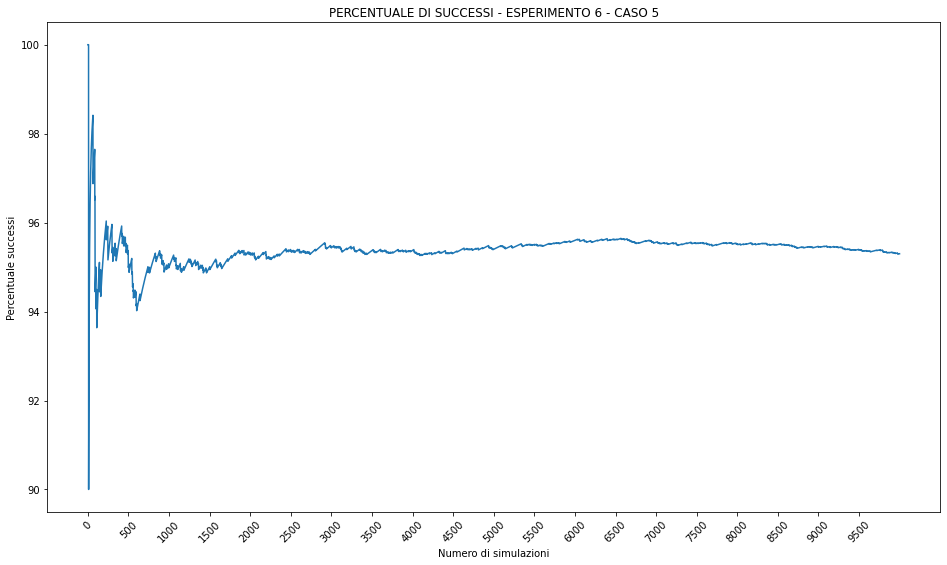

In [67]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 6 - CASO 5")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Full. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Full nei casi che abbiamo analizzato:

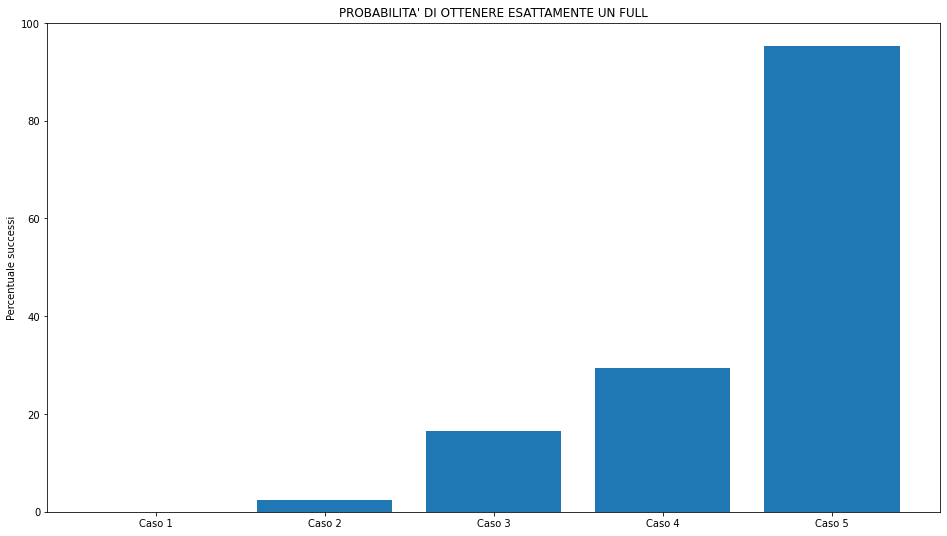

In [68]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN FULL")

<ul>
    <li><b>Caso 1</b> = le 5 carte note hanno tutte valori differenti tra loro.</li>
    <li><b>Caso 2</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro.</li>
    <li><b>Caso 3</b> = le 5 carte note contengono due coppie di valori uguali tra loro.</li>
    <li><b>Caso 4</b> = le 5 carte note contengono un tris di valori uguali tra loro.</li>
    <li><b>Caso 5</b> = le 5 carte note contengono un tris e una coppia di valori uguali tra loro.</li>
</ul>

#### Esperimento 7
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Poker al variare della situazione iniziale.

##### Caso 1
Supponiamo che le 5 carte note abbiano tutte valori differenti tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [69]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

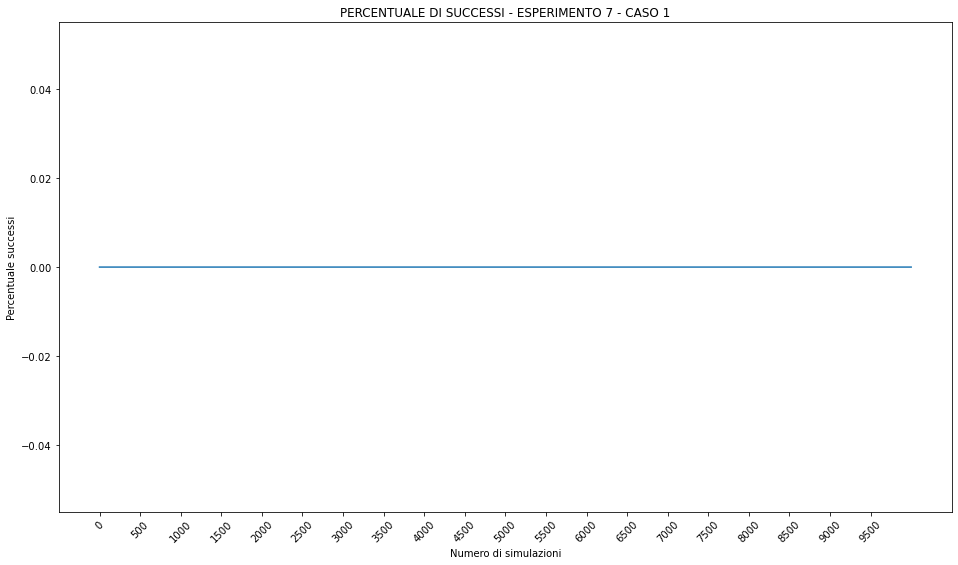

In [70]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 7 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [71]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.07 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

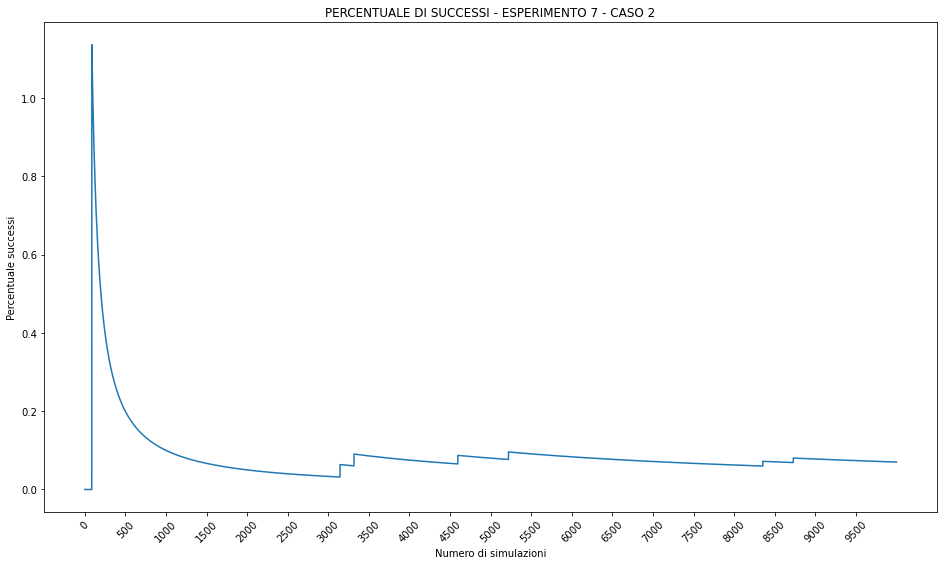

In [72]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 7 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [73]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.23 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

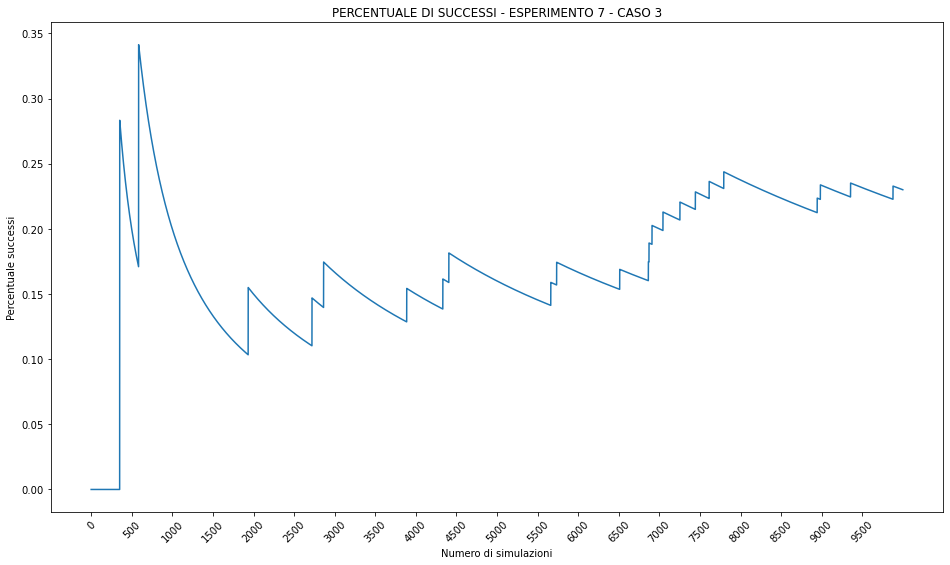

In [74]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 7 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note contengano un tris di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [75]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 4.35 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

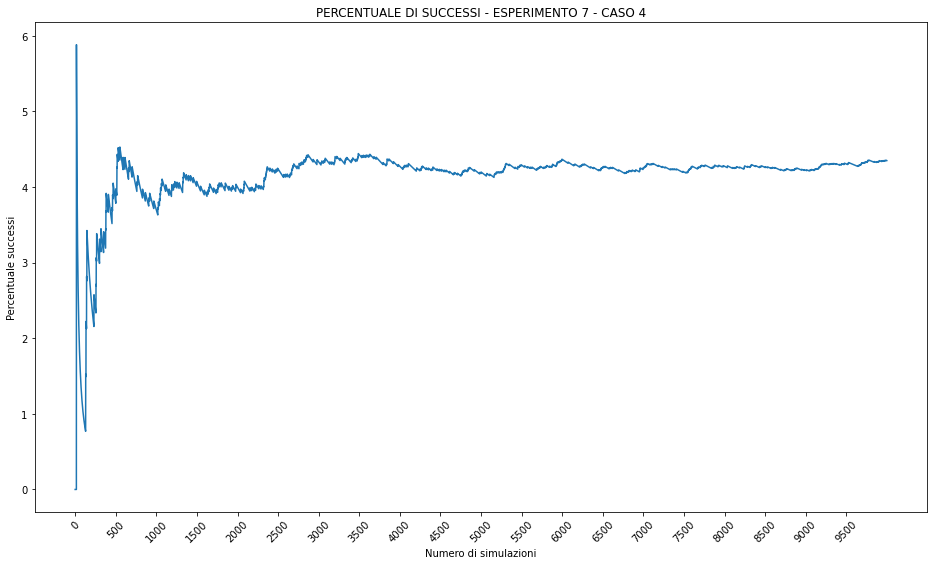

In [76]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 7 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note contengano un tris e una coppia di valori uguali tra loro. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [77]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 4.4 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

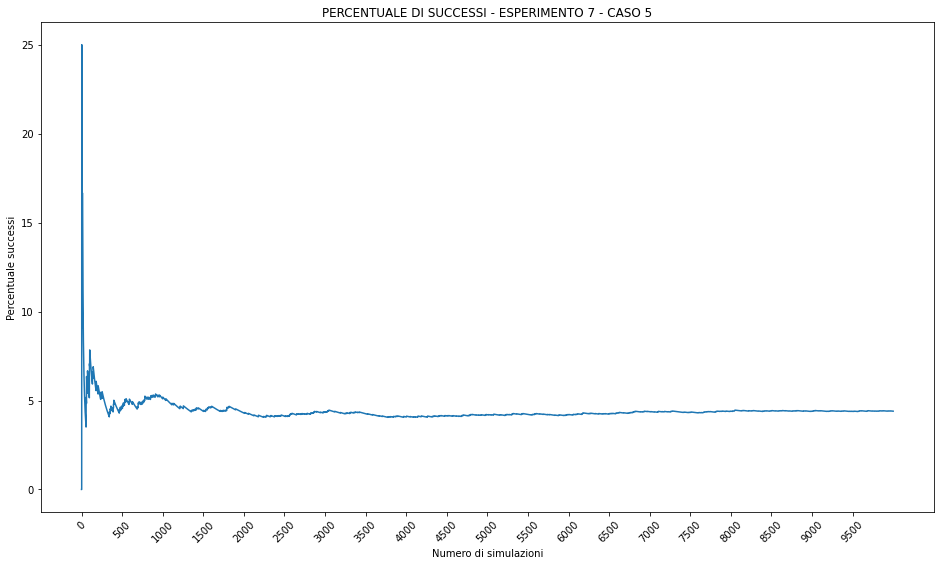

In [78]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 7 - CASO 5")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Poker. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Poker nei casi che abbiamo analizzato:

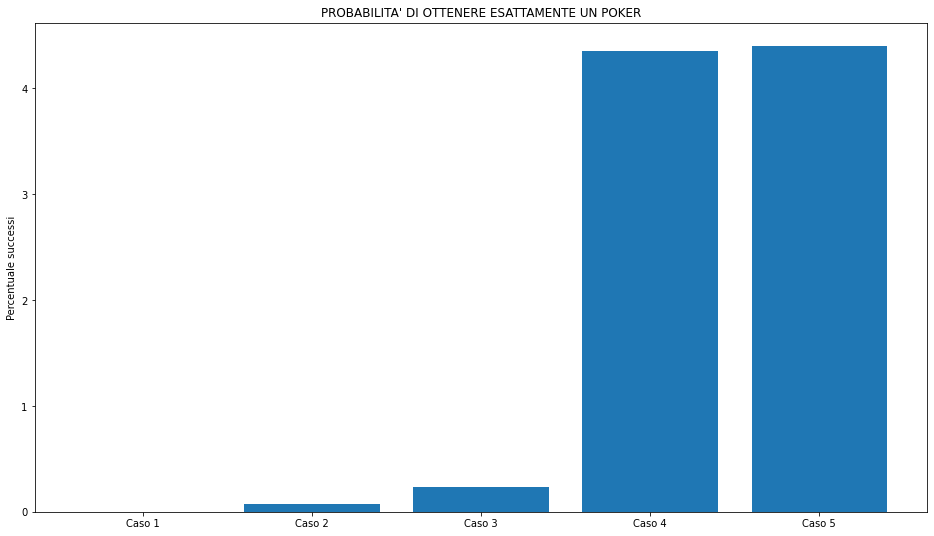

In [79]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN POKER")

<ul>
    <li><b>Caso 1</b> = le 5 carte note hanno tutte valori differenti tra loro.</li>
    <li><b>Caso 2</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro.</li>
    <li><b>Caso 3</b> = le 5 carte note contengono due coppie di valori uguali tra loro.</li>
    <li><b>Caso 4</b> = le 5 carte note contengono un tris di valori uguali tra loro.</li>
    <li><b>Caso 5</b> = le 5 carte note contengono un tris e una coppia di valori uguali tra loro.</li>
</ul>

#### Esperimento 8
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Scala Reale al variare della situazione iniziale (accorpiamo l'analisi della Scala di Colore con l'analisi della Scala Reale poiché, dal punto di vista delle casistiche e delle probabilità, sono del tutto analoghe).

##### Caso 1
Supponiamo che le 5 carte note siano tali che solo 2 di loro potranno appartenere all'eventuale Scala Reale. Poiché le carte coperte sul tavolo sono solo 2, possiamo intuire già da ora che Luca, in questa situazione, non potrà mai ottenere una Scala Reale. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [80]:
pack.remove('AF')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AF', 'JF', '8P', '5Q', '2P']

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ1 +=1
    results.append(100*succ1/(i+1))

pack.append('AF')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

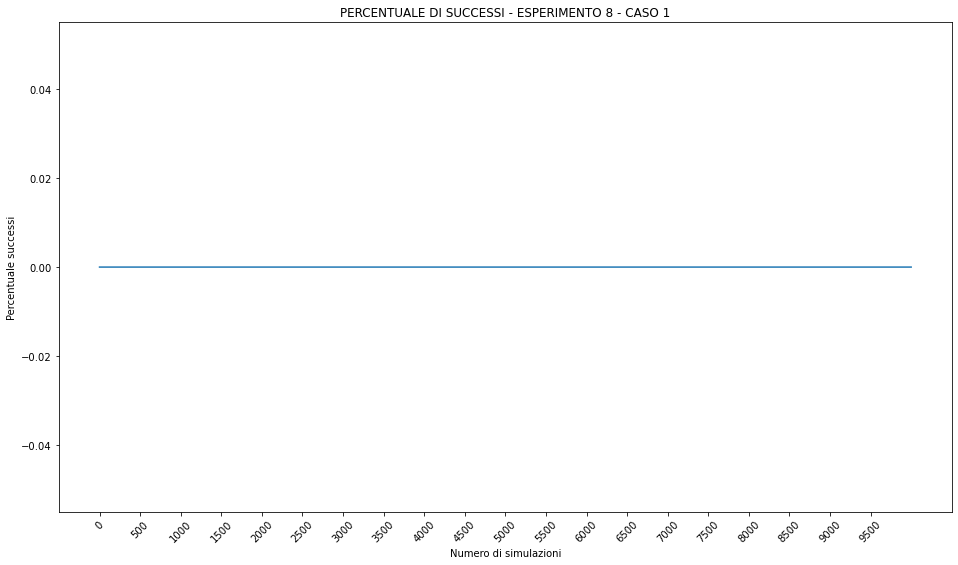

In [81]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 8 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note siano tali che 3 di loro potranno appartenere all'eventuale Scala Reale. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il jack di fiori, il dieci di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [82]:
pack.remove('AF')
pack.remove('JF')
pack.remove('TF')
pack.remove('5Q')
pack.remove('2P')

init = ['AF', 'JF', 'TF', '5Q', '2P']

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ2 +=1
    results.append(100*succ2/(i+1))

pack.append('AF')
pack.append('JF')
pack.append('TF')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 0.08 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

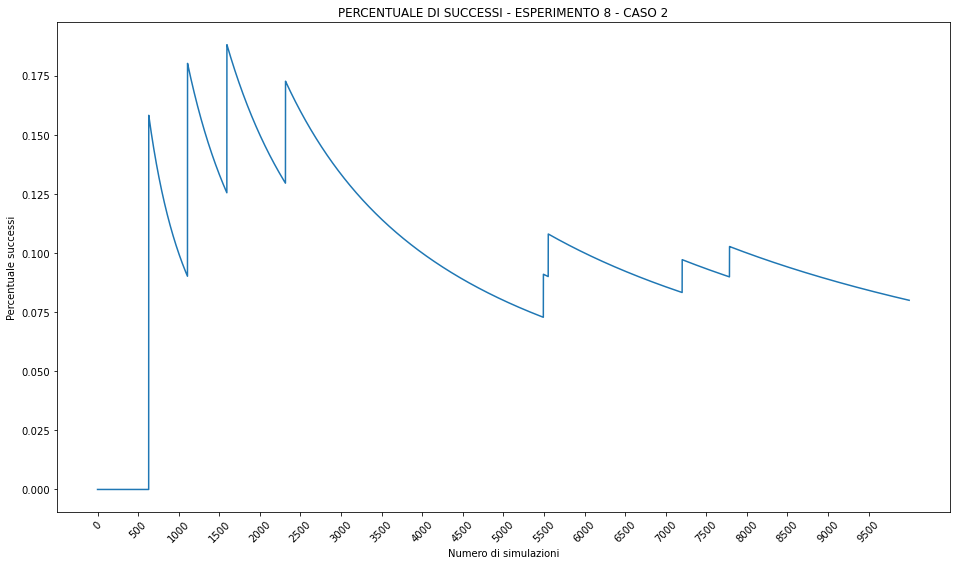

In [83]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 8 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note siano tali che 4 di loro potranno appartenere all'eventuale Scala Reale. Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il re di fiori, il jack di fiori, il dieci di fiori e il cinque di quadri, che assumiamo essere le 5 carte note di Luca. <br>
Dopodiché effettuiamo le nostre simulazioni:

In [84]:
pack.remove('AF')
pack.remove('KF')
pack.remove('JF')
pack.remove('TF')
pack.remove('5Q')

init = ['AF', 'KF', 'JF', 'TF', '5Q']

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ3 +=1
    results.append(100*succ3/(i+1))

pack.append('AF')
pack.append('KF')
pack.append('JF')
pack.append('TF')
pack.append('5Q')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 4.07 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

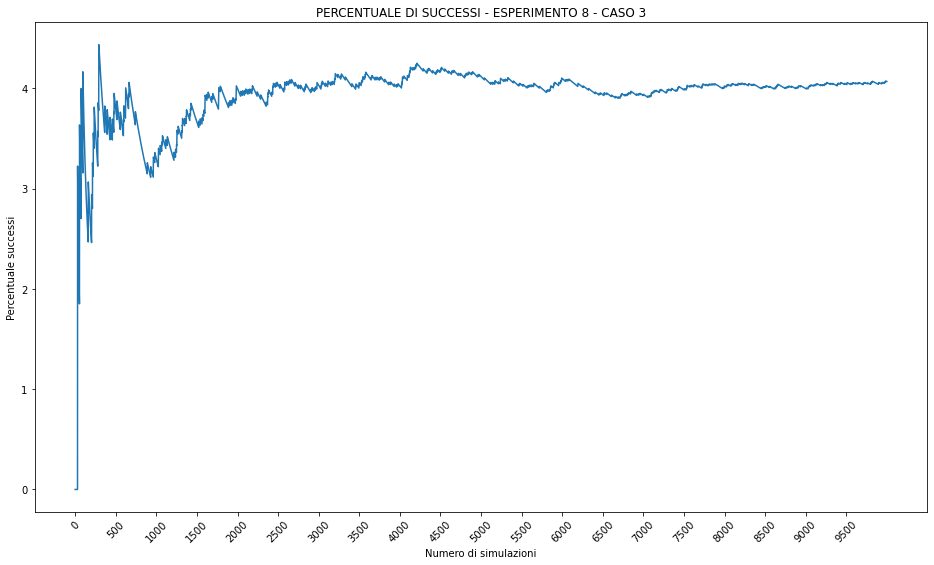

In [85]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 8 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Scala Reale. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Scala Reale nei casi che abbiamo analizzato:

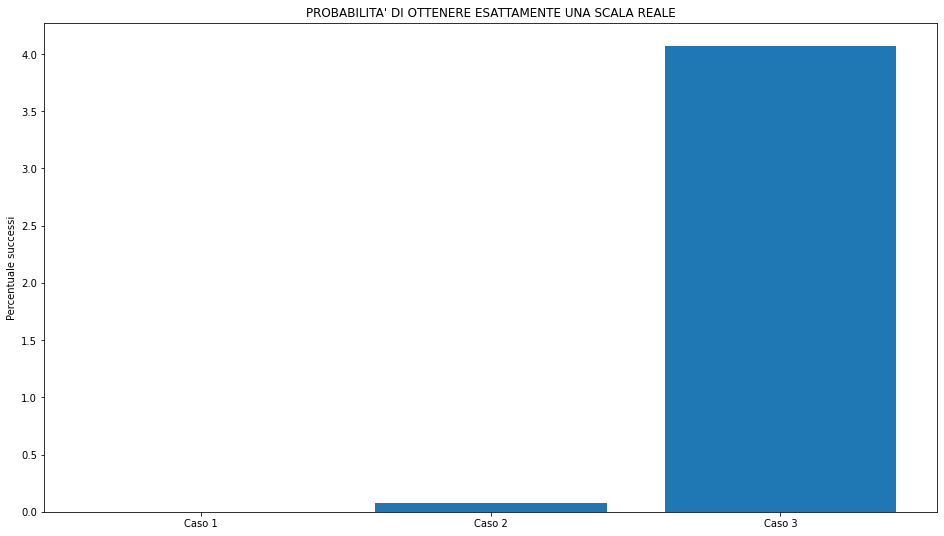

In [86]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA SCALA REALE")

<ul>
    <li><b>Caso 1</b> = le 5 carte note sono tali che solo 2 carte tra queste possono appartenere all'eventuale Scala Reale.</li>
    <li><b>Caso 2</b> = le 5 carte note sono tali che 3 carte tra queste possono appartenere all'eventuale Scala Reale.</li>
    <li><b>Caso 3</b> = le 5 carte note sono tali che 4 carte tra queste possono appartenere all'eventuale Scala Reale.</li>
</ul>

#### Esperimento 9
Iniziamo ora una nuova serie di esperimenti: riprendiamo quelli condotti finora e li ripetiamo, aggiungendo però, tra le informazioni note, le carte che Elisa, Sara e Andrea hanno in mano. <br>
Rimanendo nella fase di Flop del gioco, ricominciamo dunque dalla Coppia, e stimiamo la probabilità che Luca ottenga una Coppia al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [87]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 51.64 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

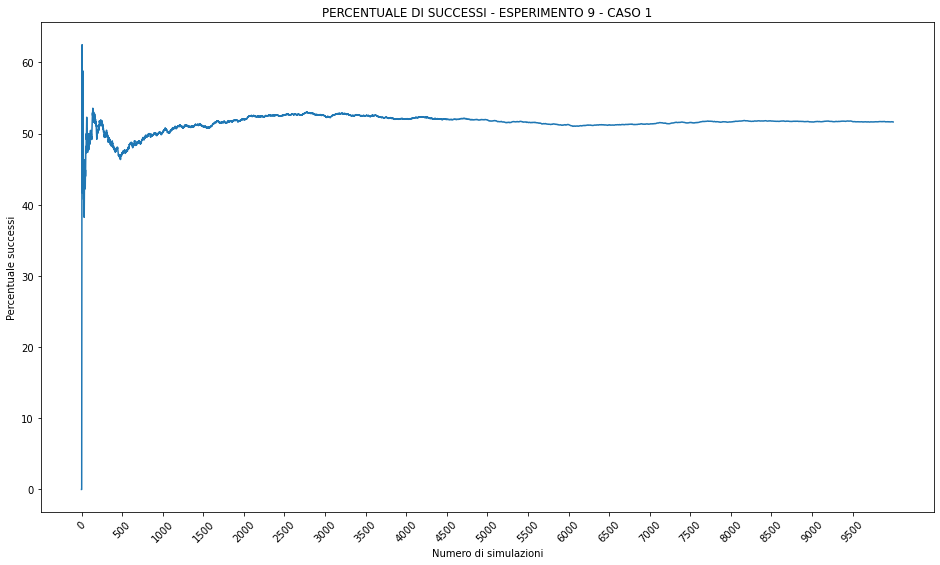

In [88]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il sei di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [89]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('6Q')
pack.remove('2F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('6Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 46.13 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

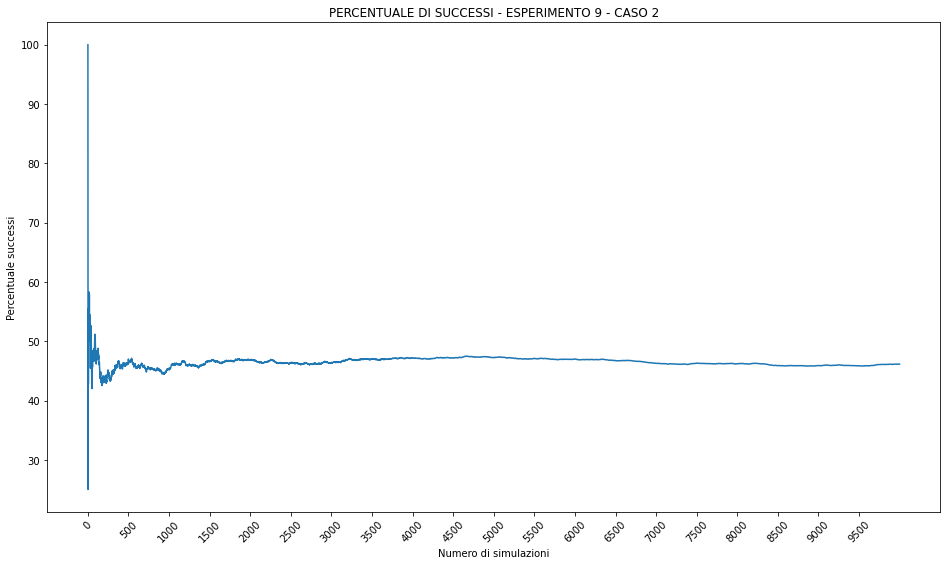

In [90]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il jack di cuori, l'otto di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [91]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('JC')
pack.append('8C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 41.62 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

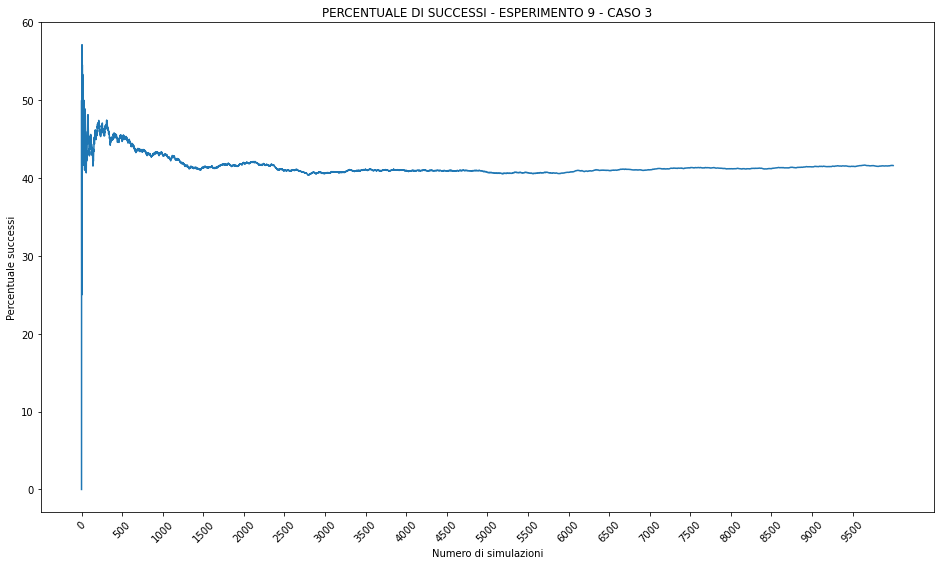

In [92]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente una Coppia, Luca deve solo evitare le combinazioni di carte migliori (come la Doppia Coppia, il Tris, il Full e il Poker). <br>
Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [93]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 49.04 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

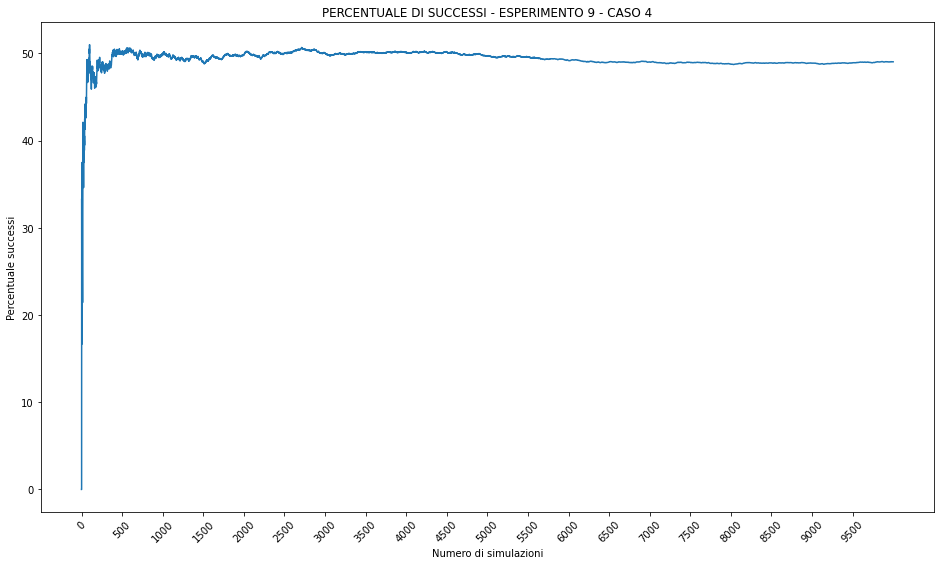

In [94]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [95]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('5F')
pack.remove('2F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 58.83 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

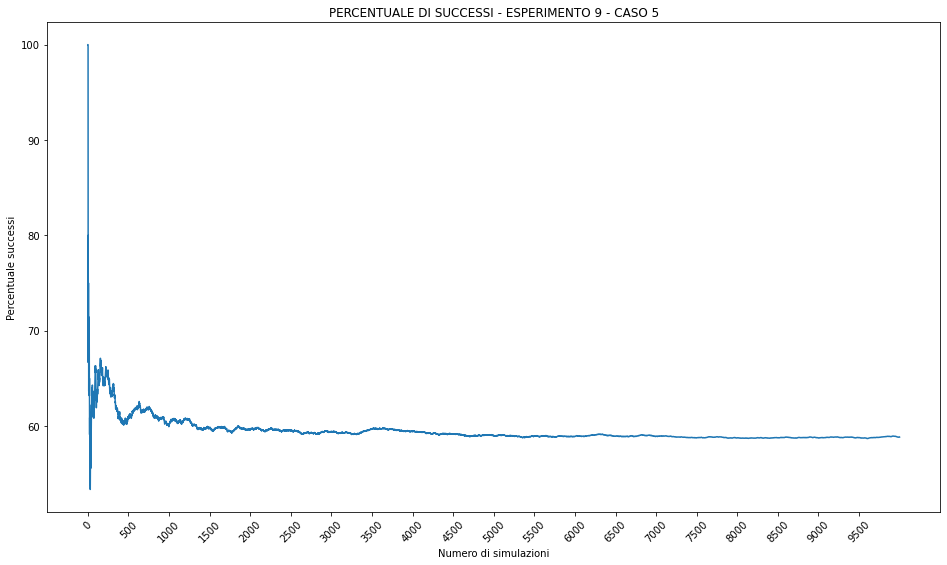

In [96]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, l'otto di fiori, l'otto di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [97]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('8F')
pack.remove('8C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 1:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('8F')
pack.append('8C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Coppia =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente una Coppia = 69.92 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

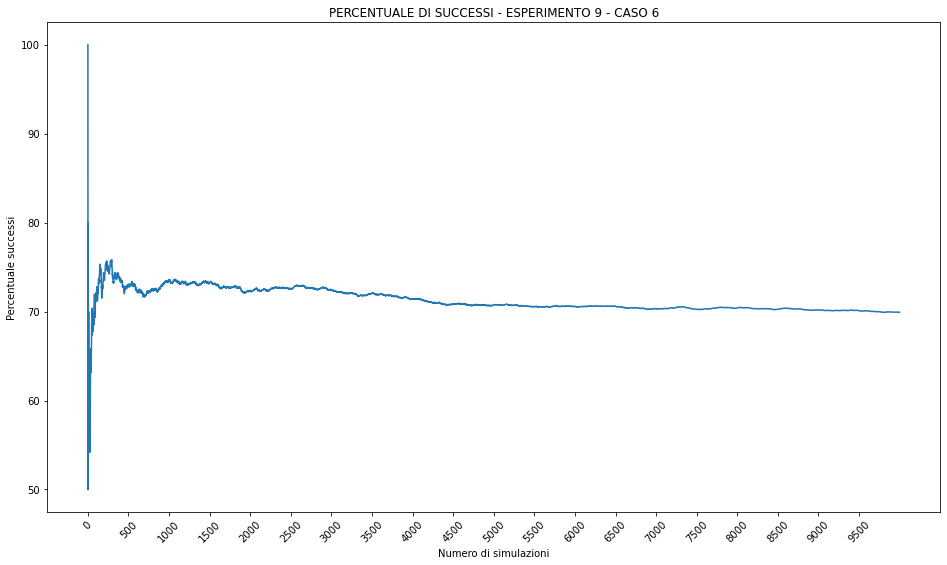

In [98]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 9 - CASO 6")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Coppia. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Coppia nei casi che abbiamo analizzato:

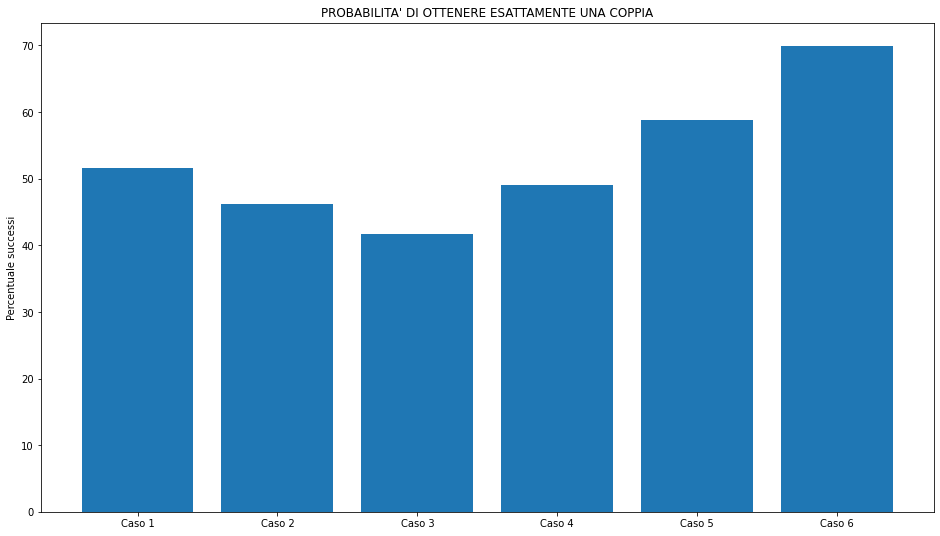

In [99]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA COPPIA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 4</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>
</ul>

#### Esperimento 10
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Doppia Coppia al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [100]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 11.11 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

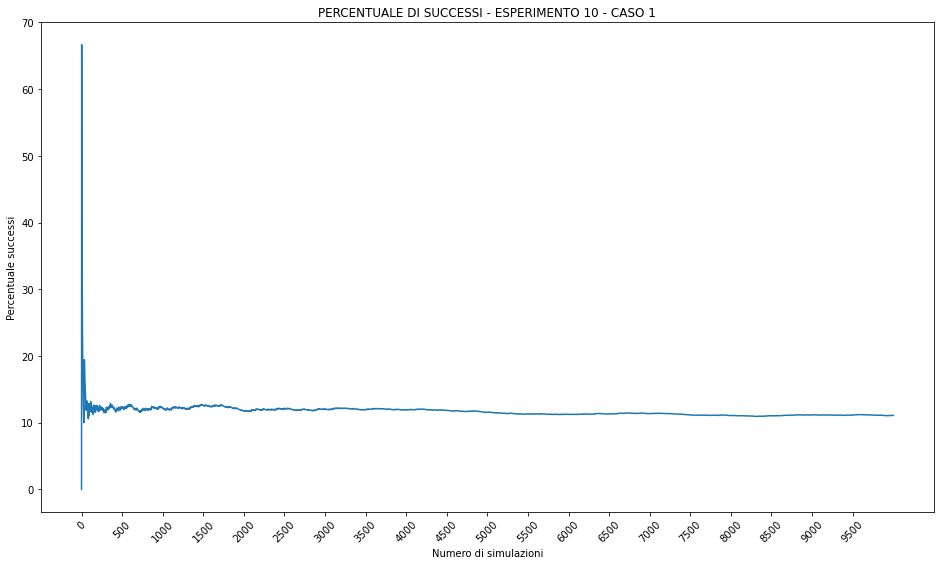

In [101]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il sei di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [102]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('6Q')
pack.remove('2F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('6Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 6.85 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

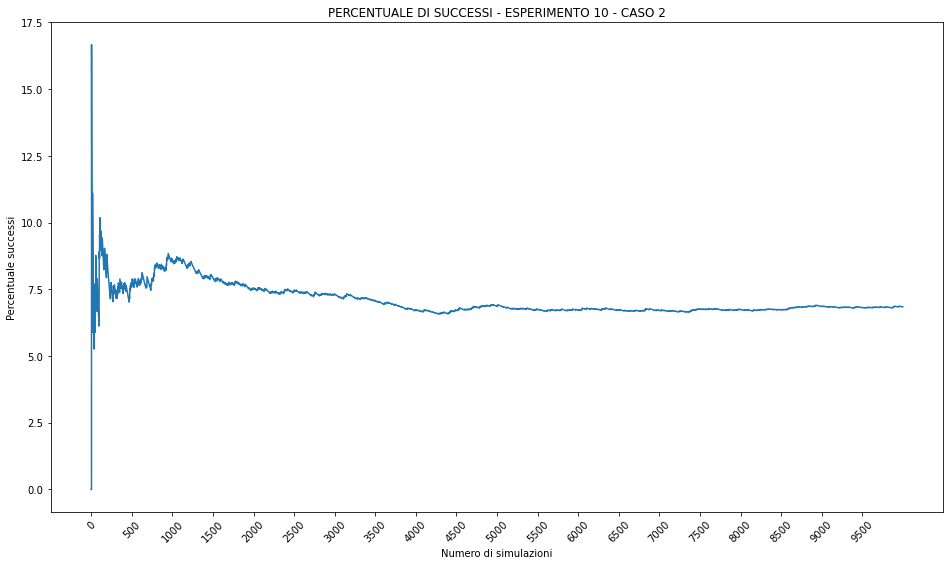

In [103]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il jack di cuori, l'otto di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [104]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('JC')
pack.append('8C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 3.83 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

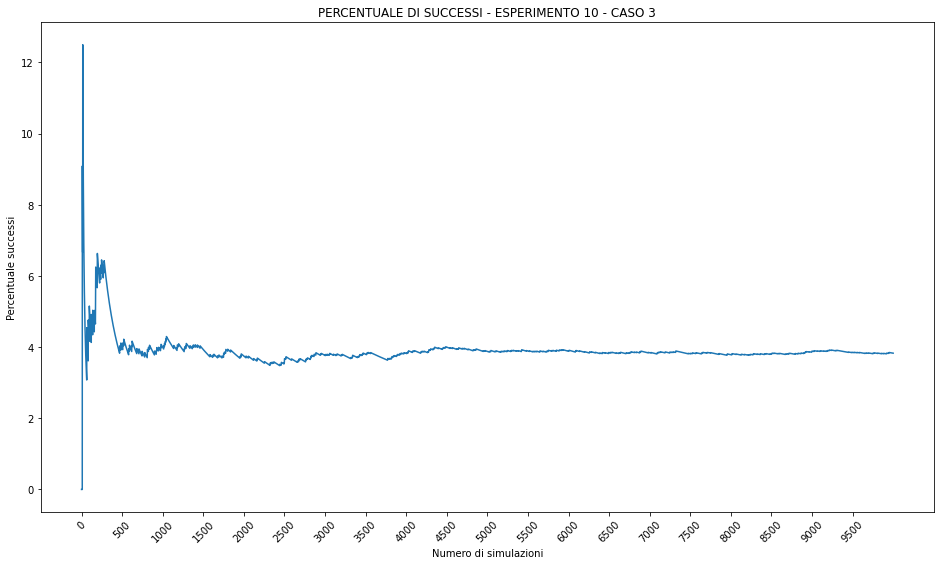

In [105]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [106]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 42.16 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

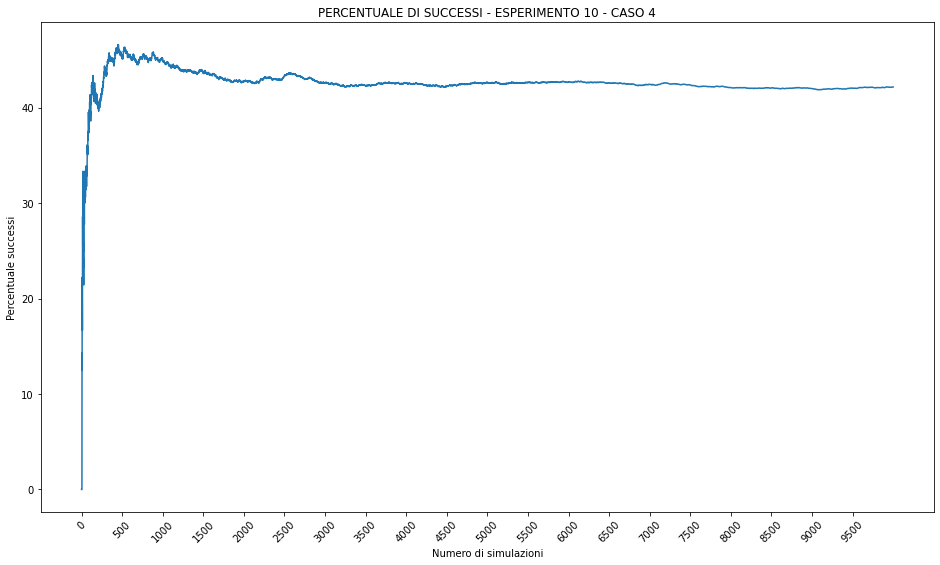

In [107]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [108]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('5F')
pack.remove('2F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 31.2 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

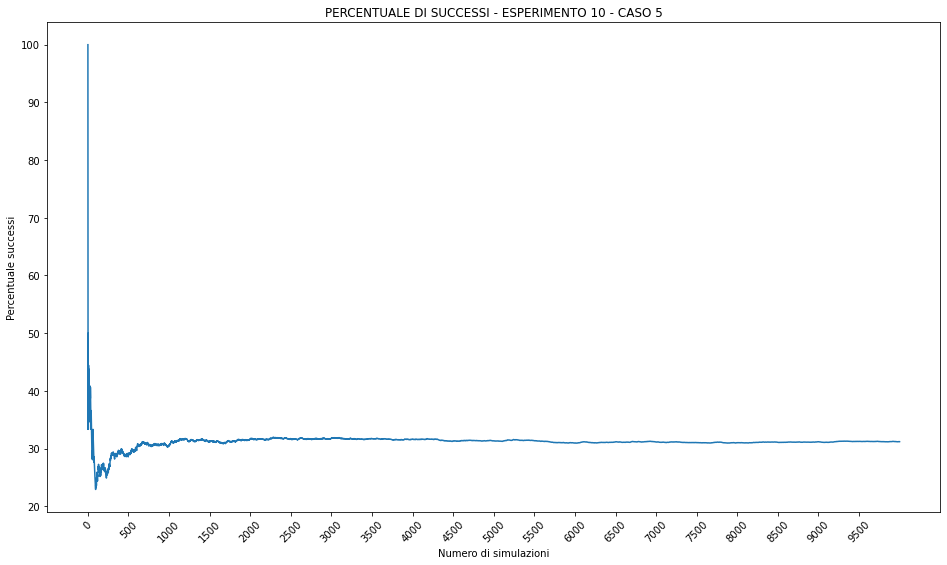

In [109]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, l'otto di fiori, l'otto di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [110]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('8F')
pack.remove('8C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('8F')
pack.append('8C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 25.45 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

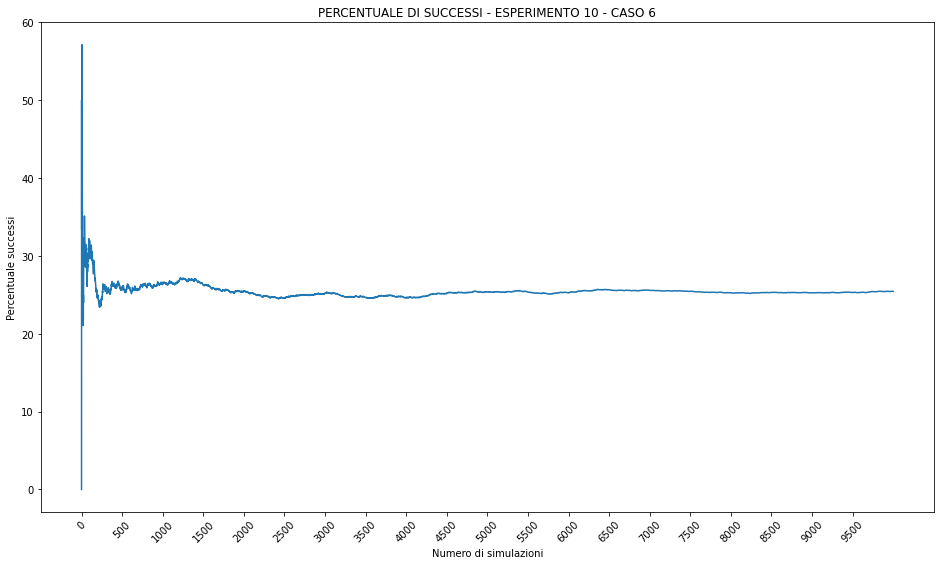

In [111]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 6")

##### Caso 7
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente una Doppia Coppia, Luca deve solo evitare le combinazioni di carte migliori (come il Full). <br>
Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [112]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ7 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ7 += 1
    results.append(100*succ7/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ7/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 81.18 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

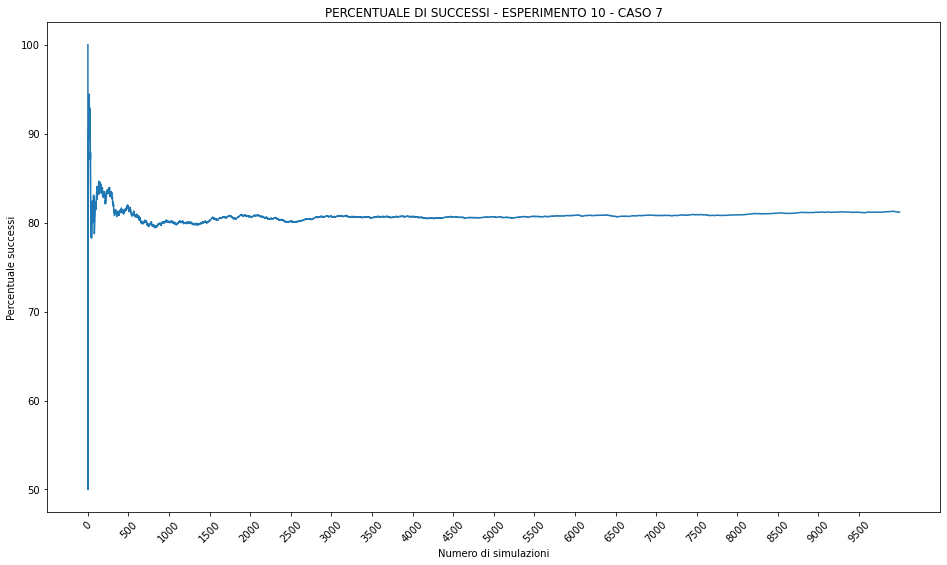

In [113]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 7")

##### Caso 8
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il jack di cuori, l'otto di quadri, l'otto di cuori, il sette di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [114]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('JC')
pack.remove('8Q')
pack.remove('8C')
pack.remove('7P')
pack.remove('5F')
pack.remove('2F')

succ8 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ8 += 1
    results.append(100*succ8/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('JC')
pack.append('8Q')
pack.append('8C')
pack.append('7P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ8/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 85.95 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

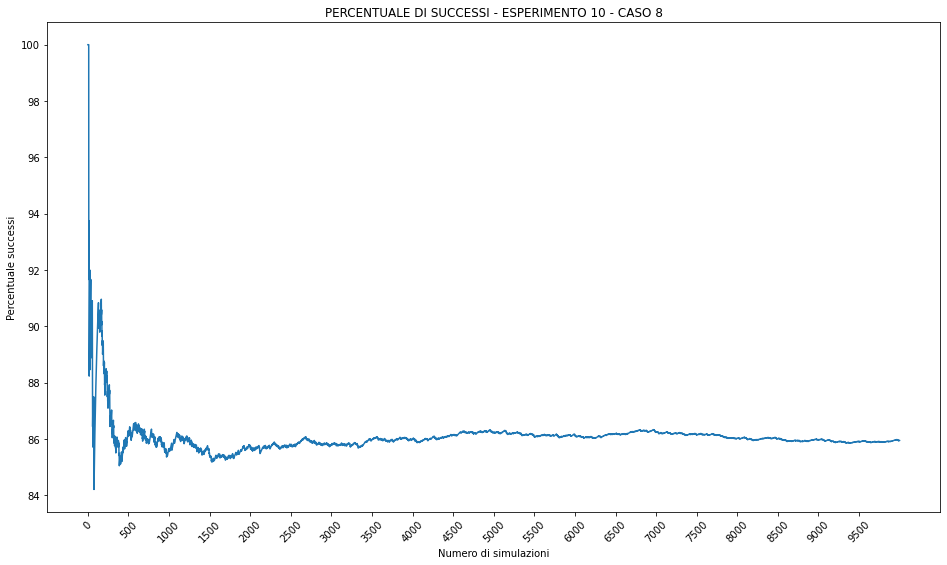

In [115]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 8")

##### Caso 9
Supponiamo che le 5 carte note contengano due coppie di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, l'otto di fiori, l'otto di cuori, l'otto di quadri, il due di cuori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [116]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('AQ')
pack.remove('8F')
pack.remove('8C')
pack.remove('8Q')
pack.remove('2C')
pack.remove('2F')

succ9 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 2 and retv[1] == 2:
        succ9 += 1
    results.append(100*succ9/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('AQ')
pack.append('8F')
pack.append('8C')
pack.append('8Q')
pack.append('2C')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Doppia Coppia =", 100*succ9/SIMUL, "%")

Probabilità di ottenere esattamente una Doppia Coppia = 95.2 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

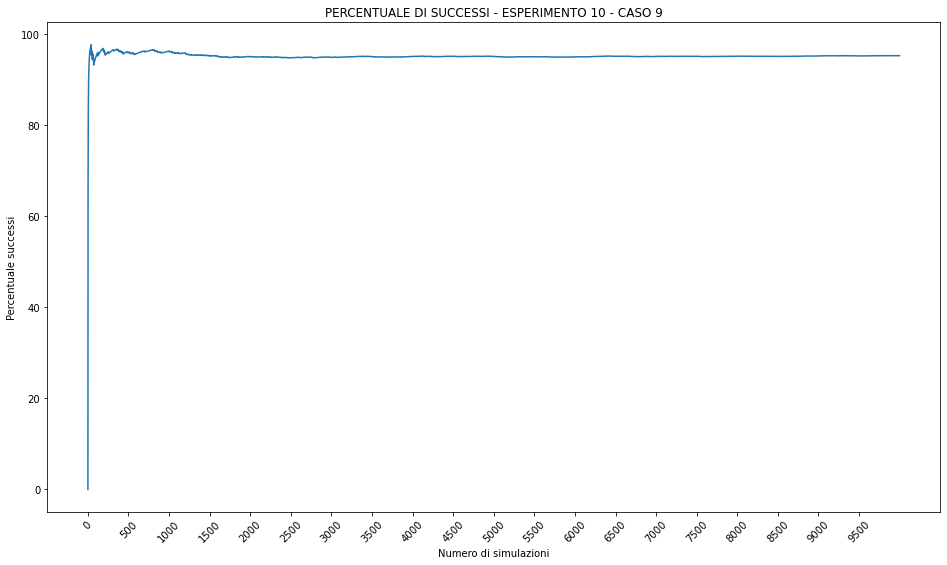

In [117]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 10 - CASO 9")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Doppia Coppia. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Doppia Coppia nei casi che abbiamo analizzato:

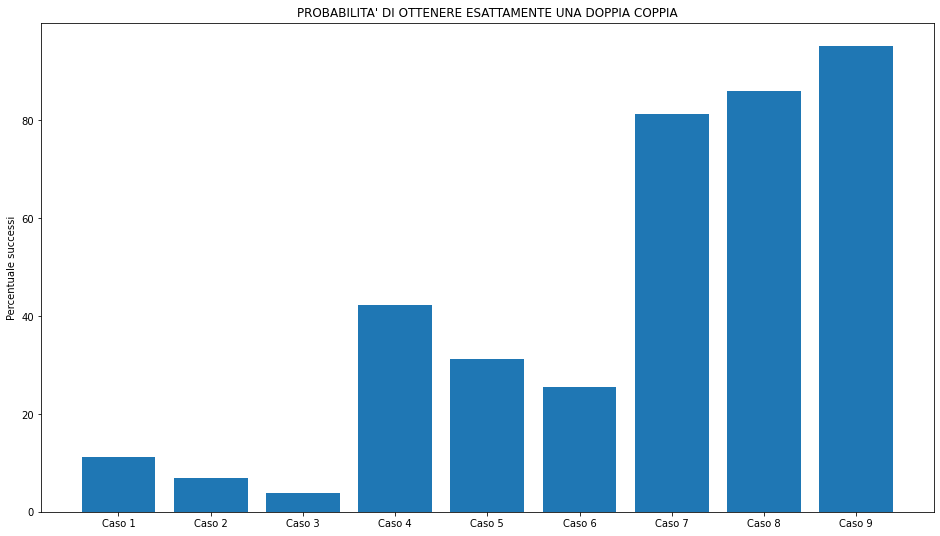

In [118]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6", "Caso 7", "Caso 8", "Caso 9"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL, 100*succ7/SIMUL, 100*succ8/SIMUL, 100*succ9/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA DOPPIA COPPIA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 4</b> = le 5 carte note contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 7</b> = le 5 carte note contengono due coppie di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 8</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 9</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>    
</ul>

#### Esperimento 11
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Tris al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [119]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 1.93 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

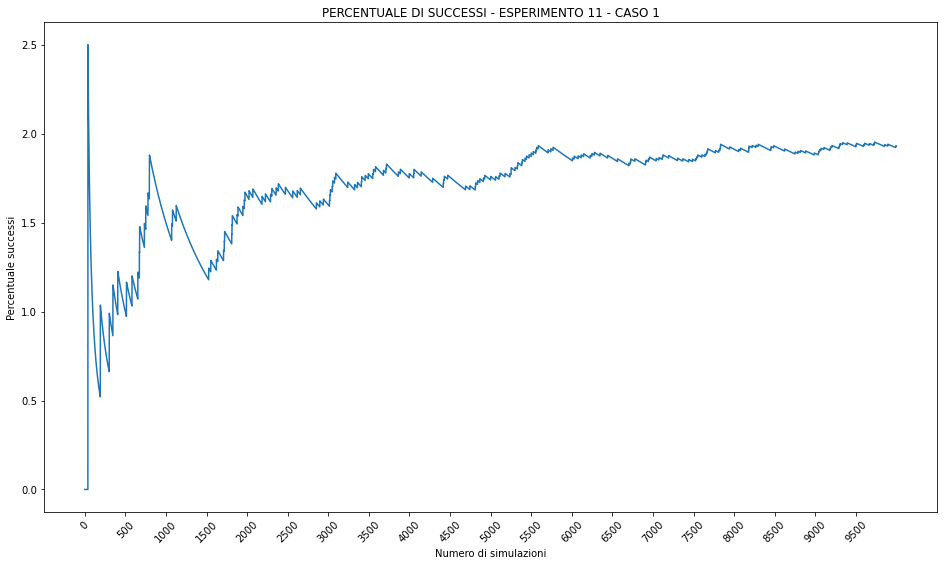

In [120]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il sei di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [121]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('6Q')
pack.remove('2F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('6Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 1.09 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

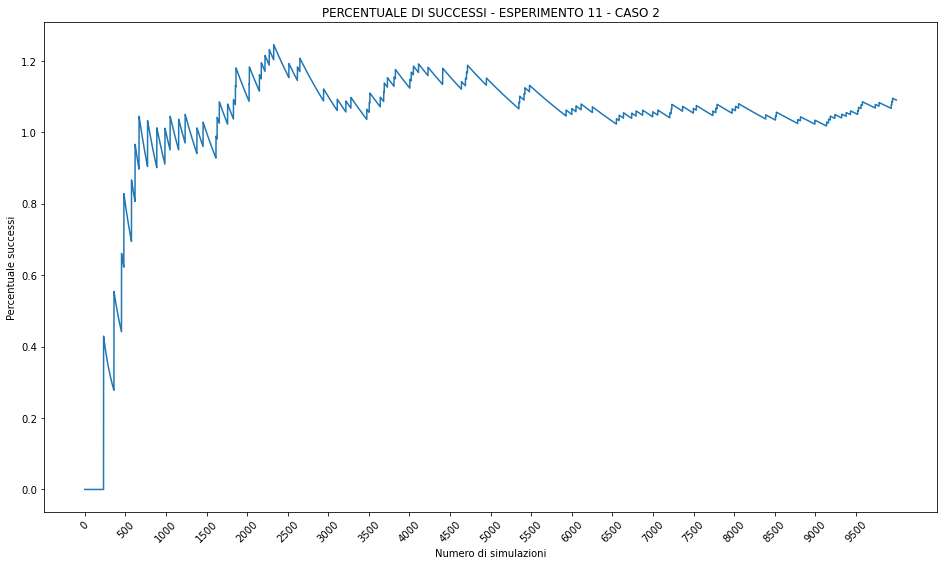

In [122]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca abbiano tutte valori differenti tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il jack di cuori, l'otto di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [123]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('JC')
pack.append('8C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 0.6 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

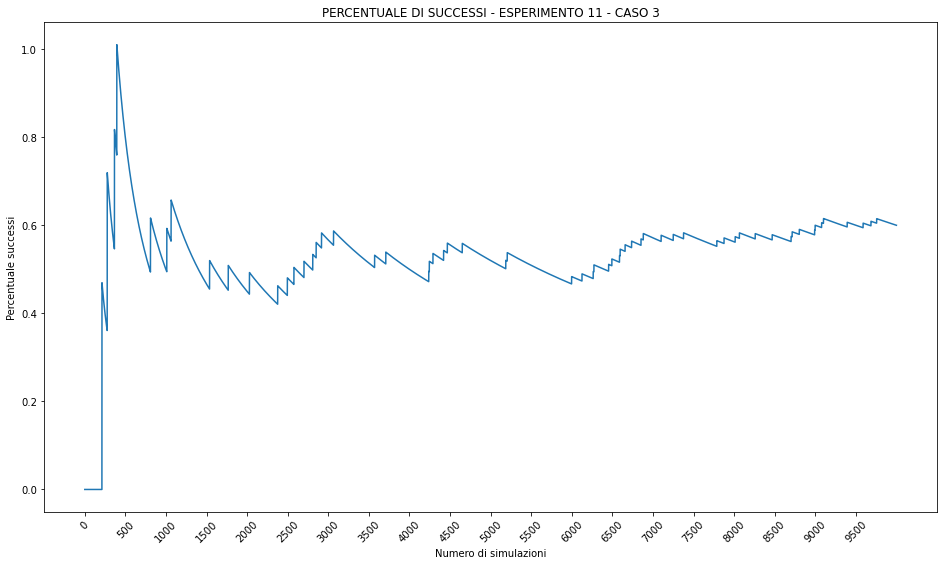

In [124]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [125]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 8.02 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

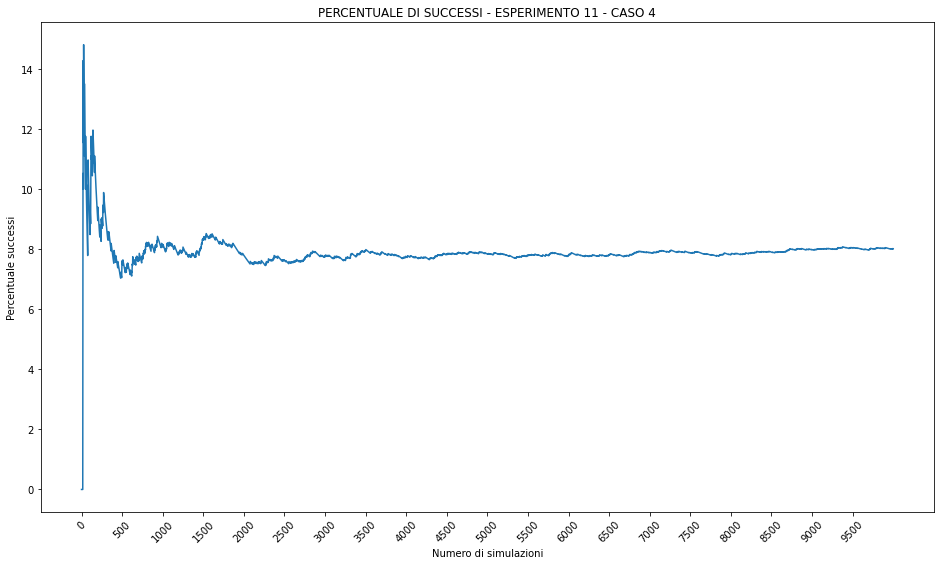

In [126]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore x, una carta con valore y e le restanti carte con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il quattro di fiori e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [127]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('4F')
pack.remove('3F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('4F')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 4.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

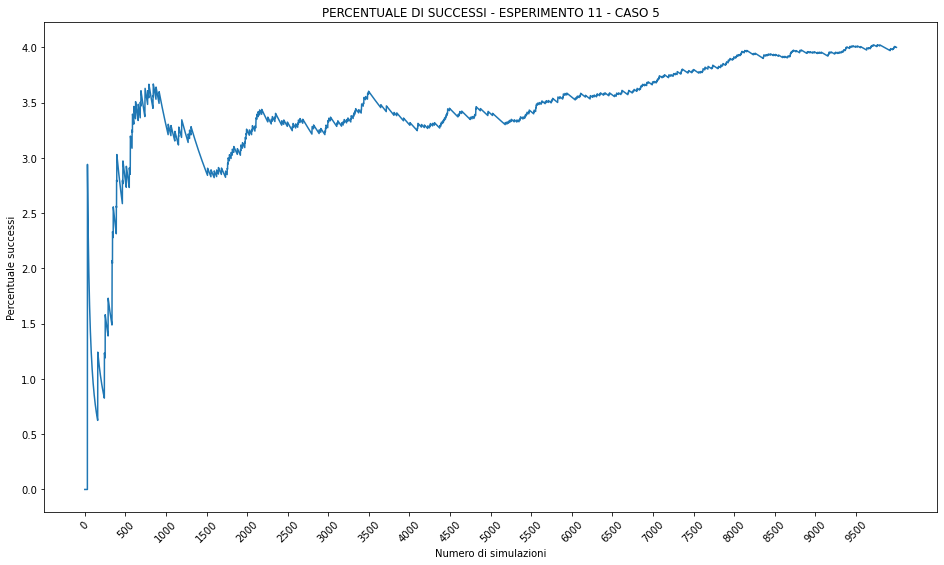

In [128]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore x, due carte con valore y, una carta con valore z, una carta con valore w e solo una carta con valore differente. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, l'otto di fiori, l'otto di cuori, il sette di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [129]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('8F')
pack.remove('8C')
pack.remove('7P')
pack.remove('5F')
pack.remove('2F')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('8F')
pack.append('8C')
pack.append('7P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 4.37 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

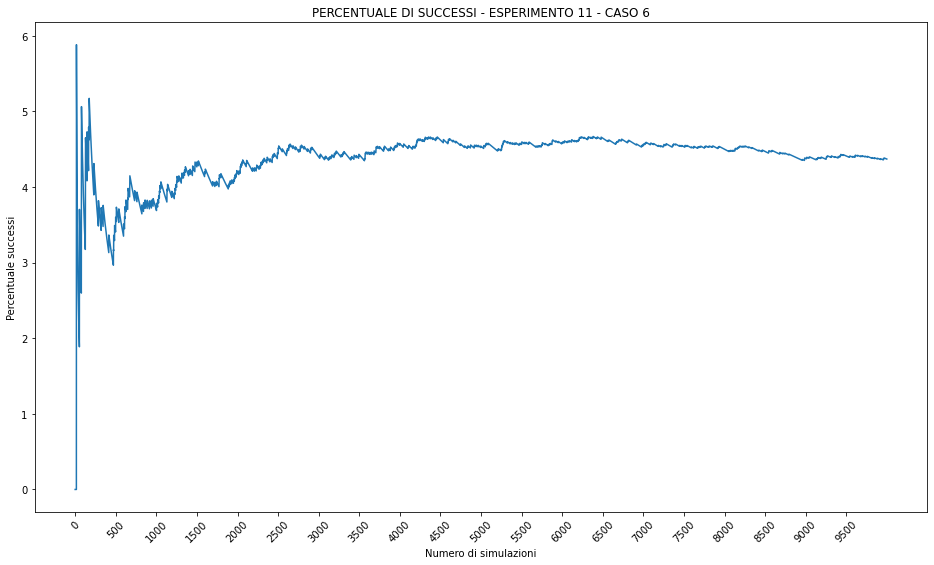

In [130]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 6")

##### Caso 7
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente un Tris, Luca deve solo evitare le combinazioni di carte migliori (come il Poker). <br>
Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [131]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ7 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ7 += 1
    results.append(100*succ7/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ7/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 62.67 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

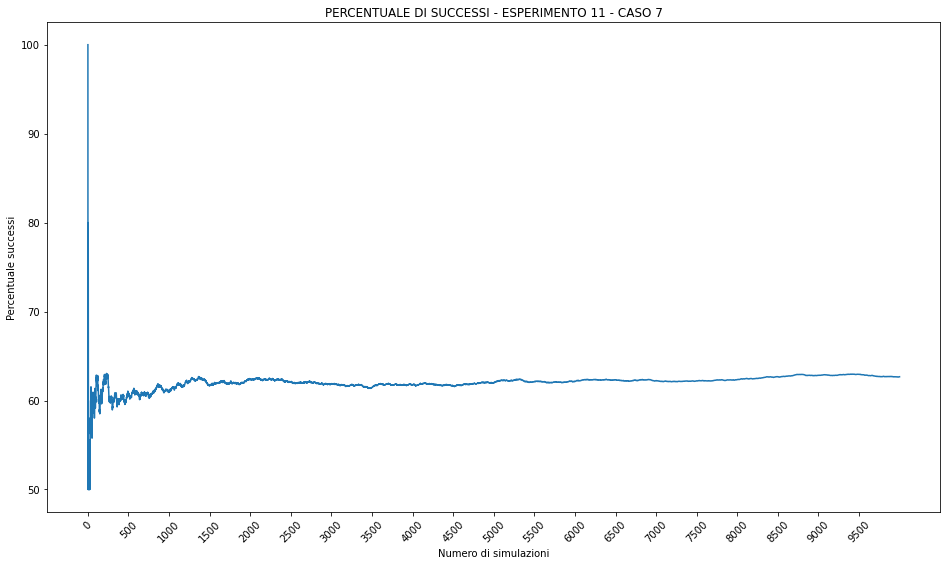

In [132]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 7")

##### Caso 8
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori uguali a una delle 2 carte a disposizione per Luca che non compongono il tris. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il cinque di picche, il cinque di fiori, il cinque di cuori, il due di cuori, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [133]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('5P')
pack.remove('5F')
pack.remove('5C')
pack.remove('2C')
pack.remove('2Q')
pack.remove('2F')

succ8 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] == 1:
        succ8 += 1
    results.append(100*succ8/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('5P')
pack.append('5F')
pack.append('5C')
pack.append('2C')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Tris =", 100*succ8/SIMUL, "%")

Probabilità di ottenere esattamente un Tris = 87.67 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

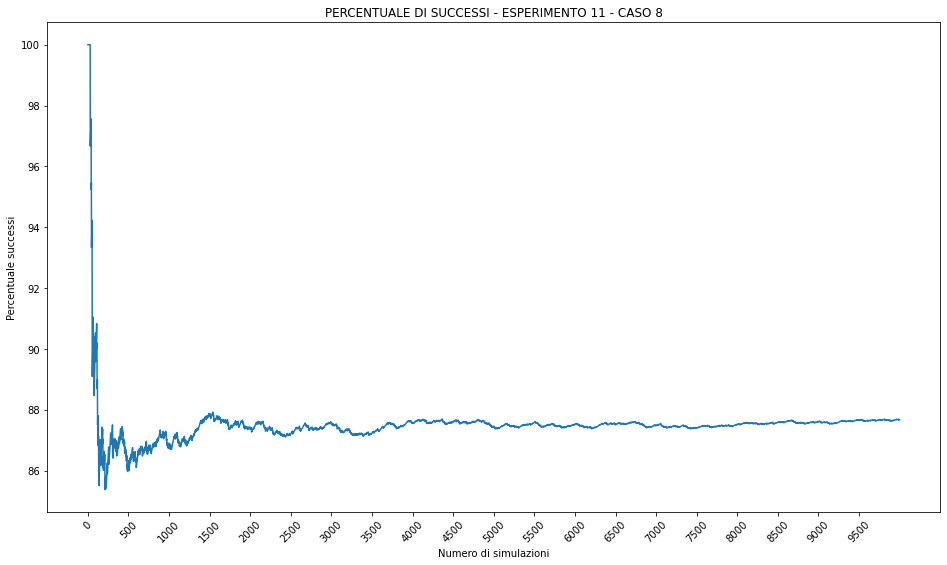

In [134]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 11 - CASO 8")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Tris. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Tris nei casi che abbiamo analizzato:

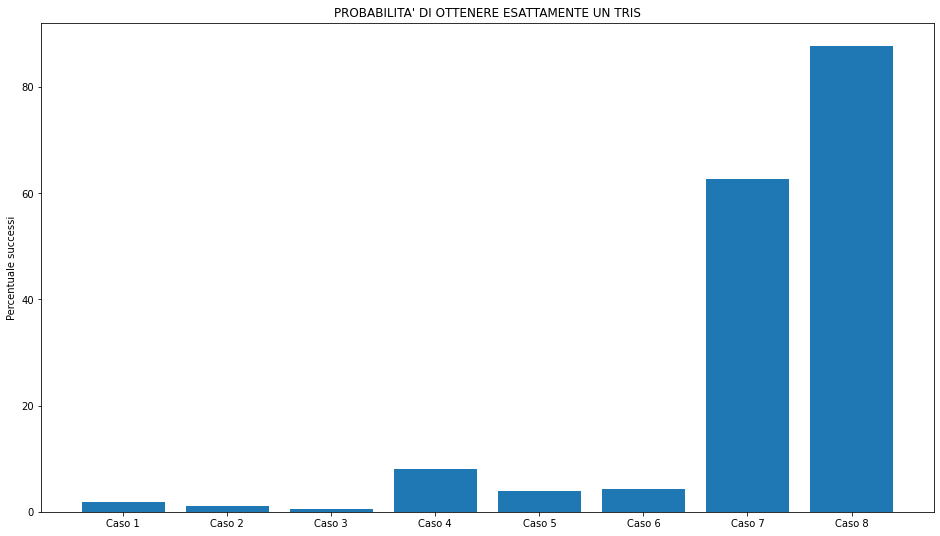

In [135]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6", "Caso 7", "Caso 8"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL, 100*succ7/SIMUL, 100*succ8/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN TRIS")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca hanno tutte valori differenti tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 4</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore x, una carta con valore y e le restanti carte con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore x, due carte con valore y, una carta con valore z, una carta con valore w e solo una carta con valore differente.</li>
    <li><b>Caso 7</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 8</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori uguali a una delle 2 carte a disposizione per Luca che non compongono il tris.</li>  
</ul>

#### Esperimento 12
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Scala al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca siano tali che non sarà possibile che più di 3 carte tra queste appartengano all'eventuale Scala. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori diversi da quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il dieci di cuori, il tre di cuori, il tre di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [136]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', '8P', '7F', '5Q', '2P']

pack.remove('KP')
pack.remove('QQ')
pack.remove('TC')
pack.remove('3C')
pack.remove('3Q')
pack.remove('2F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ1 +=1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('QQ')
pack.append('TC')
pack.append('3C')
pack.append('3Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 3.97 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

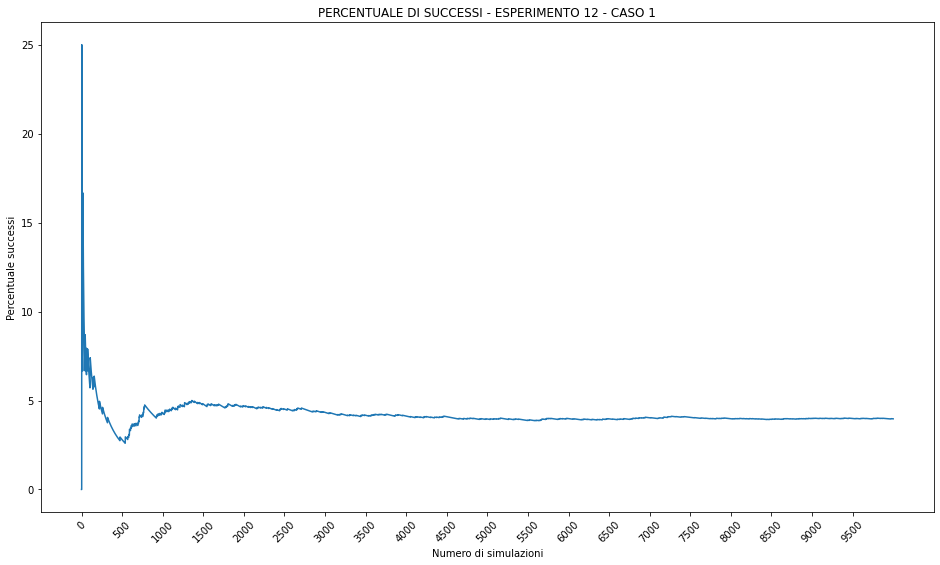

In [137]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca siano tali che non sarà possibile che più di 3 carte tra queste appartengano all'eventuale Scala. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente da quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il nove di cuori, il sei di cuori, il quattro di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [138]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', '8P', '7F', '5Q', '2P']

pack.remove('KP')
pack.remove('QQ')
pack.remove('9C')
pack.remove('6C')
pack.remove('4F')
pack.remove('2F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ2 +=1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('QQ')
pack.append('9C')
pack.append('6C')
pack.append('4F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 2.08 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

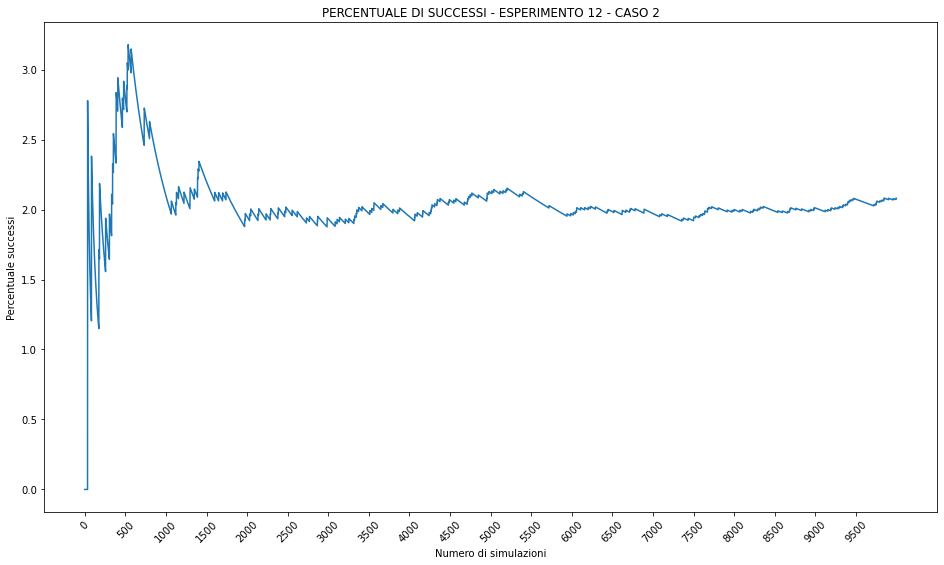

In [139]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca siano tali che non sarà possibile che più di 3 carte tra queste appartengano all'eventuale Scala. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori compresi tra quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il nove di picche, la nove di quadri, il sei di quadri, il sei di cuori, il quattro di picche e il quattro di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [140]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', '8P', '7F', '5Q', '2P']

pack.remove('9P')
pack.remove('9Q')
pack.remove('6Q')
pack.remove('6C')
pack.remove('4P')
pack.remove('4F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ3 +=1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('5Q')
pack.append('2P')

pack.append('9P')
pack.append('9Q')
pack.append('6Q')
pack.append('6C')
pack.append('4P')
pack.append('4F')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 1.08 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

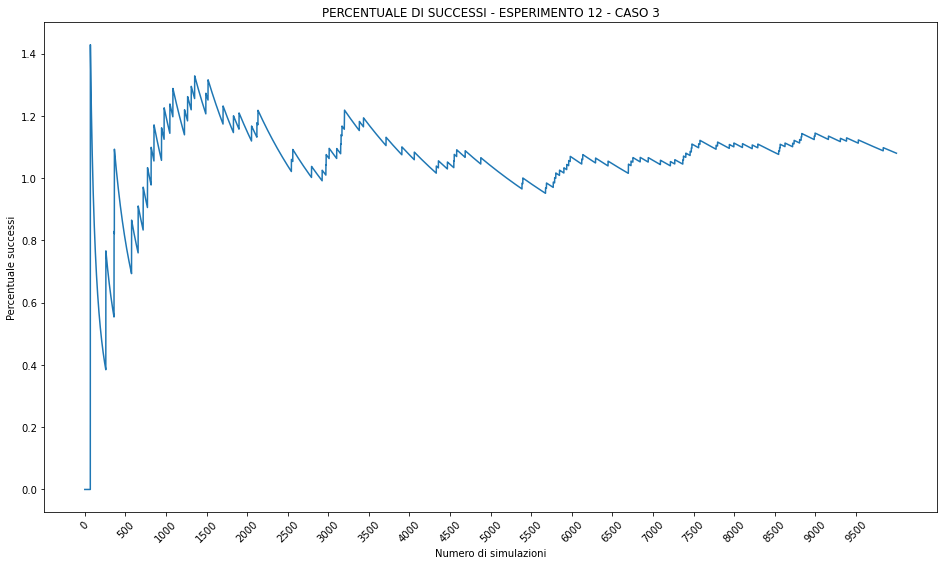

In [141]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note di Luca siano tali che 4 di esse potranno potenzialmente appartenere alla Scala. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori diversi da quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il sei di picche e il cinque di quadri, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il dieci di cuori, il tre di cuori, il tre di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [142]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('6P')
pack.remove('5Q')

init = ['AC', '8P', '7F', '6P', '5Q']

pack.remove('KP')
pack.remove('QQ')
pack.remove('TC')
pack.remove('3C')
pack.remove('3Q')
pack.remove('2F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ4 +=1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('6P')
pack.append('5Q')

pack.append('KP')
pack.append('QQ')
pack.append('TC')
pack.append('3C')
pack.append('3Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 35.25 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

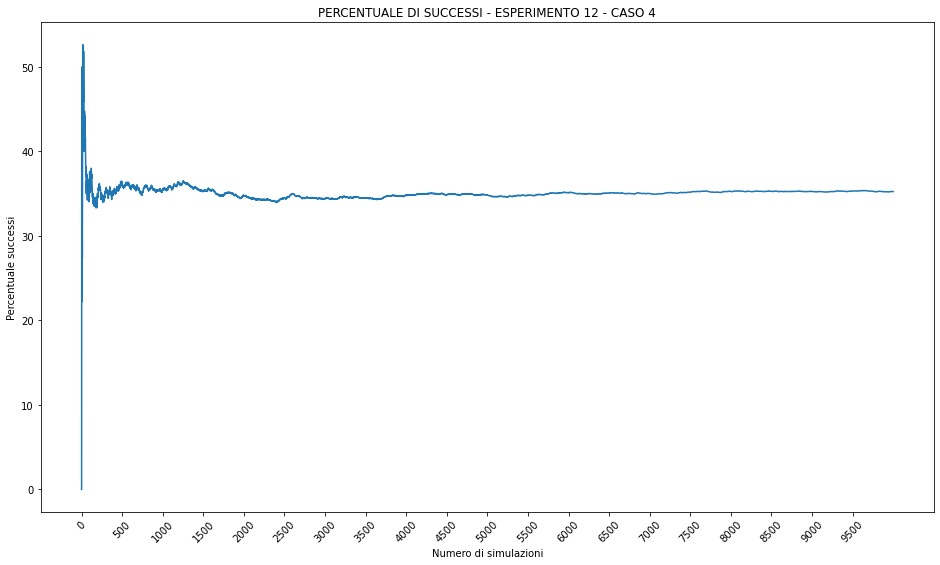

In [143]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note di Luca siano tali che 4 di esse potranno potenzialmente appartenere alla Scala. Supponiamo inoltre che ciascuno degli avversari di Luca abbia in mano una carta con uno stesso valore e una carta con un valore differente da quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il sei di picche e il cinque di quadri, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il nove di cuori, il quattro di cuori, il quattro di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [144]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('6P')
pack.remove('5Q')

init = ['AC', '8P', '7F', '6P', '5Q']

pack.remove('KP')
pack.remove('QQ')
pack.remove('9C')
pack.remove('4C')
pack.remove('4F')
pack.remove('2F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ5 +=1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('6P')
pack.append('5Q')

pack.append('KP')
pack.append('QQ')
pack.append('9C')
pack.append('4C')
pack.append('4F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 22.96 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

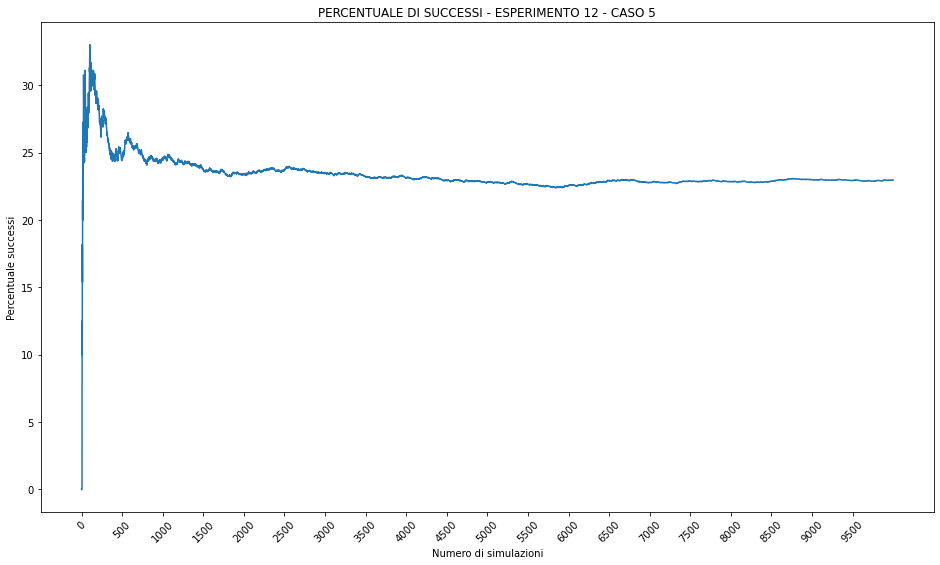

In [145]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note di Luca siano tali che 4 di esse potranno potenzialmente appartenere alla Scala. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori compresi tra quelli che possono essere coinvolti nella Scala di cui sopra. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'otto di picche, il sette di fiori, il sei di picche e il cinque di quadri, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il nove di picche, il nove di quadri, il nove di cuori, il quattro di cuori, il quattro di fiori e il quattro di picche, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [146]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('6P')
pack.remove('5Q')

init = ['AC', '8P', '7F', '6P', '5Q']

pack.remove('9P')
pack.remove('9Q')
pack.remove('9C')
pack.remove('4C')
pack.remove('4F')
pack.remove('4P')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_straight(hand) == True:
        succ6 +=1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('6P')
pack.append('5Q')

pack.append('9P')
pack.append('9Q')
pack.append('9C')
pack.append('4C')
pack.append('4F')
pack.append('4P')
        
print("Probabilità di ottenere esattamente una Scala =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente una Scala = 9.94 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

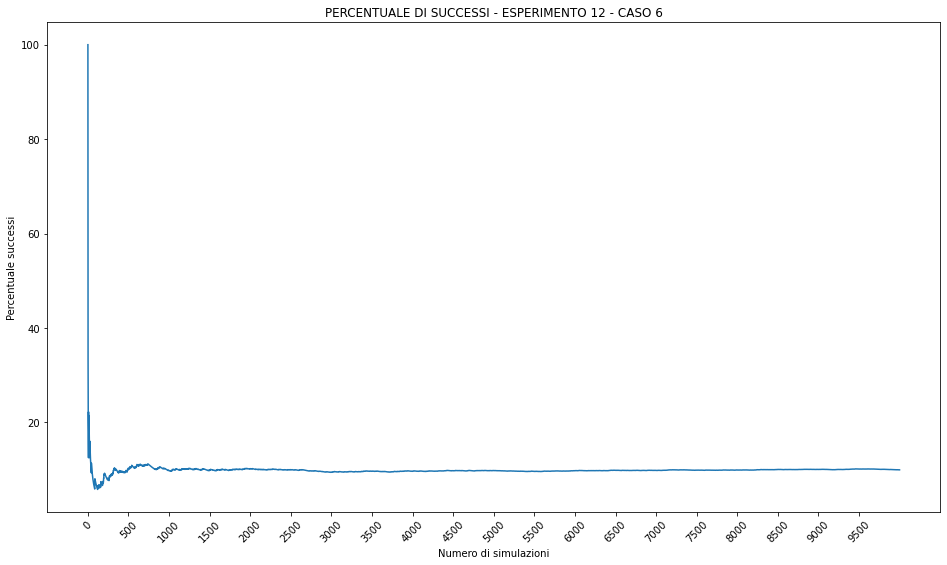

In [147]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 12 - CASO 6")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Scala. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Scala nei casi che abbiamo analizzato:

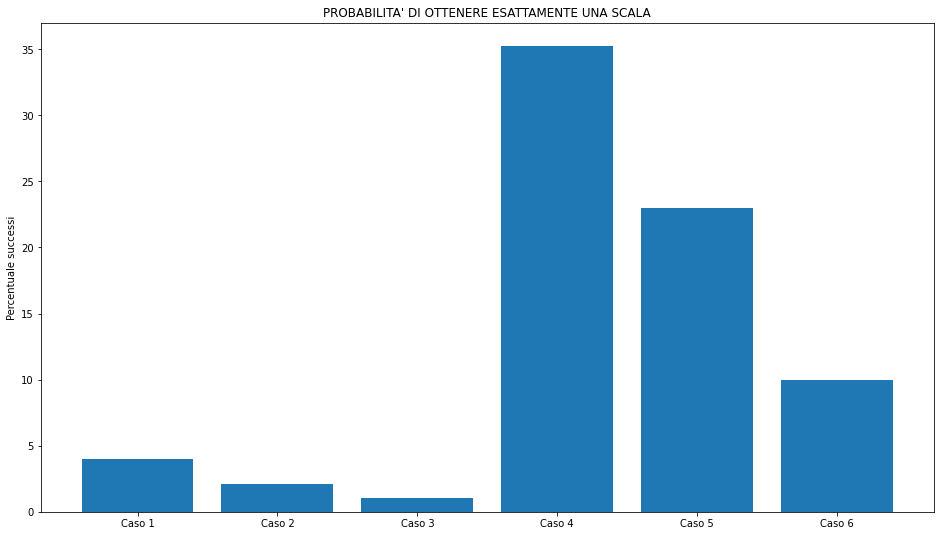

In [148]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA SCALA")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca sono tali che non è possibile che più di 3 carte tra queste appartengano all'eventuale Scala, ed Elisa, Sara e Andrea hanno in mano solo carte con valori diversi da quelli che possono essere coinvolti nella Scala.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca sono tali che non è possibile che più di 3 carte tra queste appartengano all'eventuale Scala, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente da quelli che possono essere coinvolti nella Scala.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca sono tali che non è possibile che più di 3 carte tra queste appartengano all'eventuale Scala, ed Elisa, Sara e Andrea hanno in mano solo carte con valori compresi tra quelli che possono essere coinvolti nella Scala.</li>
    <li><b>Caso 4</b> = le 5 carte note di Luca sono tali che 4 di esse possono potenzialmente appartenere alla Scala, ed Elisa, Sara e Andrea hanno in mano solo carte con valori diversi da quelli che possono essere coinvolti nella Scala.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca sono tali che 4 di esse possono potenzialmente appartenere alla Scala, e ciascuno degli avversari di Luca ha in mano una carta con uno stesso valore e una carta con un valore differente da quelli che possono essere coinvolti nella Scala.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca sono tali che 4 di esse possono potenzialmente appartenere alla Scala, ed Elisa, Sara e Andrea hanno in mano solo carte con valori compresi tra quelli che possono essere coinvolti nella Scala.</li>
</ul>

#### Esperimento 13
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Colore al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca siano di 3 semi differenti, in modo tale che 3 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con un seme diverso da X. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di fiori, il nove di quadri, il nove di cuori, il cinque di cuori, il quattro di fiori e il due di cuori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [149]:
pack.remove('AC')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JP', '8P', '5Q', '2P']

pack.remove('KF')
pack.remove('9Q')
pack.remove('9C')
pack.remove('5C')
pack.remove('4F')
pack.remove('2C')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KF')
pack.append('9Q')
pack.append('9C')
pack.append('5C')
pack.append('4F')
pack.append('2C')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 5.55 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

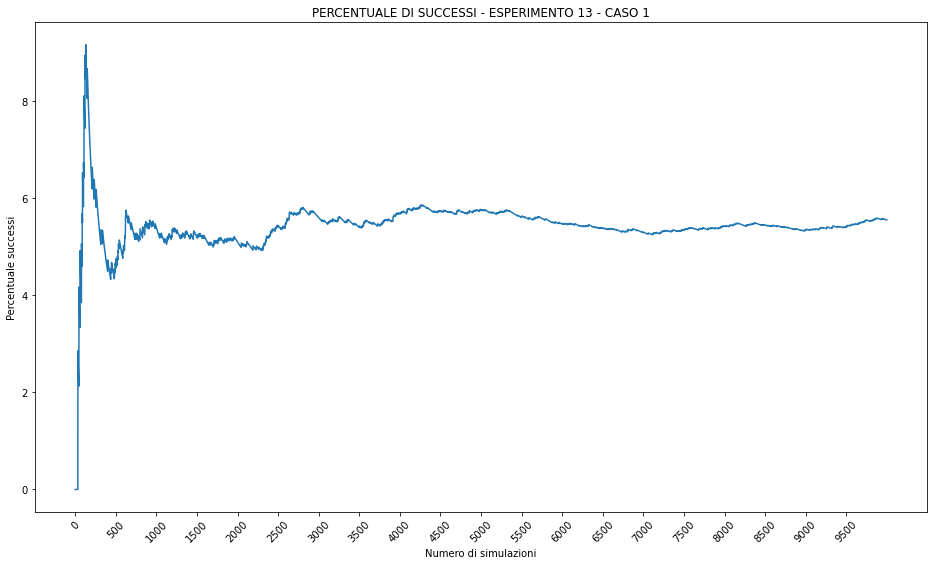

In [150]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca siano di 3 semi differenti, in modo tale che 3 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che gli avversari di Luca abbiano complessivamente in mano 3 carte del seme X e 3 carte di un seme differente. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, il nove di picche, il nove di cuori, il cinque di cuori, il quattro di picche e il due di cuori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [151]:
pack.remove('AC')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JP', '8P', '5Q', '2P']

pack.remove('KP')
pack.remove('9P')
pack.remove('9C')
pack.remove('5C')
pack.remove('4P')
pack.remove('2C')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('9P')
pack.append('9C')
pack.append('5C')
pack.append('4P')
pack.append('2C')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 2.52 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

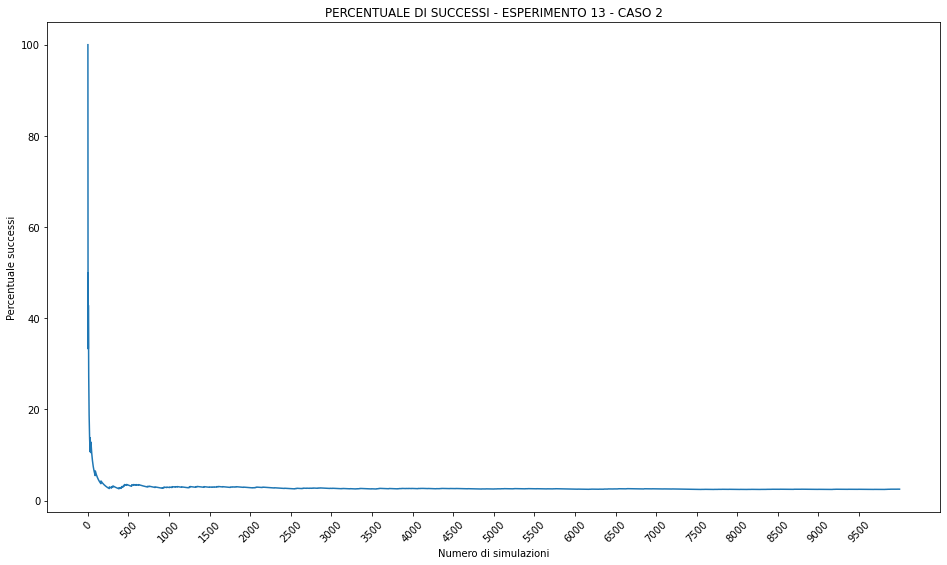

In [152]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca siano di 3 semi differenti, in modo tale che 3 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte del seme X. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, il nove di picche, il sette di picche, il cinque di picche, il quattro di picche e il tre di picche, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [153]:
pack.remove('AC')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'JP', '8P', '5Q', '2P']

pack.remove('KP')
pack.remove('9P')
pack.remove('7P')
pack.remove('5P')
pack.remove('4P')
pack.remove('3P')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('9P')
pack.append('7P')
pack.append('5P')
pack.append('4P')
pack.append('3P')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 0.69 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

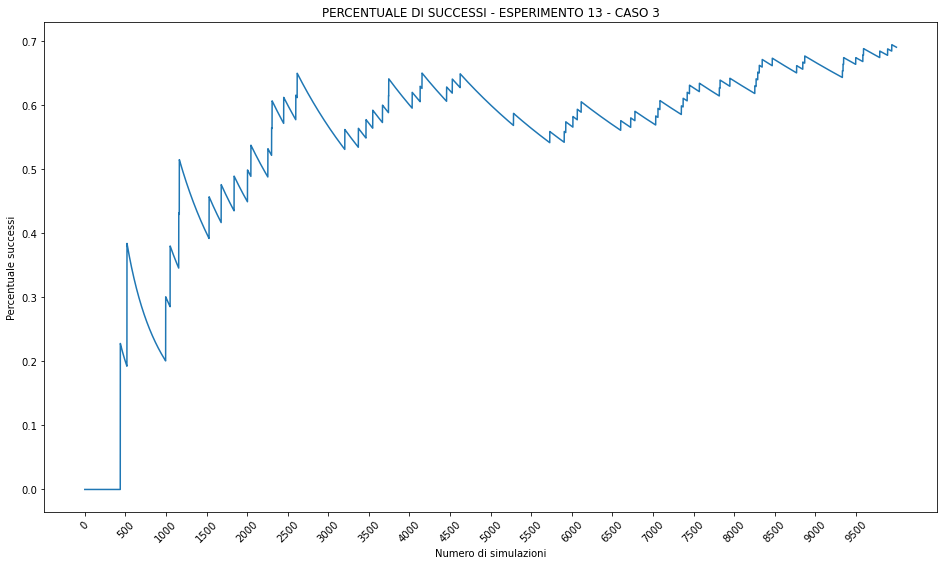

In [154]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note di Luca siano di 2 semi differenti, in modo tale che 4 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte un seme diverso da X. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di picche, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di fiori, il nove di quadri, il nove di cuori, il cinque di cuori, il quattro di fiori e il due di cuori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [155]:
pack.remove('AP')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AP', 'JP', '8P', '5Q', '2P']

pack.remove('KF')
pack.remove('9Q')
pack.remove('9C')
pack.remove('5C')
pack.remove('4F')
pack.remove('2C')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AP')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KF')
pack.append('9Q')
pack.append('9C')
pack.append('5C')
pack.append('4F')
pack.append('2C')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 39.73 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

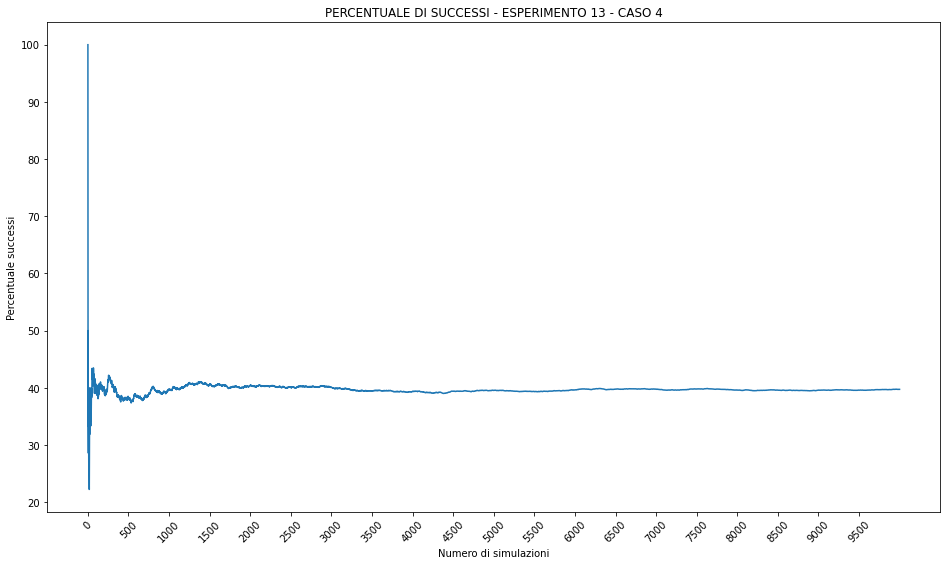

In [156]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note di Luca siano di 2 semi differenti, in modo tale che 4 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che gli avversari di Luca abbiano complessivamente in mano 3 carte del seme X e 3 carte di un seme differente. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di picche, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, il nove di picche, il nove di cuori, il cinque di cuori, il quattro di picche e il due di cuori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [157]:
pack.remove('AP')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AP', 'JP', '8P', '5Q', '2P']

pack.remove('KP')
pack.remove('9P')
pack.remove('9C')
pack.remove('5C')
pack.remove('4P')
pack.remove('2C')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AP')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('9P')
pack.append('9C')
pack.append('5C')
pack.append('4P')
pack.append('2C')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 27.4 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

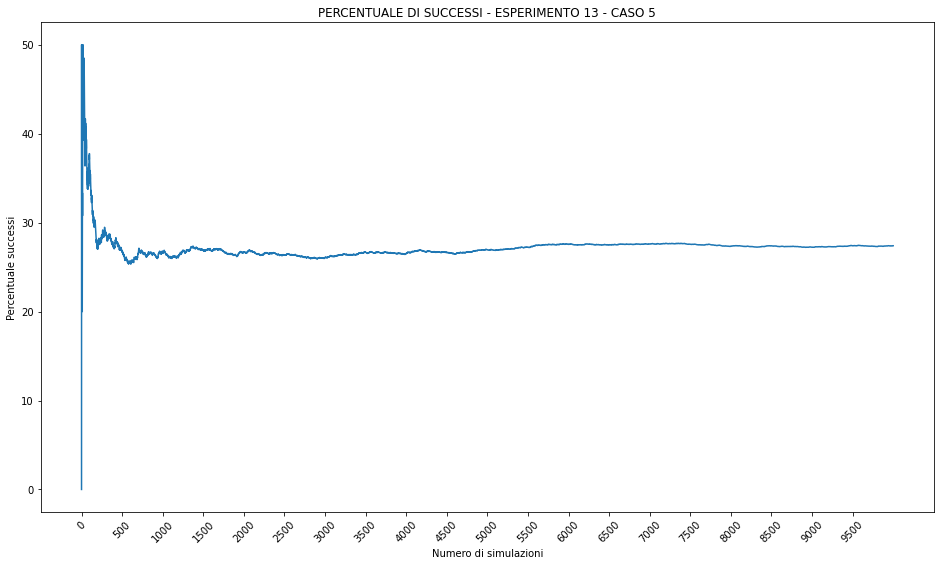

In [158]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note di Luca siano di 2 semi differenti, in modo tale che 4 di queste carte abbiano lo stesso seme X. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte del seme X. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di picche, il jack di picche, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, il nove di picche, il sette di picche, il cinque di picche, il quattro di picche e il tre di picche, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [159]:
pack.remove('AP')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AP', 'JP', '8P', '5Q', '2P']

pack.remove('KP')
pack.remove('9P')
pack.remove('7P')
pack.remove('5P')
pack.remove('4P')
pack.remove('3P')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if rets[0] >= 5:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AP')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('9P')
pack.append('7P')
pack.append('5P')
pack.append('4P')
pack.append('3P')
        
print("Probabilità di ottenere esattamente un Colore =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente un Colore = 14.26 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

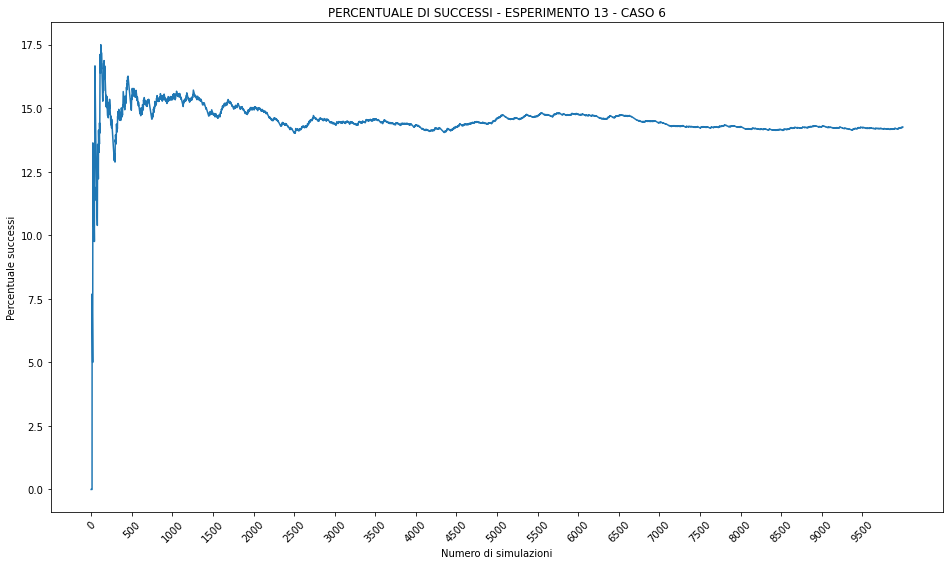

In [160]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 13 - CASO 6")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Colore. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Colore nei casi che abbiamo analizzato:

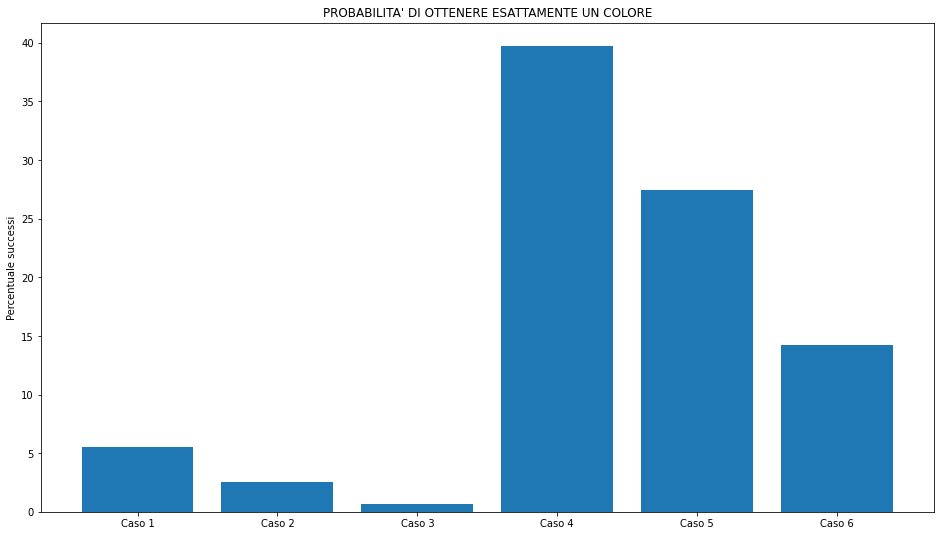

In [161]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN COLORE")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca sono di 3 semi differenti, in modo tale che 3 di queste carte hanno lo stesso seme X, ed Elisa, Sara e Andrea hanno in mano solo carte con un seme diverso da X.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca sono di 3 semi differenti, in modo tale che 3 di queste carte hanno lo stesso seme X, e gli avversari di Luca hanno complessivamente in mano 3 carte del seme X e 3 carte di un seme differente.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca sono di 3 semi differenti, in modo tale che 3 di queste carte hanno lo stesso seme X, ed Elisa, Sara e Andrea hanno in mano solo carte del seme X.</li>
    <li><b>Caso 4</b> = le 5 carte note di Luca sono di 2 semi differenti, in modo tale che 4 di queste carte hanno lo stesso seme X, ed Elisa, Sara e Andrea hanno in mano solo carte con un seme diverso da X.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca sono di 2 semi differenti, in modo tale che 4 di queste carte hanno lo stesso seme X, e gli avversari di Luca hanno complessivamente in mano 3 carte del seme X e 3 carte di un seme differente.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca sono di 2 semi differenti, in modo tale che 4 di queste carte hanno lo stesso seme X, ed Elisa, Sara e Andrea hanno in mano solo carte del seme X.</li>
</ul>

#### Esperimento 14
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Full al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [162]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 3.19 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

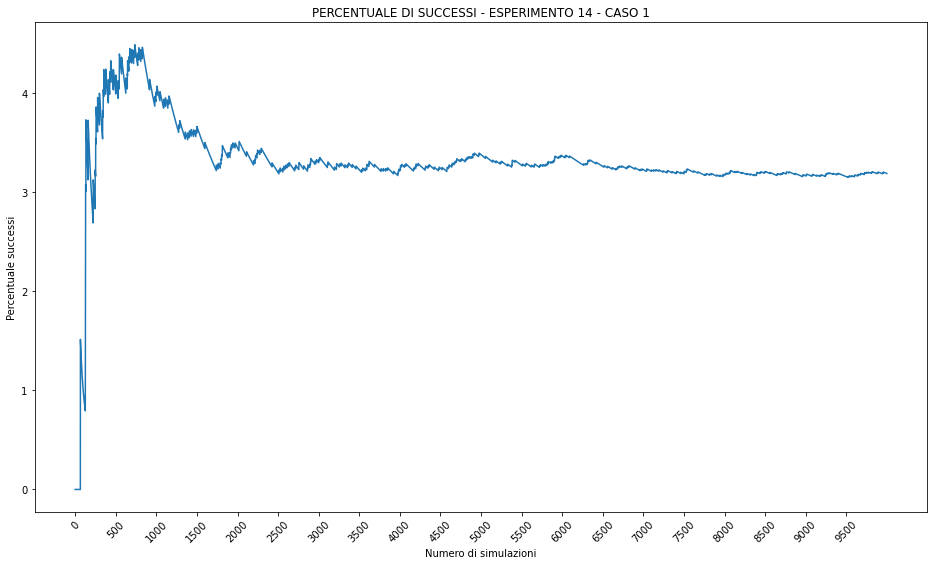

In [163]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore x, una carta con valore y e le restanti carte con un valore differente dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il jack di cuori, l'otto di cuori, il sette di picche, il quattro di fiori e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [164]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('JC')
pack.remove('8C')
pack.remove('7P')
pack.remove('4F')
pack.remove('3F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('JC')
pack.append('8C')
pack.append('7P')
pack.append('4F')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 1.76 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

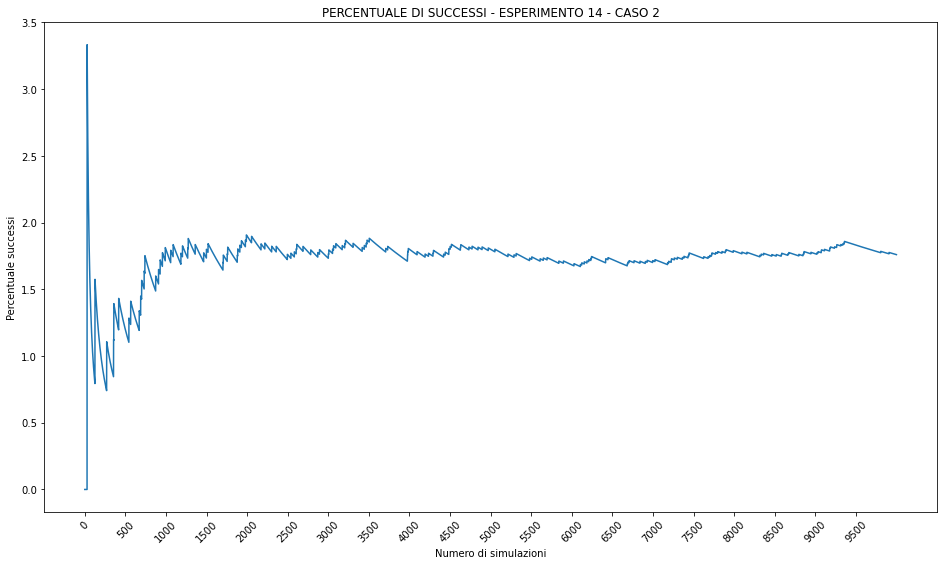

In [165]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore x, due carte con valore y, una carta con valore z, una carta con valore w e solo una carta con valore differente. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, l'otto di fiori, l'otto di cuori, il sette di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [166]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('8F')
pack.remove('8C')
pack.remove('7P')
pack.remove('5F')
pack.remove('2F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('8F')
pack.append('8C')
pack.append('7P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 0.73 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

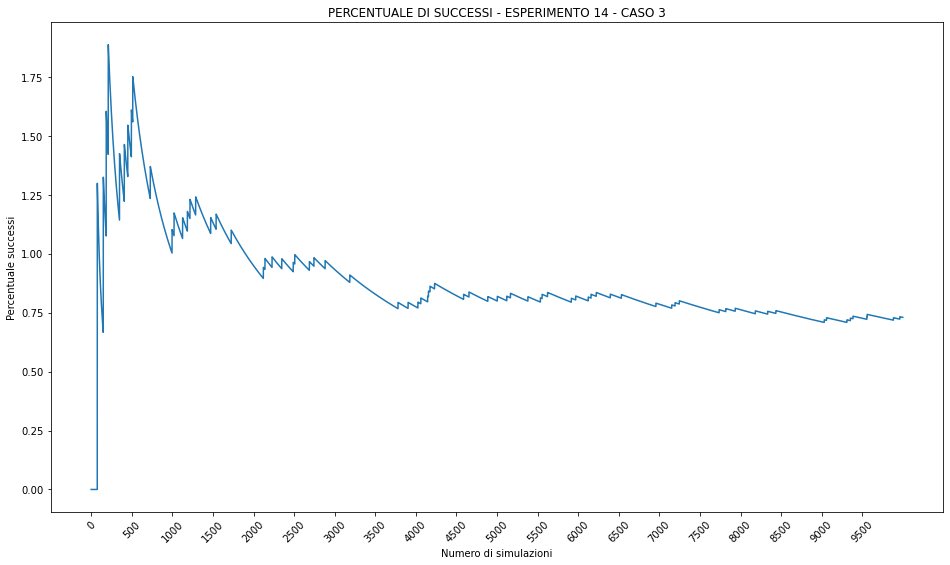

In [167]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note di Luca contengano due coppie di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [168]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 18.77 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

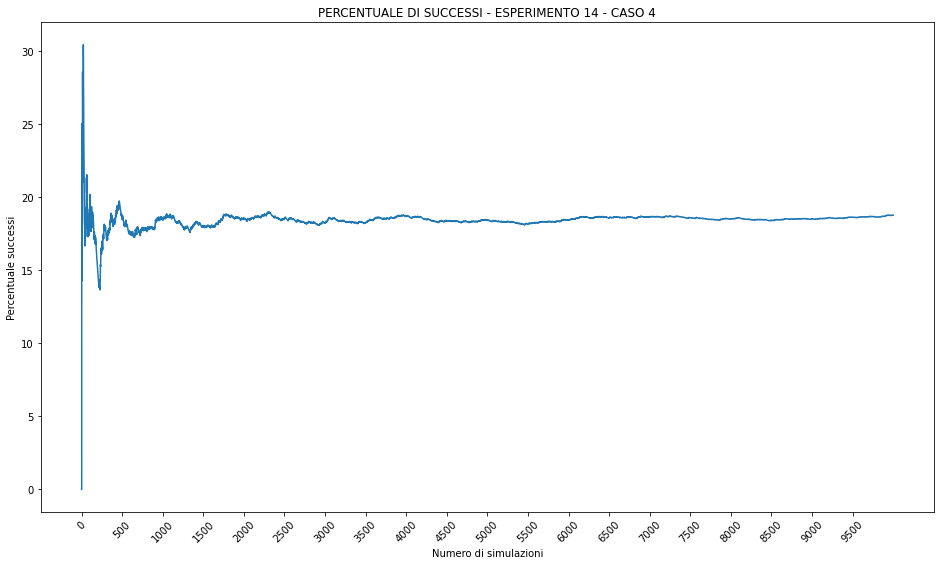

In [169]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note di Luca contengano due coppie di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, y, z). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore x, una con valore y e le restanti con valori differenti. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [170]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('AQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('2F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('AQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 10.06 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

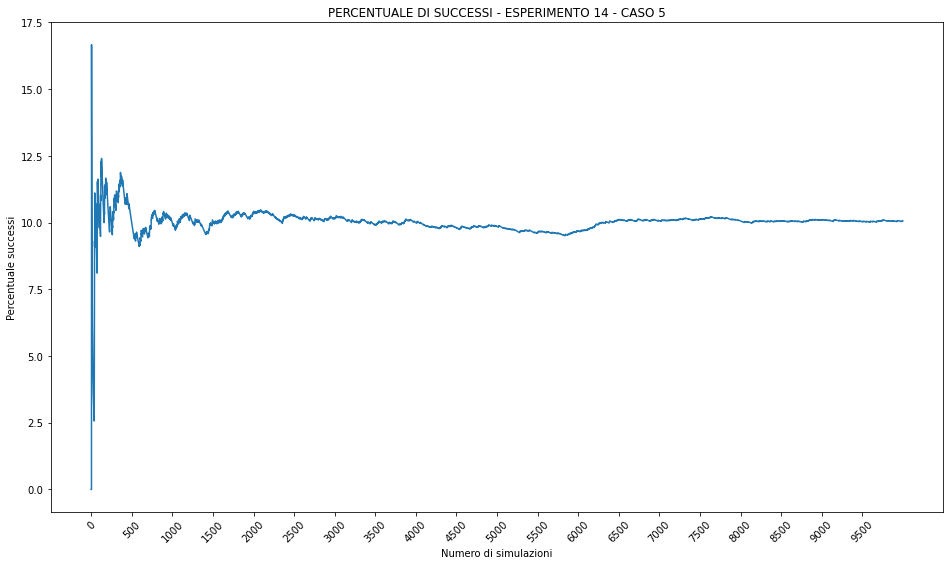

In [171]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [172]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 32.04 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

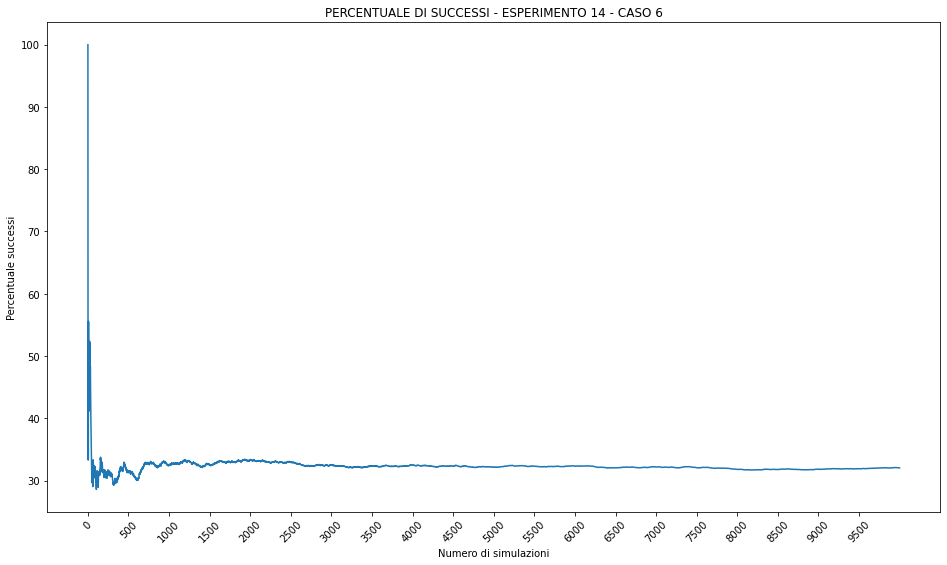

In [173]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 6")

##### Caso 7
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, x, y, z). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano una carta con valore y, una con valore z e le restanti con valori differenti. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il cinque di fiori e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [174]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('5F')
pack.remove('2F')

succ7 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ7 += 1
    results.append(100*succ7/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('5F')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ7/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 23.88 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

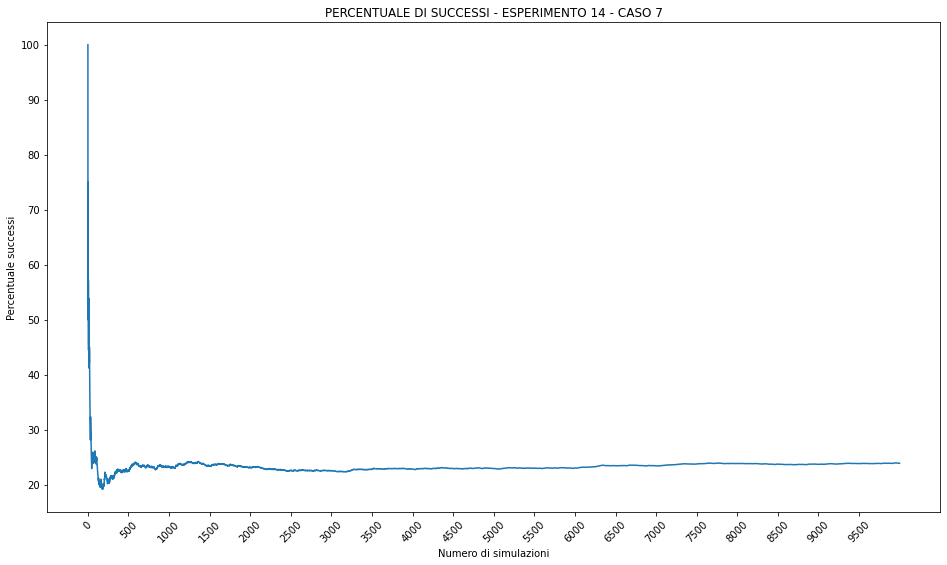

In [175]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 7")

##### Caso 8
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, x, y, z). Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano 2 carte con valore y, 2 con valore z e le restanti con valori differenti. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il cinque di cuori, il cinque di picche, il due di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [176]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('5C')
pack.remove('5P')
pack.remove('2Q')
pack.remove('2F')

succ8 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ8 += 1
    results.append(100*succ8/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('5C')
pack.append('5P')
pack.append('2Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ8/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 16.49 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

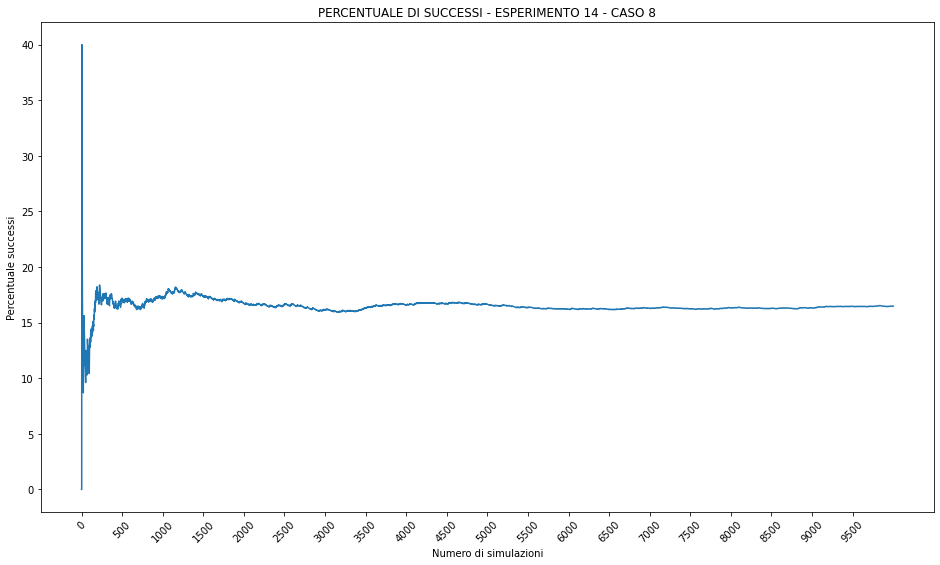

In [177]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 8")

##### Caso 9
Supponiamo che le 5 carte note di Luca contengano un tris e una coppia di valori uguali tra loro. Notiamo che, stavolta, per ottenere esattamente un Full, Luca deve solo evitare le combinazioni di carte migliori (come il Poker). <br>
Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [178]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ9 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ9 += 1
    results.append(100*succ9/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ9/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 95.09 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

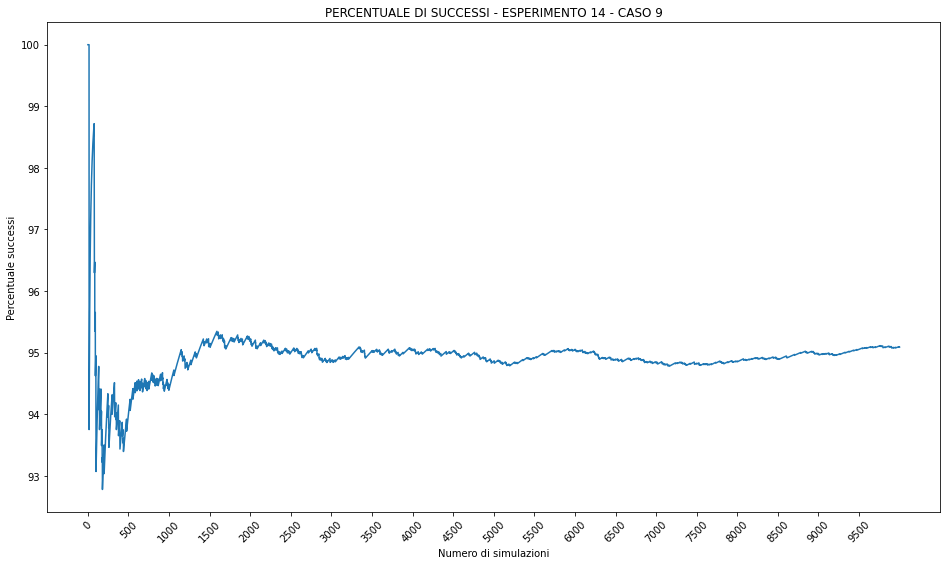

In [179]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 9")

##### Caso 10
Supponiamo che le 5 carte note di Luca contengano un tris e una coppia di valori uguali tra loro. Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano la carta con lo stesso valore di quelle che compongono il tris di Luca e 5 carte con valori differenti da quelle a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [180]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

pack.remove('AQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ10 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 3 and retv[1] >= 2:
        succ10 += 1
    results.append(100*succ10/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')

pack.append('AQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Full =", 100*succ10/SIMUL, "%")

Probabilità di ottenere esattamente un Full = 99.9 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

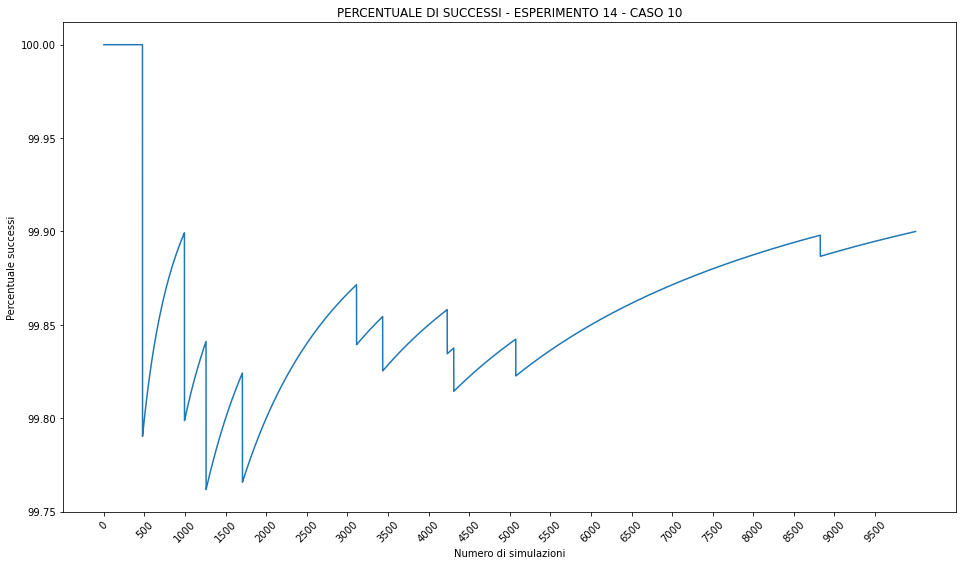

In [181]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 14 - CASO 10")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Full. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Full nei casi che abbiamo analizzato:

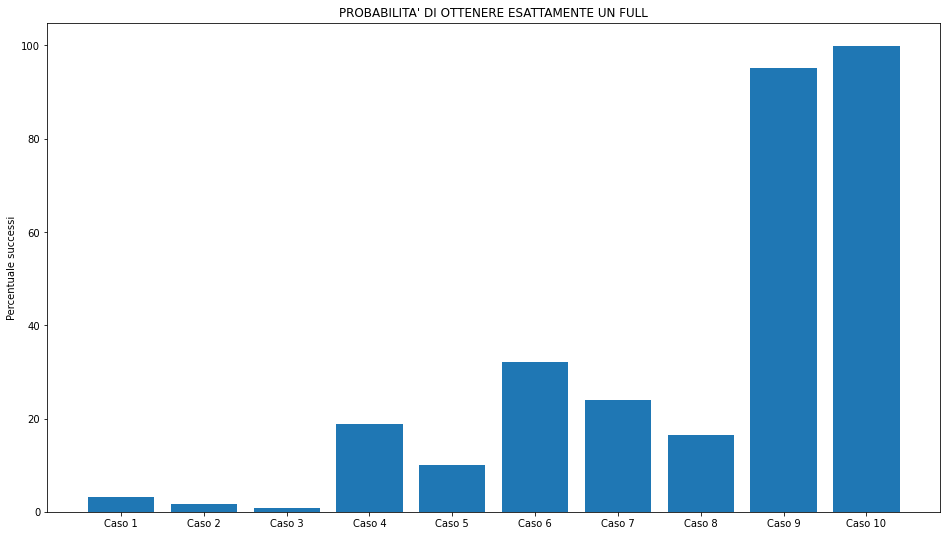

In [182]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6", "Caso 7", "Caso 8", "Caso 9", "Caso 10"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL, 100*succ7/SIMUL, 100*succ8/SIMUL, 100*succ9/SIMUL, 100*succ10/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN FULL")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore x, una con valore y e le restanti con un valore differente dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, z, w), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore x, due con valore y, una con valore z, una con valore w e solo una con un valore differente.</li>
    <li><b>Caso 4</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, y, y, z), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore x, una con valore y e le restanti con valori differenti.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 7</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, x, y, z), e gli avversari di Luca, complessivamente, hanno in mano una carta con valore y, una con valore z e le restanti con valori differenti.</li>
    <li><b>Caso 8</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro (per cui i valori delle 5 carte sono di tipo x, x, x, y, z), e gli avversari di Luca, complessivamente, hanno in mano 2 carte con valore y, 2 con valore z e le restanti con valori differenti.</li>
    <li><b>Caso 9</b> = le 5 carte note di Luca contengono un tris e una coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 10</b> = le 5 carte note di Luca contengono un tris e una coppia di valori uguali tra loro, e gli avversari di Luca, complessivamente, hanno in mano la carta con lo stesso valore di quelle che compongono il Tris di Luca e 5 carte con valori differenti da quelle a disposizione per Luca.</li>
</ul>

#### Esperimento 15
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga un Poker al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano.

##### Caso 1
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti da quello che compone la coppia di Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [183]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.11 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

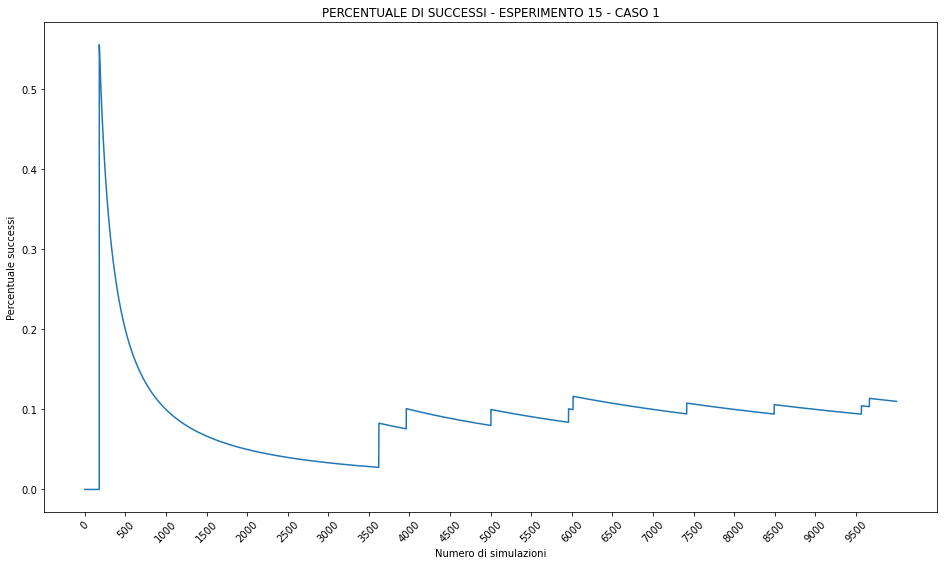

In [184]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note di Luca contengano una sola coppia di valori uguali tra loro. Supponiamo inoltre che uno tra Elisa, Sara e Andrea abbia in mano una carta con valore pari a quello che compone la coppia di Luca. In tal modo, è possibile già da ora intuire che Luca non potrà in alcun modo ottenere un Poker. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [185]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '5Q', '2P']

pack.remove('AQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')

pack.append('AQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

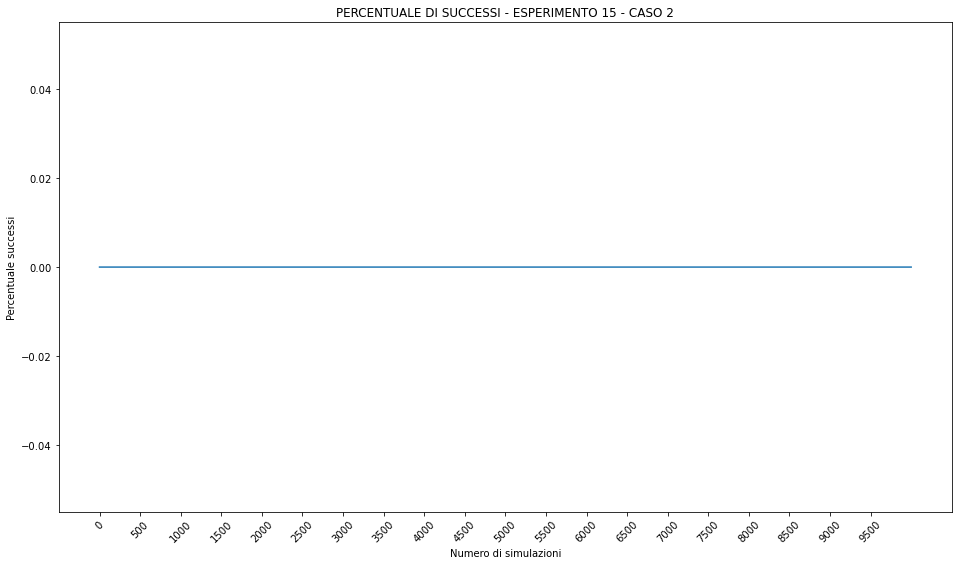

In [186]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note di Luca contengano due coppie di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti da quelli che compongono le due coppie di Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [187]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.32 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

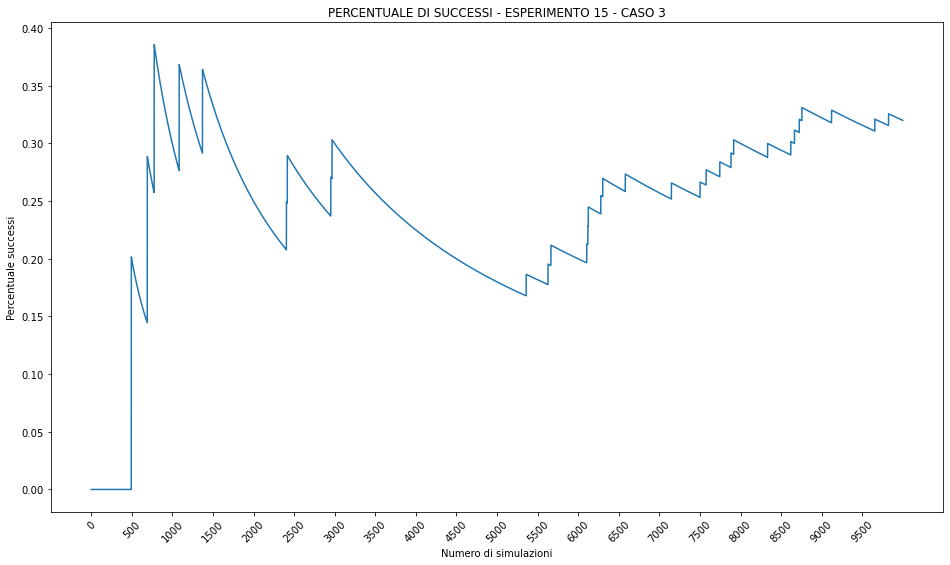

In [188]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 3")

##### Caso 4
Supponiamo che le 5 carte note di Luca contengano due coppie di valori uguali tra loro. Supponiamo inoltre che uno tra Elisa, Sara e Andrea abbia in mano una carta con valore pari a quello che compone una delle due coppie di Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'otto di picche, il due di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [189]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

init = ['AC', 'AF', '8P', '2Q', '2P']

pack.remove('AQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ4 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')

pack.append('AQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ4/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.19 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

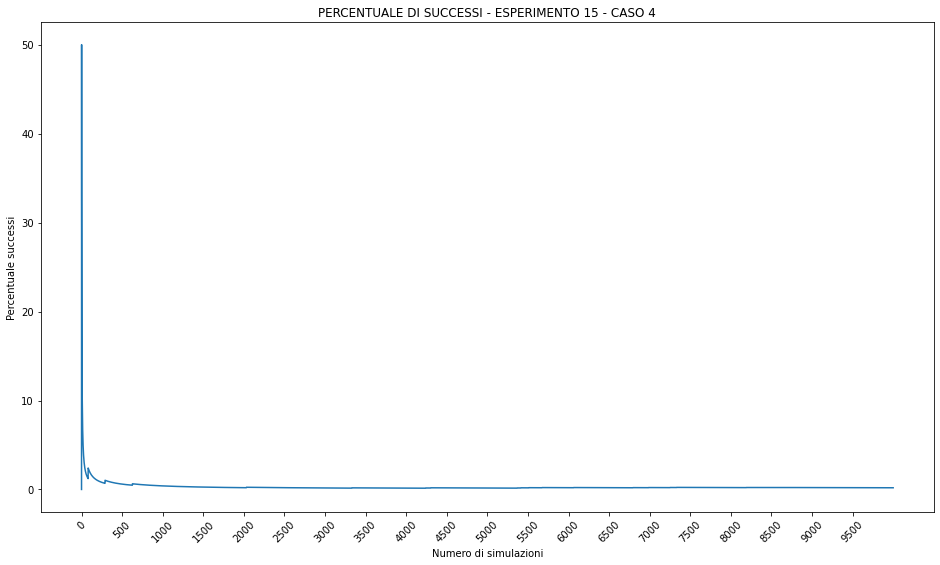

In [190]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 4")

##### Caso 5
Supponiamo che le 5 carte note di Luca contengano un tris di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti da quello che compone il tris di Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [191]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

init = ['AC', 'AF', 'AP', '5Q', '2P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ5 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ5/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 4.91 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

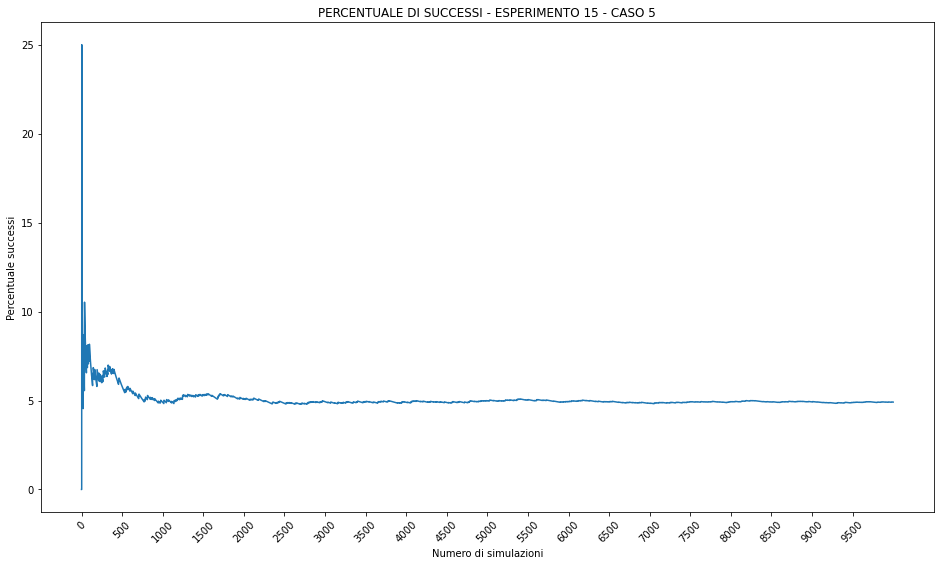

In [192]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 5")

##### Caso 6
Supponiamo che le 5 carte note di Luca contengano un tris e una coppia di valori uguali tra loro. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte con valori differenti dalle 5 carte note a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [193]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

pack.remove('KQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ6 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')

pack.append('KQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ6/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 4.94 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

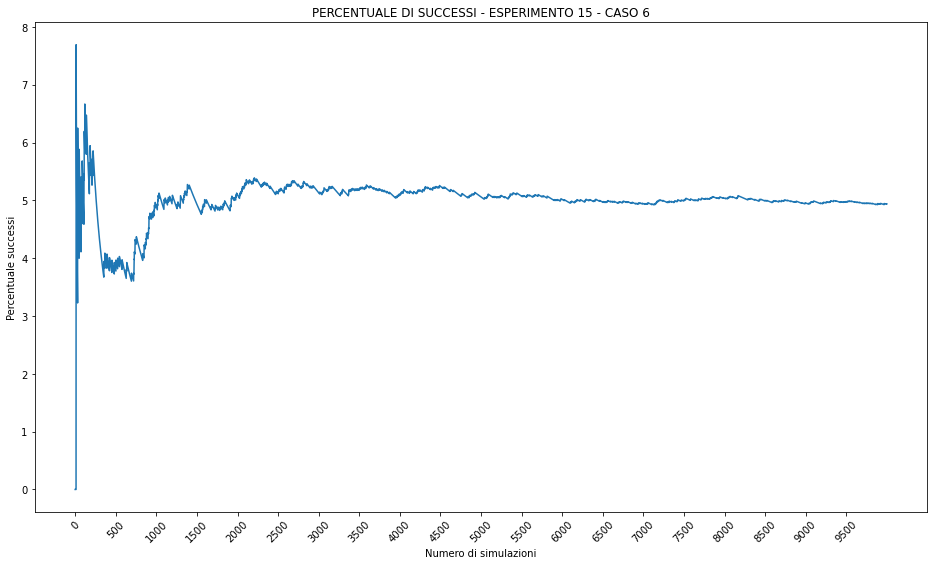

In [194]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 6")

##### Caso 7
Supponiamo che le 5 carte note di Luca contengano un tris e una coppia di valori uguali tra loro. Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano la carta con lo stesso valore di quelle che compongono il tris di Luca e 5 carte con valori differenti da quelle a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche l'asso di quadri, il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [195]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

pack.remove('AQ')
pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('3F')

succ7 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ7 += 1
    results.append(100*succ7/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')

pack.append('AQ')
pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ7/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 0.13 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

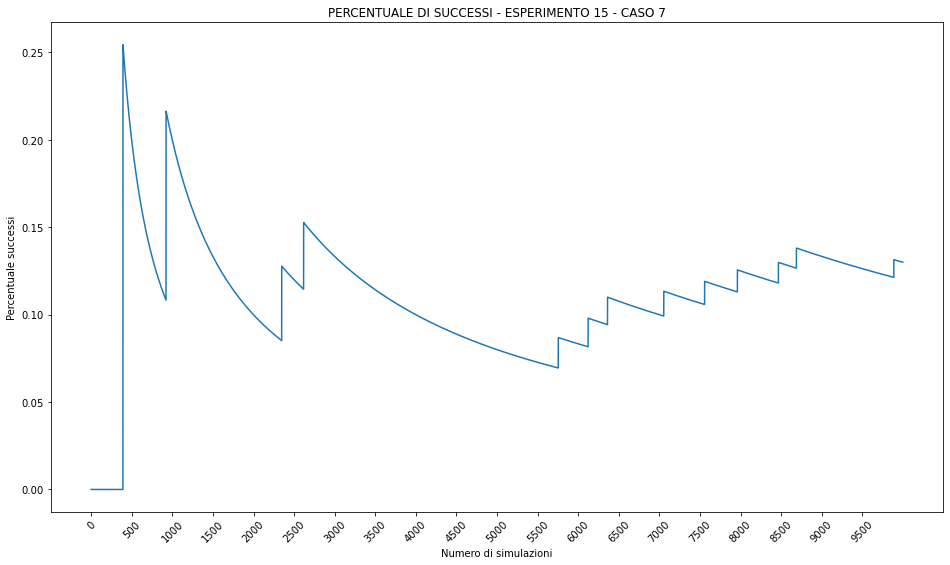

In [196]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 7")

##### Caso 8
Supponiamo che le 5 carte note di Luca contengano un tris e una coppia di valori uguali tra loro. Supponiamo inoltre che gli avversari di Luca, complessivamente, abbiano in mano la carta con lo stesso valore di quelle che compongono la coppia di Luca e 5 carte con valori differenti da quelle a disposizione per Luca. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di cuori, l'asso di fiori, l'asso di picche, il cinque di quadri e il cinque di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di cuori, il dieci di cuori, il nove di picche, il sei di quadri, il cinque di fiori e il tre di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [197]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('5P')

init = ['AC', 'AF', 'AP', '5Q', '5P']

pack.remove('KC')
pack.remove('TC')
pack.remove('9P')
pack.remove('6Q')
pack.remove('5F')
pack.remove('3F')

succ8 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    retv, rets = calculate_score(hand)
    if retv[0] == 4:
        succ8 += 1
    results.append(100*succ8/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('5P')

pack.append('KC')
pack.append('TC')
pack.append('9P')
pack.append('6Q')
pack.append('5F')
pack.append('3F')
        
print("Probabilità di ottenere esattamente un Poker =", 100*succ8/SIMUL, "%")

Probabilità di ottenere esattamente un Poker = 4.75 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

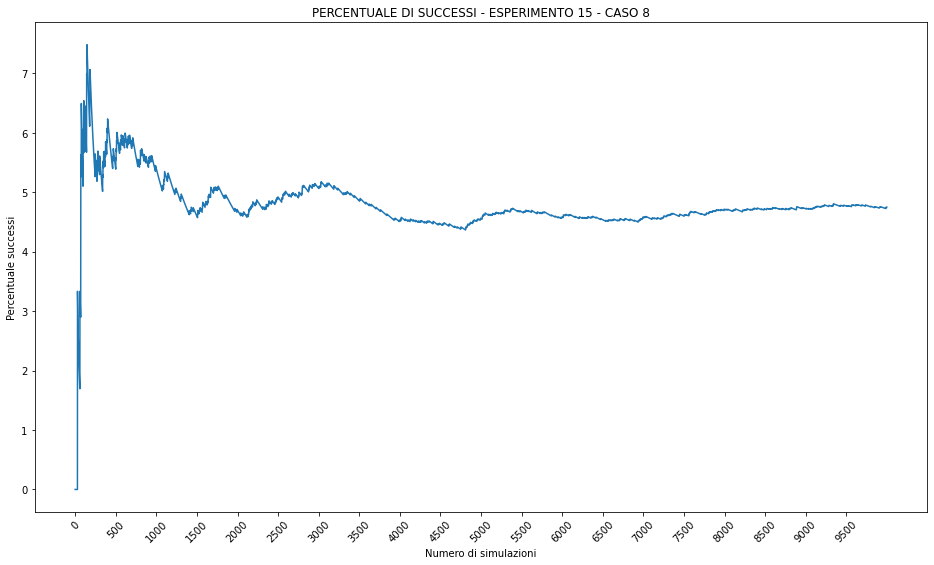

In [198]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 15 - CASO 8")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente un Poker. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere un Poker nei casi che abbiamo analizzato:

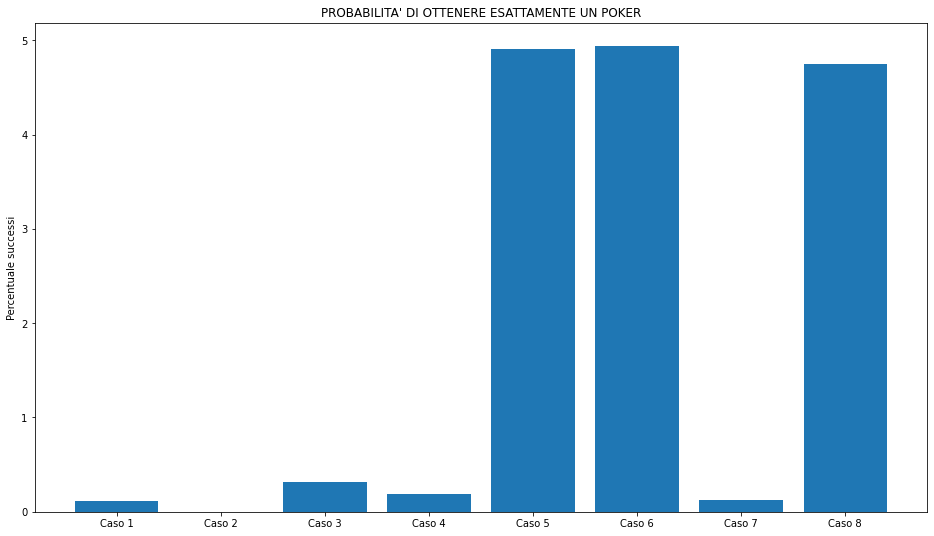

In [199]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6", "Caso 7", "Caso 8"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL, 100*succ7/SIMUL, 100*succ8/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UN POKER")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti da quello che compone la coppia di Luca.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca contengono una sola coppia di valori uguali tra loro, e uno tra Elisa, Sara e Andrea ha in mano una carta con valore pari a quello che compone la coppia di Luca.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti da quelli che compongono le due coppie di Luca.</li>
    <li><b>Caso 4</b> = le 5 carte note di Luca contengono due coppie di valori uguali tra loro, e uno tra Elisa, Sara e Andrea ha in mano una carta con valore pari a quello che compone una delle due coppie di Luca.</li>
    <li><b>Caso 5</b> = le 5 carte note di Luca contengono un tris di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti da quello che compone il tris di Luca.</li>
    <li><b>Caso 6</b> = le 5 carte note di Luca contengono un tris e una coppia di valori uguali tra loro, ed Elisa, Sara e Andrea hanno in mano solo carte con valori differenti dalle 5 carte a disposizione per Luca.</li>
    <li><b>Caso 7</b> = le 5 carte note di Luca contengono un tris e una coppia di valori uguali tra loro, e gli avversari di Luca, complessivamente, hanno in mano la carta con lo stesso valore di quelle che compongono il tris di Luca e 5 carte con valori differenti da quelle a disposizione per Luca.</li>
    <li><b>Caso 8</b> = le 5 carte note di Luca contengono un tris e una coppia di valori uguali tra loro, e gli avversari di Luca, complessivamente, hanno in mano la carta con lo stesso valore di quelle che compongono la coppia di Luca e 5 carte con valori differenti da quelle a disposizione per Luca.</li>    
</ul>

#### Esperimento 16
Rimanendo nella fase di Flop del gioco, stimiamo la probabilità che Luca ottenga una Scala Reale al variare delle carte scoperte sul tavolo, delle carte che lo stesso Luca ha in mano e delle carte che gli avversari hanno in mano (accorpiamo nuovamente l'analisi della Scala di Colore con l'analisi della Scala Reale poiché, dal punto di vista delle casistiche e delle probabilità, sono del tutto analoghe).

##### Caso 1
Supponiamo che le 5 carte note siano tali che 3 di loro potranno appartenere all'eventuale Scala Reale. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte diverse da quelle che possono essere coinvolte nella Scala Reale. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il jack di fiori, il dieci di fiori, il cinque di quadri e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il dieci di cuori, il tre di cuori, il tre di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [200]:
pack.remove('AF')
pack.remove('JF')
pack.remove('TF')
pack.remove('5Q')
pack.remove('2P')

init = ['AF', 'JF', 'TF', '5Q', '2P']

pack.remove('KP')
pack.remove('QQ')
pack.remove('TC')
pack.remove('3C')
pack.remove('3Q')
pack.remove('2F')

succ1 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ1 +=1
    results.append(100*succ1/(i+1))

pack.append('AF')
pack.append('JF')
pack.append('TF')
pack.append('5Q')
pack.append('2P')

pack.append('KP')
pack.append('QQ')
pack.append('TC')
pack.append('3C')
pack.append('3Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ1/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 0.12 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

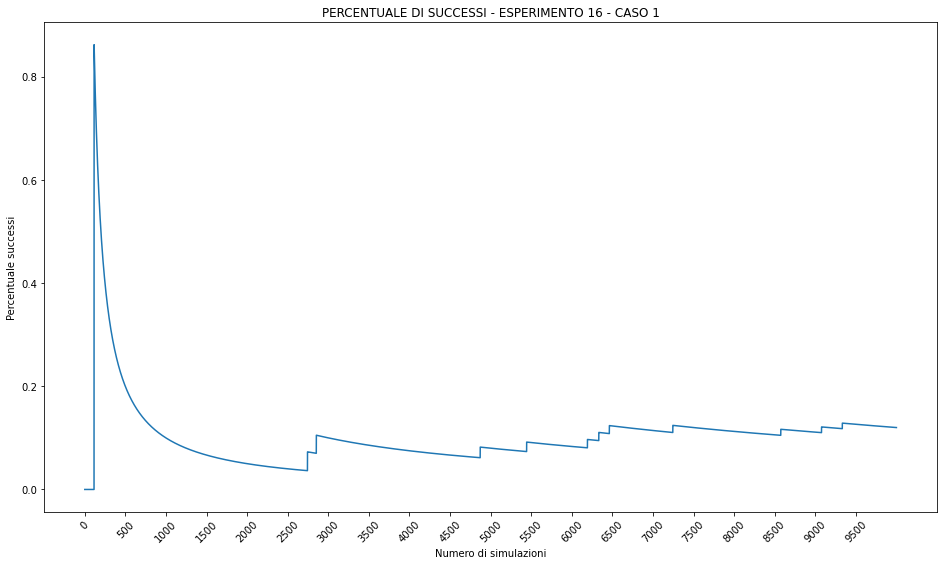

In [201]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 16 - CASO 1")

##### Caso 2
Supponiamo che le 5 carte note siano tali che 4 di loro potranno appartenere all'eventuale Scala Reale. Supponiamo inoltre che Elisa, Sara e Andrea abbiano in mano solo carte diverse da quelle che possono essere coinvolte nella Scala Reale. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il re di fiori, il jack di fiori, il dieci di fiori e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di quadri, il dieci di cuori, il tre di cuori, il tre di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [202]:
pack.remove('AF')
pack.remove('KF')
pack.remove('JF')
pack.remove('TF')
pack.remove('2P')

init = ['AF', 'KF', 'JF', 'TF', '2P']

pack.remove('KP')
pack.remove('QQ')
pack.remove('TC')
pack.remove('3C')
pack.remove('3Q')
pack.remove('2F')

succ2 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ2 +=1
    results.append(100*succ2/(i+1))

pack.append('AF')
pack.append('KF')
pack.append('JF')
pack.append('TF')
pack.append('2P')

pack.append('KP')
pack.append('QQ')
pack.append('TC')
pack.append('3C')
pack.append('3Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ2/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 4.86 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

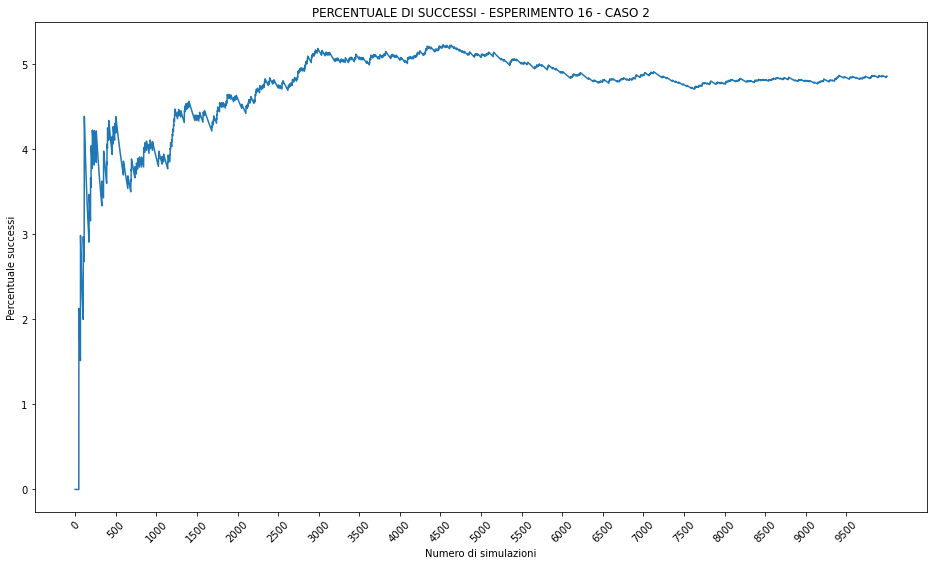

In [203]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 16 - CASO 2")

##### Caso 3
Supponiamo che le 5 carte note siano tali che 4 di loro potranno appartenere all'eventuale Scala Reale. Supponiamo inoltre che uno tra Elisa, Sara e Andrea abbia in mano la restante carta che avrebbe potuto essere coinvolta nella Scala Reale. In tal modo, è facile intuire che Luca è impossibilitato a ottenere la Scala Reale. <br>
Prendiamo dunque il mazzo di carte e rimuoviamo da esso l'asso di fiori, il re di fiori, il jack di fiori, il dieci di fiori e il due di picche, che assumiamo essere le 5 carte note di Luca. Dopodiché rimuoviamo anche il re di picche, la regina di fiori, il dieci di cuori, il tre di cuori, il tre di quadri e il due di fiori, che assumiamo essere le 6 carte che gli avversari di Luca hanno in mano:

In [204]:
pack.remove('AF')
pack.remove('KF')
pack.remove('JF')
pack.remove('TF')
pack.remove('2P')

init = ['AF', 'KF', 'JF', 'TF', '2P']

pack.remove('KP')
pack.remove('QF')
pack.remove('TC')
pack.remove('3C')
pack.remove('3Q')
pack.remove('2F')

succ3 = 0
results = []
for i in range(SIMUL):
    random.shuffle(pack)
    hidden = pack[0:2]
    hand = init+hidden
    if check_royal_flush(hand) == True:
        succ3 +=1
    results.append(100*succ3/(i+1))

pack.append('AF')
pack.append('KF')
pack.append('JF')
pack.append('TF')
pack.append('2P')

pack.append('KP')
pack.append('QF')
pack.append('TC')
pack.append('3C')
pack.append('3Q')
pack.append('2F')
        
print("Probabilità di ottenere esattamente una Scala Reale =", 100*succ3/SIMUL, "%")

Probabilità di ottenere esattamente una Scala Reale = 0.0 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

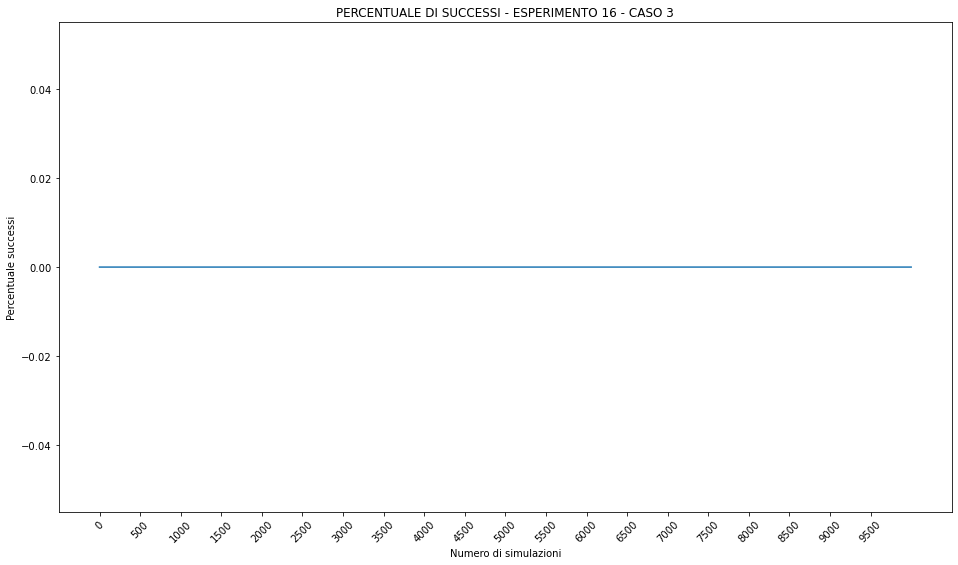

In [205]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 16 - CASO 3")

A questo punto, abbiamo considerato tutti i casi più interessanti per stimare la probabilità di ottenere esattamente una Scala Reale. <br>
Vediamo ora un grafico a barre che mostri la probabilità di ottenere una Scala Reale nei casi che abbiamo analizzato:

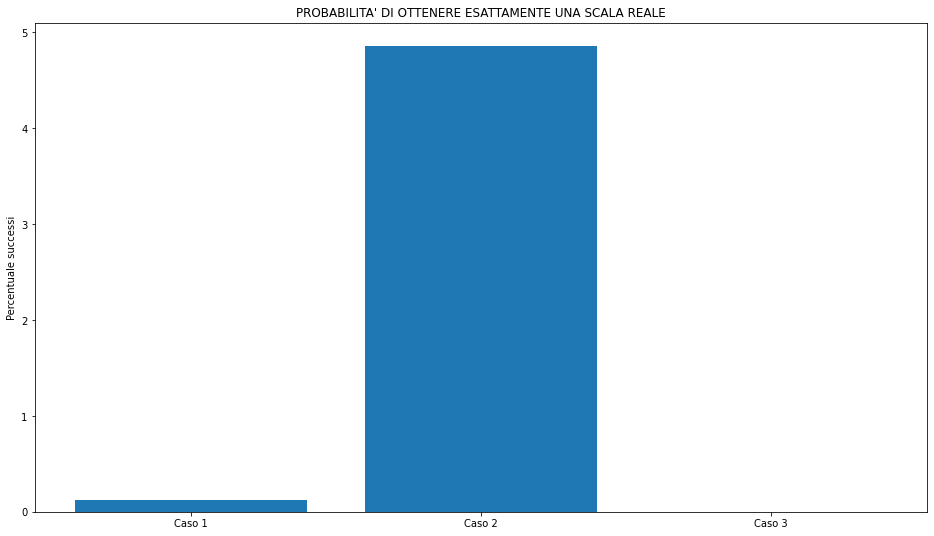

In [206]:
cases = ["Caso 1", "Caso 2", "Caso 3"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI OTTENERE ESATTAMENTE UNA SCALA REALE")

<ul>
    <li><b>Caso 1</b> = le 5 carte note di Luca sono tali che 3 di esse possono potenzialmente appartenere alla Scala Reale, ed Elisa, Sara e Andrea hanno in mano solo carte diverse da quelle che possono essere coinvolte nella Scala Reale.</li>
    <li><b>Caso 2</b> = le 5 carte note di Luca sono tali che 4 di esse possono potenzialmente appartenere alla Scala Reale, ed Elisa, Sara e Andrea hanno in mano solo carte diverse da quelle che possono essere coinvolte nella Scala Reale.</li>
    <li><b>Caso 3</b> = le 5 carte note di Luca sono tali che 4 di esse potrebbero appartenere alla Scala Reale, e uno tra Elisa, Sara e Andrea ha in mano la restante carta che avrebbe potuto essere coinvolta nella Scala Reale.</li>
</ul>

#### Esperimento 17
Quest'ultimo esperimento sarà leggermente diverso da tutti gli altri.
Rimanendo sempre nella fase di Flop del gioco, stavolta andremo a stimare la probabilità che Luca vinca la mano (ovvero la probabilità che Luca abbia la combinazione migliore di tutti i suoi avversari) al variare delle carte scoperte sul tavolo e delle carte che lo stesso Luca ha in mano; le carte che Elisa, Sara e Andrea avranno in mano, invece, verranno selezionate randomicamente e cambieranno a ogni singola simulazione.

##### Caso 1
Supponiamo che le carte scoperte sul tavolo siano il jack di fiori, il cinque di quadri e il due di picche, e che Luca abbia in mano l'asso di cuori e l'otto di picche, ed effettuiamo le nostre simulazioni:

In [207]:
pack.remove('AC')
pack.remove('JF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

table = ['JF', '5Q', '2P']
luca = ['AC', '8P']

succ1 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ1 += 1
    results.append(100*succ1/(i+1))

pack.append('AC')
pack.append('JF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ1/SIMUL, "%")

Probabilità di vincere la mano = 17.5 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

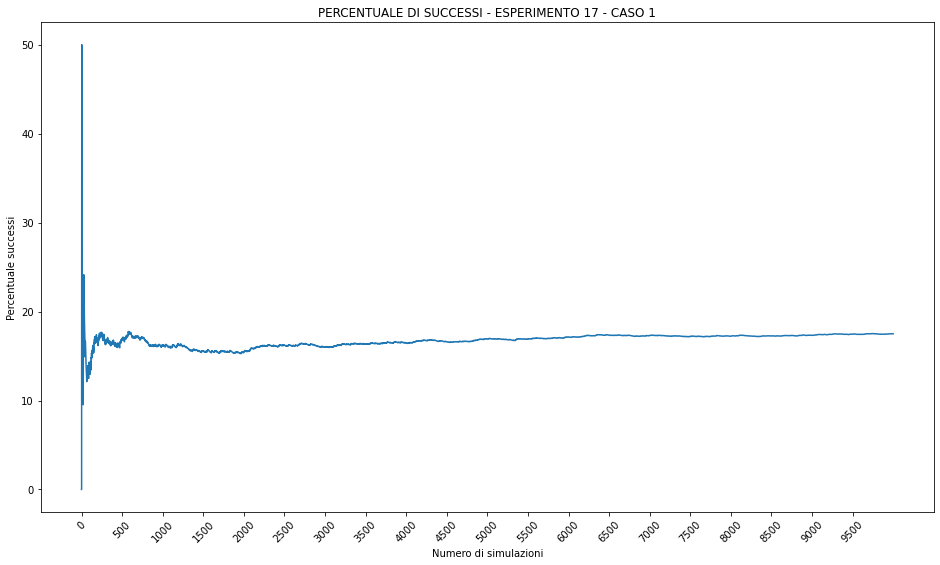

In [208]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 1")

##### Caso 2
Supponiamo che le carte scoperte sul tavolo siano l'asso di fiori, il cinque di quadri e il due di picche, e che Luca abbia in mano l'asso di cuori e l'otto di picche, ed effettuiamo le nostre simulazioni:

In [209]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

table = ['AF', '5Q', '2P']
luca = ['AC', '8P']

succ2 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ2 += 1
    results.append(100*succ2/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ2/SIMUL, "%")

Probabilità di vincere la mano = 66.14 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

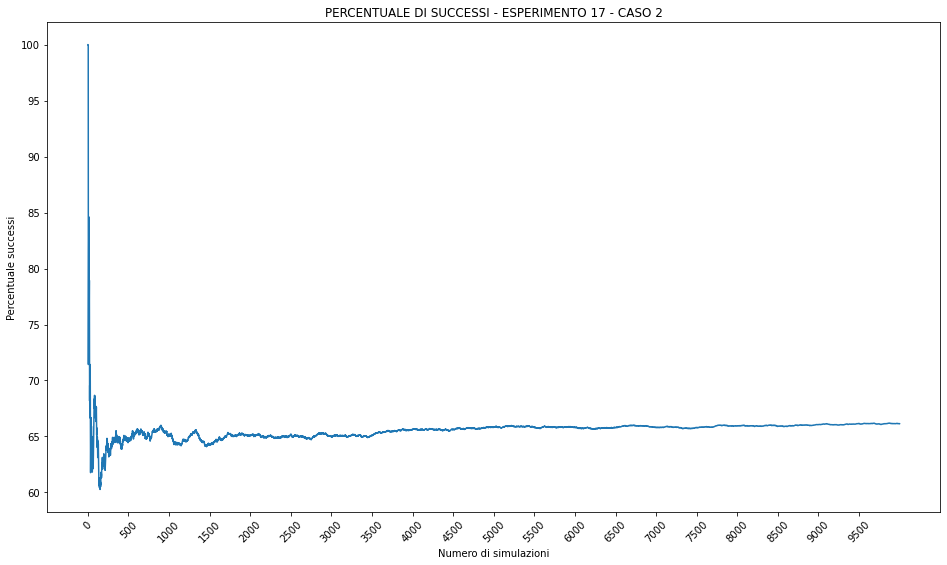

In [210]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 2")

##### Caso 3
Supponiamo che le carte scoperte sul tavolo siano l'asso di fiori, l'otto di picche e il due di picche, e che Luca abbia in mano l'asso di cuori e il due di quadri, ed effettuiamo le nostre simulazioni:

In [211]:
pack.remove('AC')
pack.remove('AF')
pack.remove('8P')
pack.remove('2Q')
pack.remove('2P')

table = ['AF', '8P', '2P']
luca = ['AC', '2Q']

succ3 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ3 += 1
    results.append(100*succ3/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('8P')
pack.append('2Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ3/SIMUL, "%")

Probabilità di vincere la mano = 78.42 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

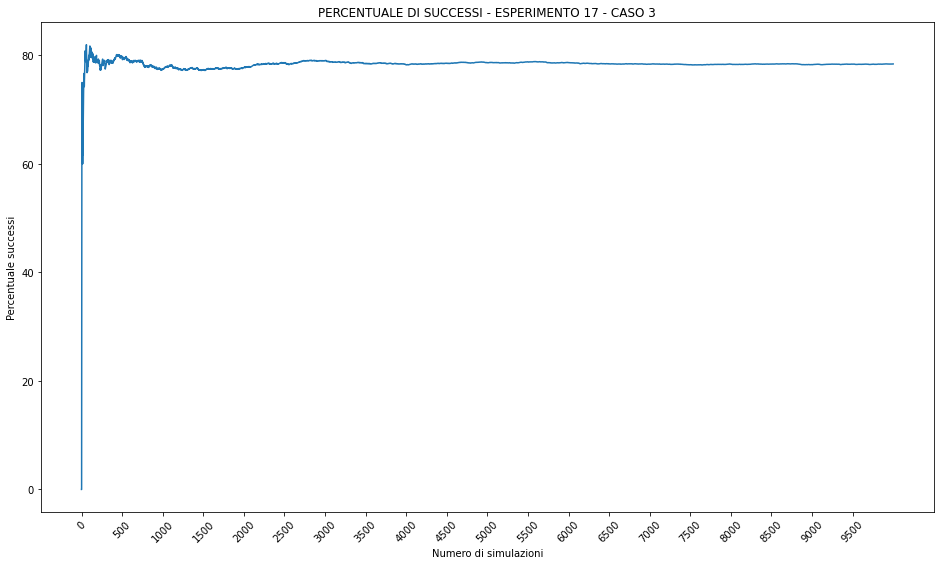

In [212]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 3")

##### Caso 4
Supponiamo che le carte scoperte sul tavolo siano l'asso di fiori, l'asso di picche e il cinque di quadri, e che Luca abbia in mano l'asso di cuori e il due di picche, ed effettuiamo le nostre simulazioni:

In [213]:
pack.remove('AC')
pack.remove('AF')
pack.remove('AP')
pack.remove('5Q')
pack.remove('2P')

table = ['AF', 'AP', '5Q']
luca = ['AC', '2P']

succ4 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ4 += 1
    results.append(100*succ4/(i+1))

pack.append('AC')
pack.append('AF')
pack.append('AP')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ4/SIMUL, "%")

Probabilità di vincere la mano = 88.62 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

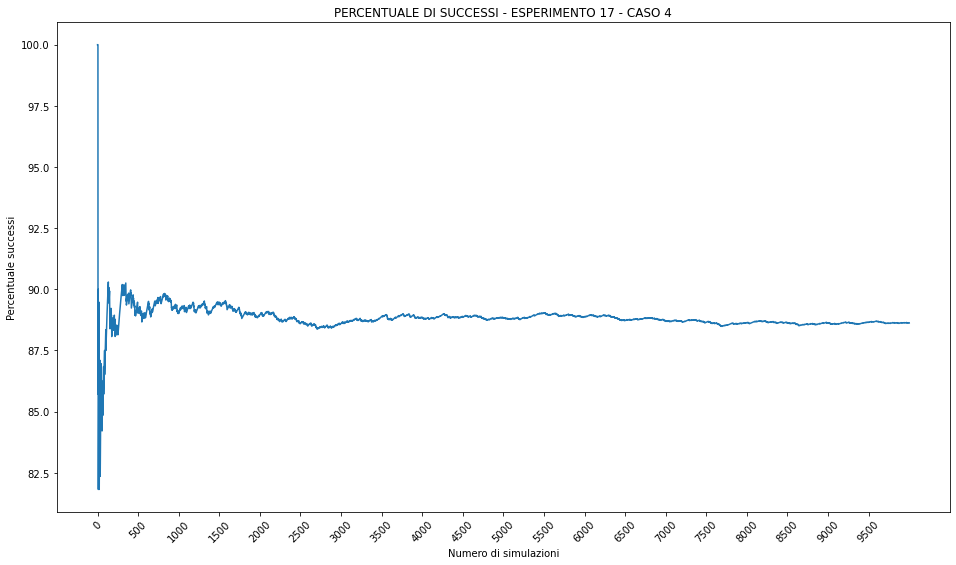

In [214]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 4")

##### Caso 5
Supponiamo che le carte scoperte sul tavolo siano l'otto di fiori, l'otto di picche e il cinque di quadri, e che Luca abbia in mano l'otto di cuori e il cinque di picche, ed effettuiamo le nostre simulazioni:

In [215]:
pack.remove('8C')
pack.remove('8F')
pack.remove('8P')
pack.remove('5Q')
pack.remove('5P')

table = ['8F', '8P', '5Q']
luca = ['8C', '5P']

succ5 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ5 += 1
    results.append(100*succ5/(i+1))

pack.append('8C')
pack.append('8F')
pack.append('8P')
pack.append('5Q')
pack.append('5P')
        
print("Probabilità di vincere la mano =", 100*succ5/SIMUL, "%")

Probabilità di vincere la mano = 97.1 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

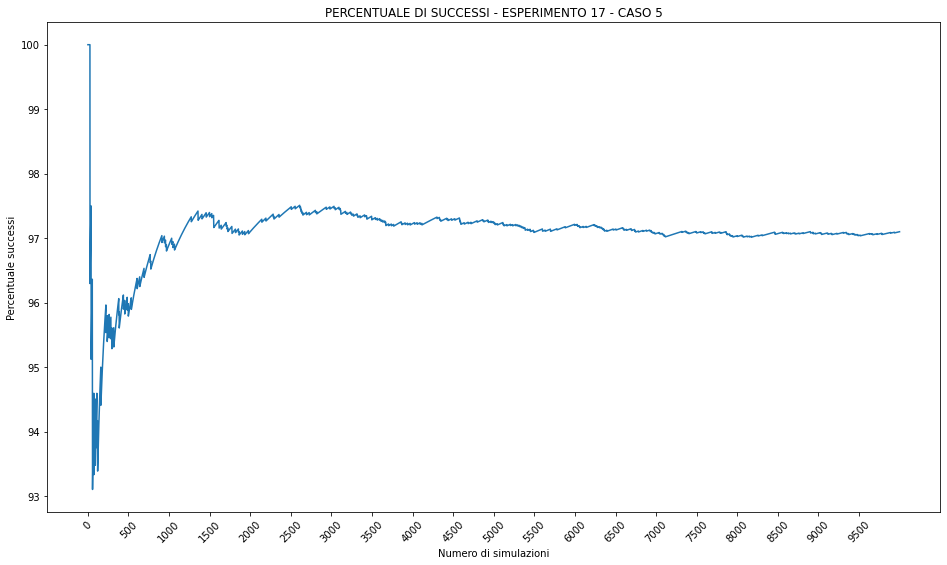

In [216]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 5")

##### Caso 6
Supponiamo che le carte scoperte sul tavolo siano l'asso di cuori, il sette di fiori e il cinque di quadri, e che Luca abbia in mano l'otto di picche e il sei di picche, ed effettuiamo le nostre simulazioni:

In [217]:
pack.remove('AC')
pack.remove('8P')
pack.remove('7F')
pack.remove('6P')
pack.remove('5Q')

table = ['AC', '7F', '5Q']
luca = ['8P', '6P']

succ6 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ6 += 1
    results.append(100*succ6/(i+1))

pack.append('AC')
pack.append('8P')
pack.append('7F')
pack.append('6P')
pack.append('5Q')
        
print("Probabilità di vincere la mano =", 100*succ6/SIMUL, "%")

Probabilità di vincere la mano = 35.03 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

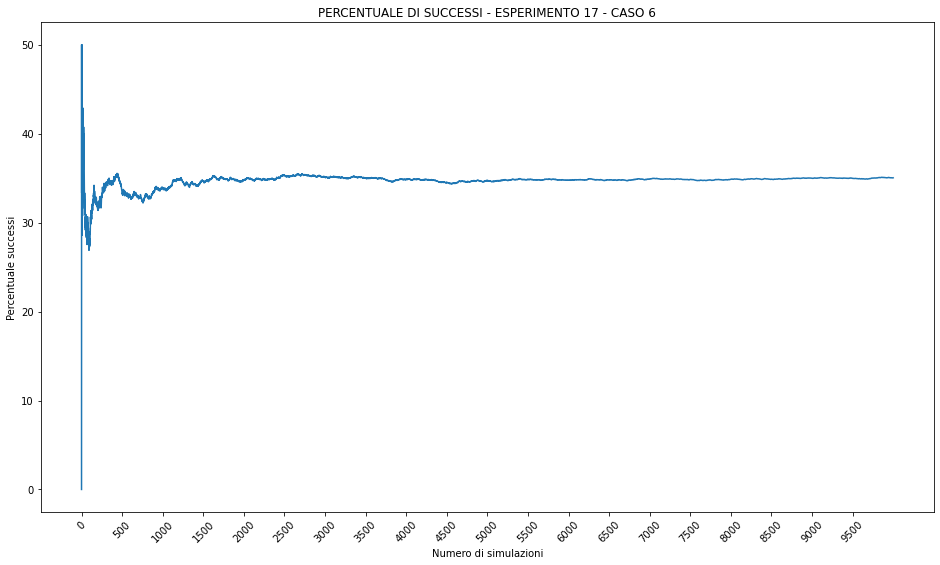

In [218]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 6")

##### Caso 7
Supponiamo che le carte scoperte sul tavolo siano il jack di picche, il cinque di quadri e il due di picche, e che Luca abbia in mano l'asso di picche e l'otto di picche, ed effettuiamo le nostre simulazioni:

In [219]:
pack.remove('AP')
pack.remove('JP')
pack.remove('8P')
pack.remove('5Q')
pack.remove('2P')

table = ['JP', '5Q', '2P']
luca = ['AP', '8P']

succ7 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ7 += 1
    results.append(100*succ7/(i+1))

pack.append('AP')
pack.append('JP')
pack.append('8P')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ7/SIMUL, "%")

Probabilità di vincere la mano = 47.42 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

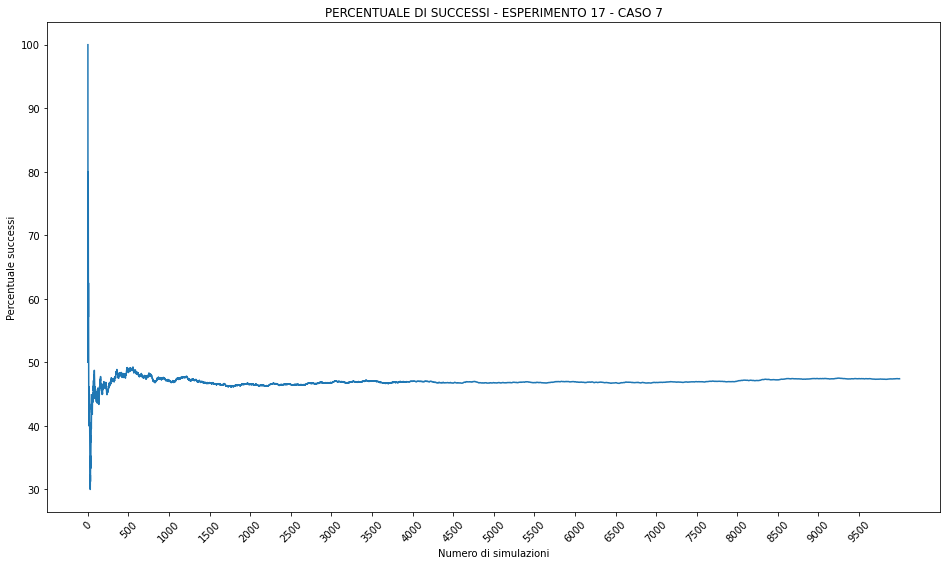

In [220]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 7")

##### Caso 8
Supponiamo che le carte scoperte sul tavolo siano la regina di quadri, il nove di cuori e l'otto di cuori, e che Luca abbia in mano il sette di cuori e il cinque di cuori, ed effettuiamo le nostre simulazioni:

In [221]:
pack.remove('QQ')
pack.remove('9C')
pack.remove('8C')
pack.remove('7C')
pack.remove('5C')

table = ['QQ', '9C', '8C']
luca = ['7C', '5C']

succ8 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ8 += 1
    results.append(100*succ8/(i+1))

pack.append('QQ')
pack.append('9C')
pack.append('8C')
pack.append('7C')
pack.append('5C')
        
print("Probabilità di vincere la mano =", 100*succ8/SIMUL, "%")

Probabilità di vincere la mano = 41.56 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

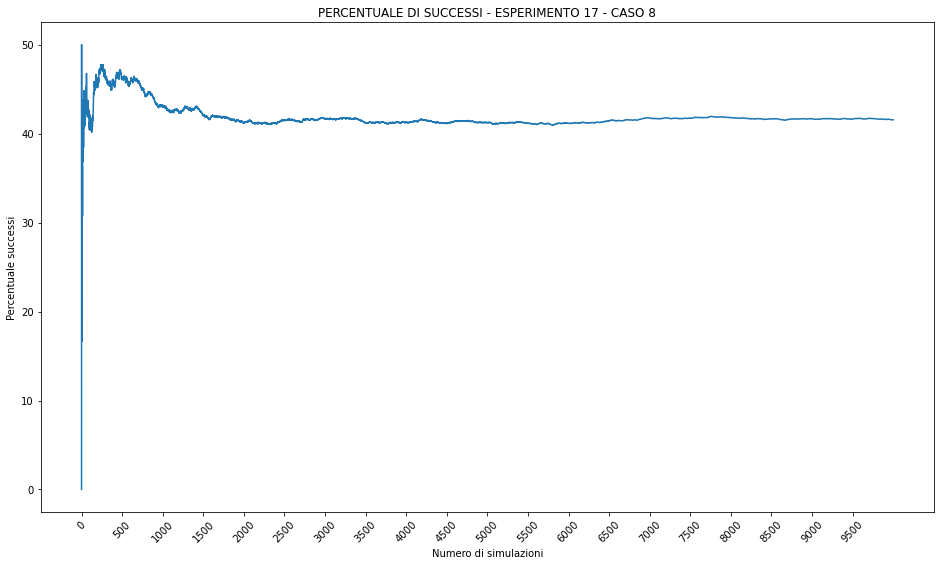

In [222]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 8")

##### Caso 9
Supponiamo che le carte scoperte sul tavolo siano il jack di fiori, il dieci di fiori e il cinque di quadri, e che Luca abbia in mano l'asso di fiori e il due di picche, ed effettuiamo le nostre simulazioni:

In [223]:
pack.remove('AF')
pack.remove('JF')
pack.remove('TF')
pack.remove('5Q')
pack.remove('2P')

table = ['JF', 'TF', '5Q']
luca = ['AF', '2P']

succ9 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ9 += 1
    results.append(100*succ9/(i+1))

pack.append('AF')
pack.append('JF')
pack.append('TF')
pack.append('5Q')
pack.append('2P')
        
print("Probabilità di vincere la mano =", 100*succ9/SIMUL, "%")

Probabilità di vincere la mano = 18.49 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

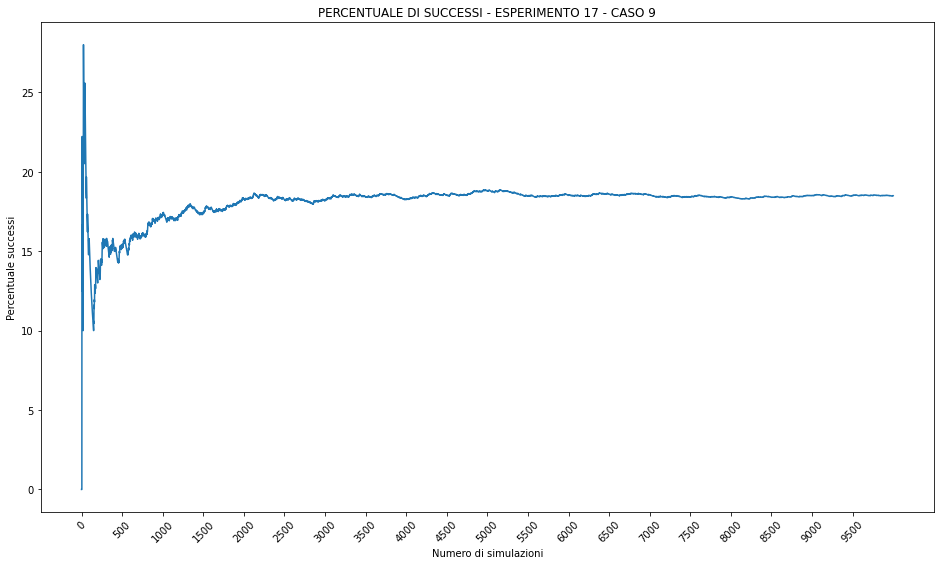

In [224]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 9")

##### Caso 10
Supponiamo che le carte scoperte sul tavolo siano il jack di fiori, il dieci di fiori e il cinque di quadri, e che Luca abbia in mano l'asso di fiori e il re di fiori, ed effettuiamo le nostre simulazioni:

In [225]:
pack.remove('AF')
pack.remove('KF')
pack.remove('JF')
pack.remove('TF')
pack.remove('5Q')

table = ['JF', 'TF', '5Q']
luca = ['AF', 'KF']

succ10 = 0
results = []

for i in range(SIMUL):
    random.shuffle(pack)
    
    elisa = pack[0:2]
    sara = pack[2:4]
    andrea = pack[4:6]
    hidden = pack[6:8]

    hLuca = luca+table+hidden
    hElisa = elisa+table+hidden
    hSara = sara+table+hidden
    hAndrea = andrea+table+hidden
    hands = [hLuca, hElisa, hSara, hAndrea]
    
    if victory(hands):
        succ10 += 1
    results.append(100*succ10/(i+1))

pack.append('AF')
pack.append('KF')
pack.append('JF')
pack.append('TF')
pack.append('5Q')
        
print("Probabilità di vincere la mano =", 100*succ10/SIMUL, "%")

Probabilità di vincere la mano = 58.4 %


Vediamo con un grafico come si è evoluto il rapporto tra il numero di successi e il numero di simulazioni all'aumentare di quest'ultimo:

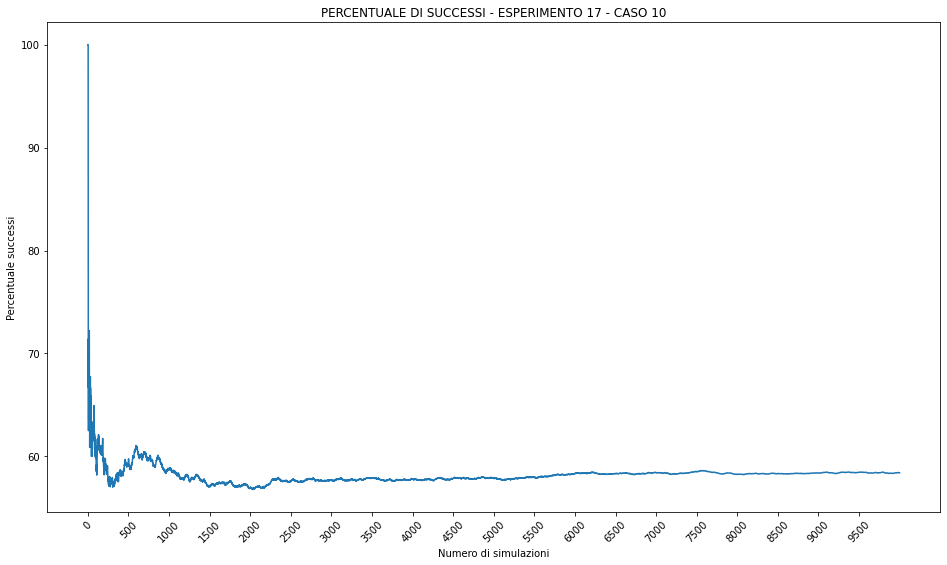

In [226]:
fun_graph(results, "PERCENTUALE DI SUCCESSI - ESPERIMENTO 17 - CASO 10")

A questo punto, abbiamo considerato i casi più interessanti tra quelli visti nei primi 16 esperimenti per stimare la probabilità di vincere la mano. <br>
Vediamo ora un grafico a barre che mostri la probabilità di vincere la mano nei casi che abbiamo analizzato:

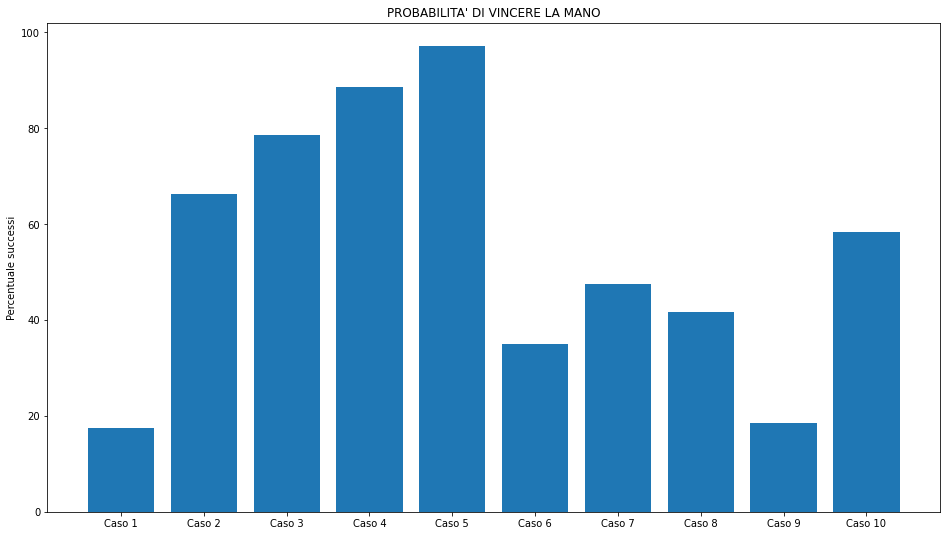

In [227]:
cases = ["Caso 1", "Caso 2", "Caso 3", "Caso 4", "Caso 5", "Caso 6", "Caso 7", "Caso 8", "Caso 9", "Caso 10"]
prob = [100*succ1/SIMUL, 100*succ2/SIMUL, 100*succ3/SIMUL, 100*succ4/SIMUL, 100*succ5/SIMUL, 100*succ6/SIMUL, 100*succ7/SIMUL, 100*succ8/SIMUL, 100*succ9/SIMUL, 100*succ10/SIMUL]
bars_graph(cases, prob, "PROBABILITA' DI VINCERE LA MANO")

<ul>
    <li><b>Caso 1</b> = le carte scoperte sul tavolo sono il jack di fiori, il cinque di quadri e il due di picche, e Luca ha in mano l'asso di cuori e l'otto di picche (le carte iniziali sono tutte diverse tra loro).</li>
    <li><b>Caso 2</b> = le carte scoperte sul tavolo sono l'asso di fiori, il cinque di quadri e il due di picche, e Luca ha in mano l'asso di cuori e l'otto di picche (le carte iniziali contengono una Coppia d'assi).</li>
    <li><b>Caso 3</b> = le carte scoperte sul tavolo sono l'asso di fiori, l'otto di picche e il due di picche, e Luca ha in mano l'asso di cuori e il due di quadri (le carte iniziali contengono una Coppia d'assi e una Coppia di due).</li>
    <li><b>Caso 4</b> = le carte scoperte sul tavolo sono l'asso di fiori, l'asso di picche e il cinque di quadri, e Luca ha in mano l'asso di cuori e il due di picche (le carte iniziali contengono un Tris d'assi).</li>
    <li><b>Caso 5</b> = le carte scoperte sul tavolo sono l'otto di fiori, l'otto di picche e il cinque di quadri, e Luca ha in mano l'otto di cuori e il cinque di picche (le carte iniziali contengono un Tris di otto e una Coppia di cinque, ovvero un Full).</li>
    <li><b>Caso 6</b> = le carte scoperte sul tavolo sono l'asso di cuori, il sette di fiori e il cinque di quadri, e Luca ha in mano l'otto di picche e il sei di picche (le carte iniziali hanno una buona predisposizione a formare una Scala).</li>
    <li><b>Caso 7</b> = le carte scoperte sul tavolo sono il jack di picche, il cinque di quadri e il due di picche, e Luca ha in mano l'asso di picche e l'otto di picche (le carte iniziali hanno una buona predisposizione a formare un Colore).</li>
    <li><b>Caso 8</b> = le carte scoperte sul tavolo sono la regina di quadri, il nove di cuori e l'otto di cuori, e Luca ha in mano il sette di cuori e il cinque di cuori (le carte iniziali hanno una buona predisposizione a formare una Scala di Colore).</li>
    <li><b>Caso 9</b> = le carte scoperte sul tavolo sono il jack di fiori, il dieci di fiori e il cinque di quadri, e Luca ha in mano l'asso di fiori e il due di picche (le carte iniziali hanno una predisposizione, seppur limitata, a formare una Scala Reale).</li>
    <li><b>Caso 10</b> = le carte scoperte sul tavolo sono il jack di fiori, il dieci di fiori e il cinque di quadri, e Luca ha in mano l'asso di fiori e il re di fiori (le carte iniziali hanno una buona predisposizione a formare una Scala Reale).</li>
</ul>

#### Ora è il tuo turno!
Probabilmente ti interesserà stimare la probabilità che Luca vinca la mano anche per altre situazioni iniziali. Per farlo, ti basterà seguire le istruzioni riportate di seguito, tenendo conto che:
<ul>
    <li>Asso di cuori = AC</li>
    <li>Re di cuori = KC</li>
    <li>Regina di cuori = QC</li>
    <li>Jack di cuori = JC</li>
    <li>Dieci di cuori = TC</li>
    <li>Nove di cuori = 9C</li>
    <li>Otto di cuori = 8C</li>
    <li>Sette di cuori = 7C</li>
    <li>Sei di cuori = 6C</li>
    <li>Cinque di cuori = 5C</li>
    <li>Quattro di cuori = 4C</li>
    <li>Tre di cuori = 3C</li>
    <li>Due di cuori = 2C</li>
    <li>Asso di quadri = AQ</li>
    <li>Re di quadri = KQ</li>
    <li>Regina di quadri = QQ</li>
    <li>Jack di quadri = JQ</li>
    <li>Dieci di quadri = TQ</li>
    <li>Nove di quadri = 9Q</li>
    <li>Otto di quadri = 8Q</li>
    <li>Sette di quadri = 7Q</li>
    <li>Sei di quadri = 6Q</li>
    <li>Cinque di quadri = 5Q</li>
    <li>Quattro di quadri = 4Q</li>
    <li>Tre di quadri = 3Q</li>
    <li>Due di quadri = 2Q</li>
    <li>Asso di fiori = AF</li>
    <li>Re di fiori = KF</li>
    <li>Regina di fiori = QF</li>
    <li>Jack di fiori = JF</li>
    <li>Dieci di fiori = TF</li>
    <li>Nove di fiori = 9F</li>
    <li>Otto di fiori = 8F</li>
    <li>Sette di fiori = 7F</li>
    <li>Sei di fiori = 6F</li>
    <li>Cinque di fiori = 5F</li>
    <li>Quattro di fiori = 4F</li>
    <li>Tre di fiori = 3F</li>
    <li>Due di fiori = 2F</li>
    <li>Asso di picche = AP</li>
    <li>Re di picche = KP</li>
    <li>Regina di picche = QP</li>
    <li>Jack di picche = JP</li>
    <li>Dieci di picche = TP</li>
    <li>Nove di picche = 9P</li>
    <li>Otto di picche = 8P</li>
    <li>Sette di picche = 7P</li>
    <li>Sei di picche = 6P</li>
    <li>Cinque di picche = 5P</li>
    <li>Quattro di picche = 4P</li>
    <li>Tre di picche = 3P</li>
    <li>Due di picche = 2P</li>
</ul>

In [ ]:
while(1):
    table1 = input("Inserisci la prima carta scoperta sul tavolo:")
    table2 = input("Inserisci la seconda carta scoperta sul tavolo:")
    table3 = input("Inserisci la terza carta scoperta sul tavolo:")
    luca1 = input("Inserisci la prima carta che Luca ha in mano:")
    luca2 = input("Inserisci la seconda carta che Luca ha in mano:")
    
    userInput = [table1, table2, table3, luca1, luca2]
    isCorrect = verify_input(userInput)
    
    if isCorrect == True:
        pack.remove(table1)
        pack.remove(table2)
        pack.remove(table3)
        pack.remove(luca1)
        pack.remove(luca2)

        table = [table1, table2, table3]
        luca = [luca1, luca2]

        succ = 0
        results = []

        for i in range(SIMUL):
            random.shuffle(pack)
    
            elisa = pack[0:2]
            sara = pack[2:4]
            andrea = pack[4:6]
            hidden = pack[6:8]

            hLuca = luca+table+hidden
            hElisa = elisa+table+hidden
            hSara = sara+table+hidden
            hAndrea = andrea+table+hidden
            hands = [hLuca, hElisa, hSara, hAndrea]
    
            if victory(hands):
                succ += 1
            results.append(100*succ/(i+1))

        pack.append(table1)
        pack.append(table2)
        pack.append(table3)
        pack.append(luca1)
        pack.append(luca2)
        
        print("Probabilità di vincere la mano =", 100*succ/SIMUL, "%")
        fun_graph(results, "PERCENTUALE DI VITTORIE DI LUCA")
        
    else:
        print("Ops! Una o più carte inserite non sono valide.")
    
    input("Se vuoi ripetere l'esperimento con delle altre carte, premi Enter:")
    print("\n")